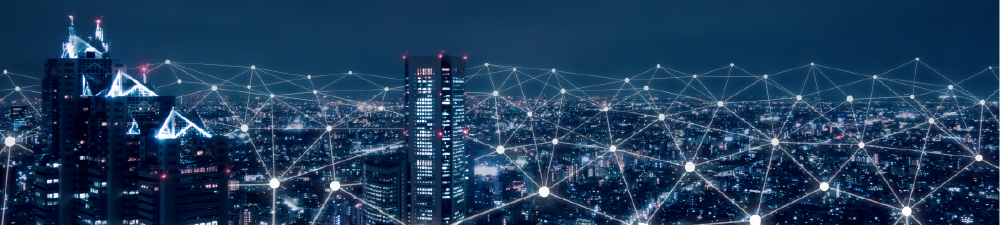

# Mini Project 3  - IU 4.6 Machine Learning

## Business Problem
A Major SEA Telecom Provider is in the business of providing telecom services to prepaid and postpaid customer segments combined with variety of product offers and plans. 

Its post paid business of voice only plans is struggling to maintain a strong foothold in the local market because of
- High churn rate amongst customers leading to a revenue decline of -500l USD every month
- Decline in overall customer base (high churn rate combined with low acquisition rate), leading to a decline in total market share

## Project Objectives
### Business Objective:
Reduce monthly customer churn by identifying high rick customers well ub advance.
#### Hypothesis:
- However, the company CEO believes that existing models can predict churners precisely, but it's too late to take any retension actions, as customers usage have significantly declined by then

### Analytics Objectives:
1. Build a classification model to predict churners one month in advance
2. Identify key churn drivers

## Data Dictionary
Data provided for 50k customers who are currently availing voice only postpaid plans from the telecom provider

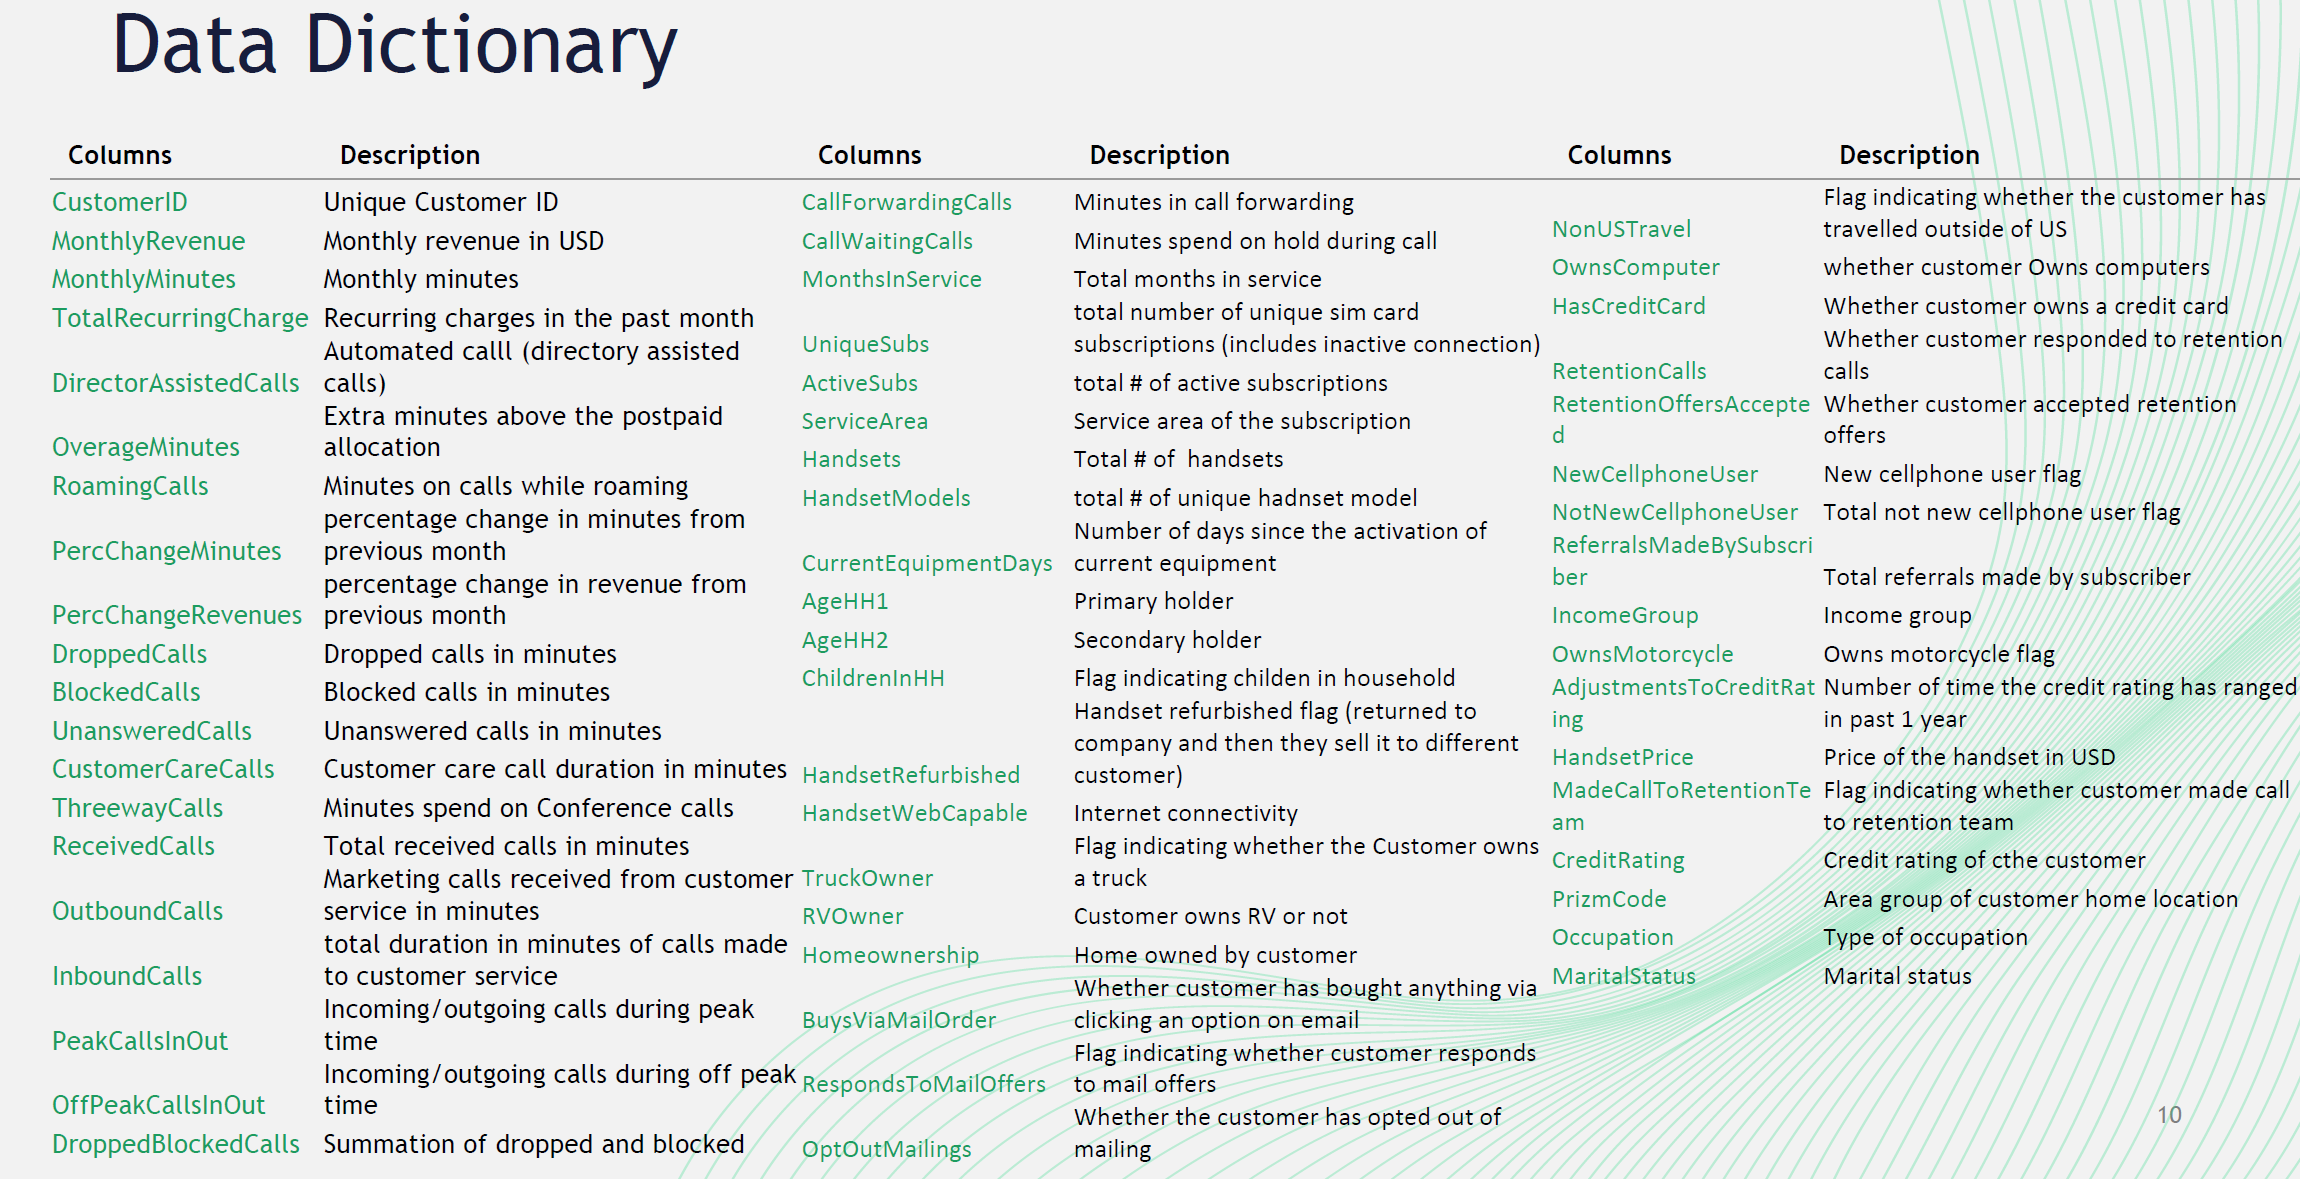

## Exercise:
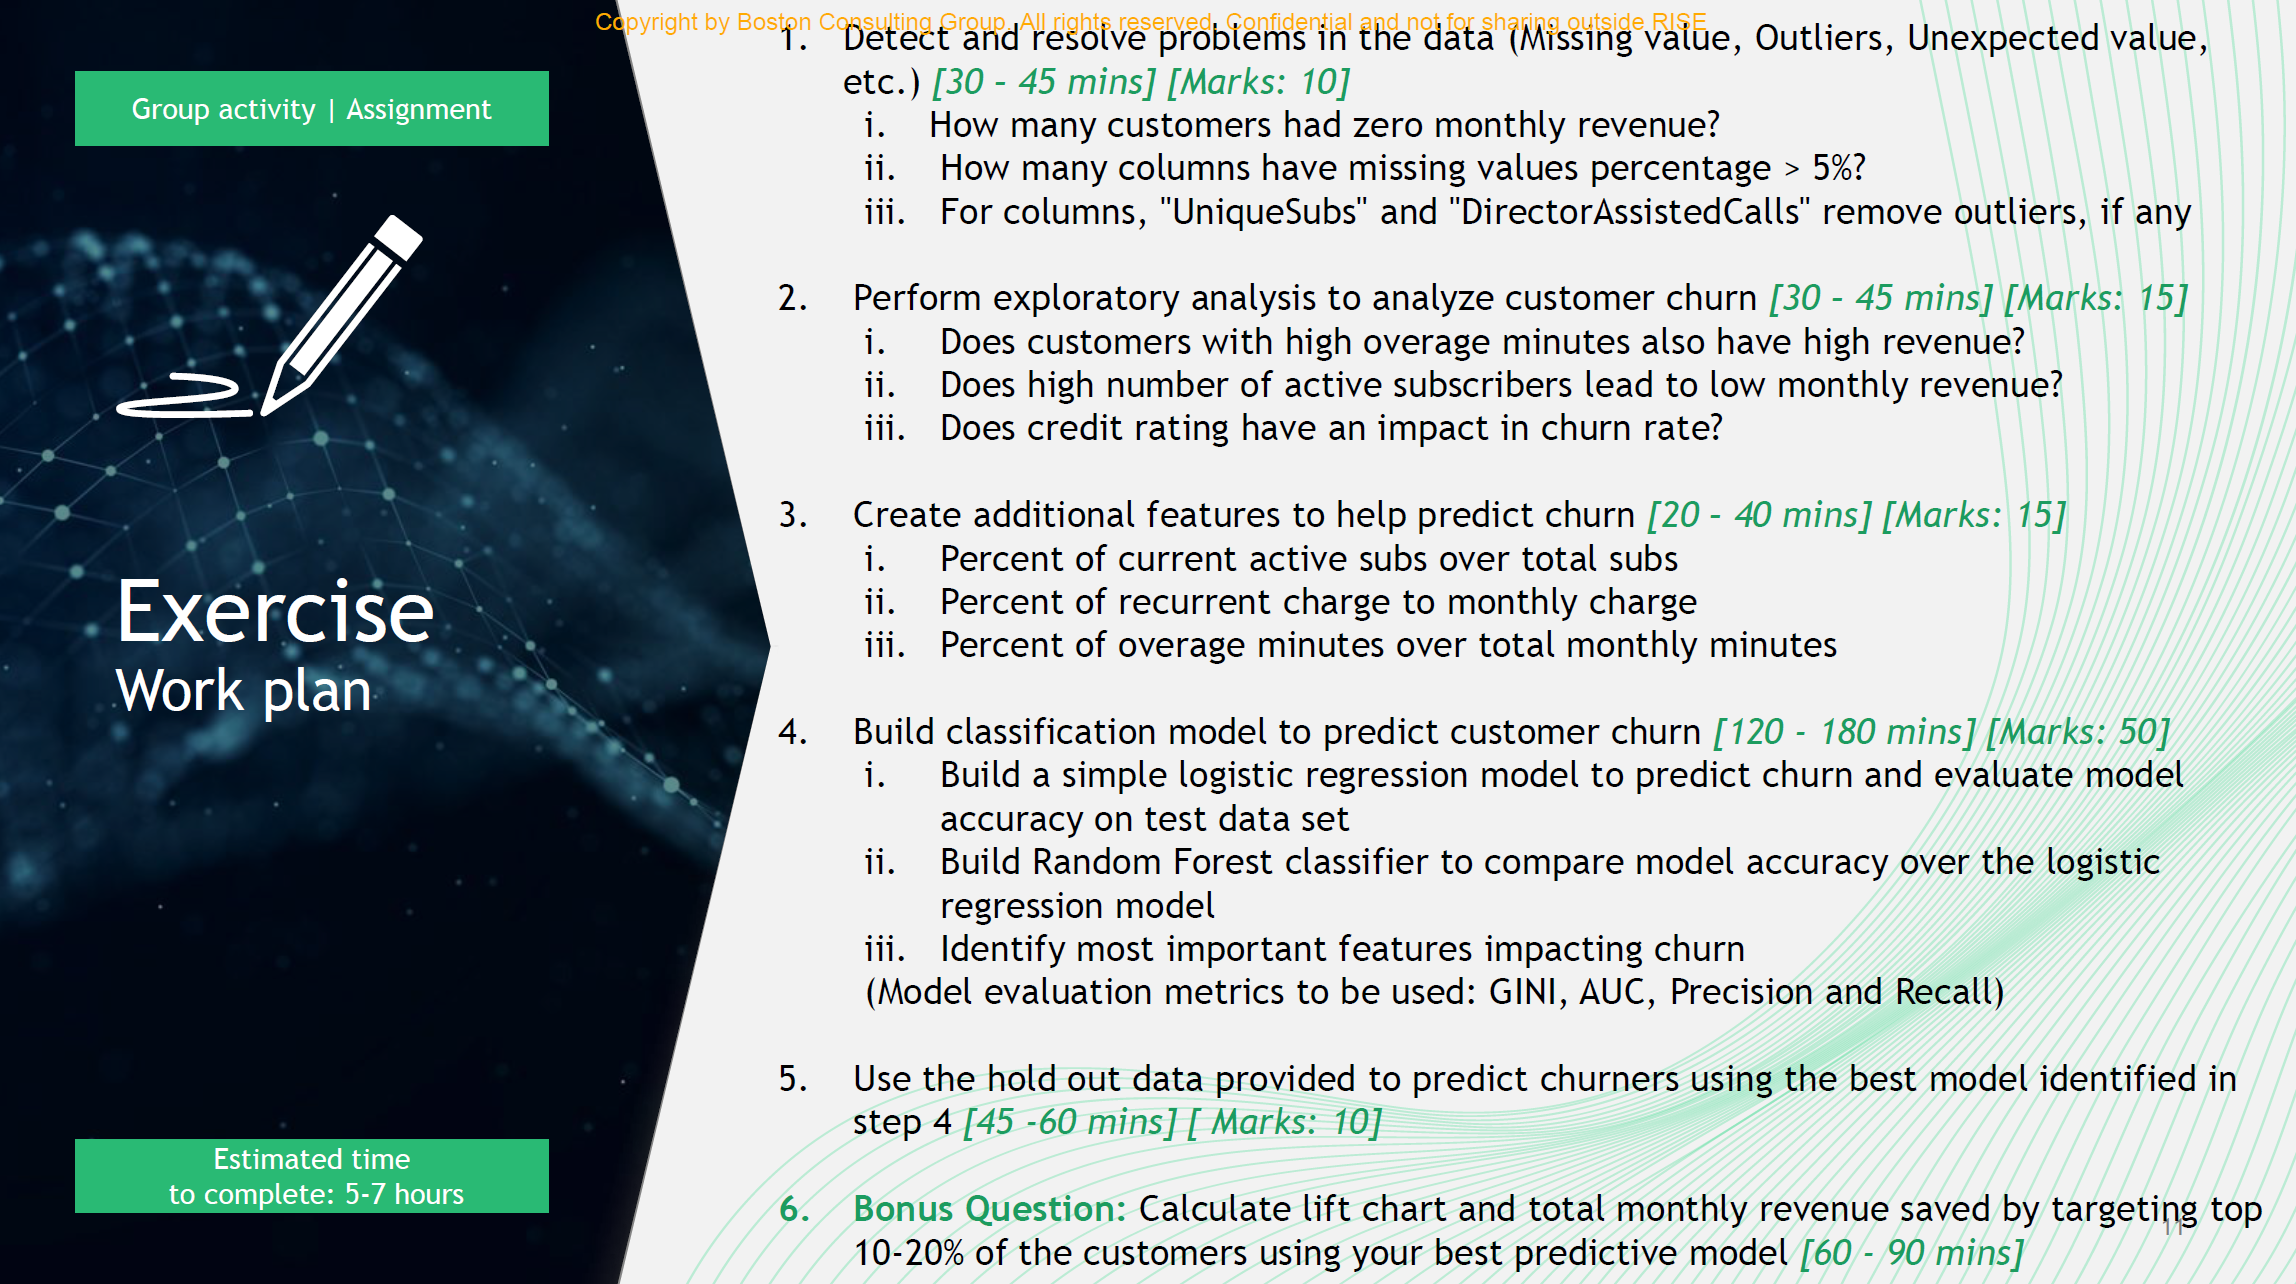

## Packages and setup

In [1]:
%%time
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import os

from scipy.stats import shapiro
import scipy.stats as stats

#parameter settings
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter(action='ignore', category=FutureWarning)

Wall time: 1.37 s


## Reading data and initial processing

In [2]:
%%time
#edit the file location of raw data set
cust_df = pd.read_excel("Mini_project_3_Data.xls")
# cust_df=pd.read_csv("Mini_project_3_Data.csv")

Wall time: 9.64 s


## Exercise

## Placeholder for your analysis
### View Data Set

In [3]:
# Type your code here to explore and understand the data better

#e.g., identify the dimension of cust_df
cust_df.shape
data = cust_df.copy() # let us make another copy of data
print(f"There are {data.shape[0]} rows and {data.shape[1]} columns.")  # f-string

(51047, 58)

There are 51047 rows and 58 columns.


In [4]:
# View Dataset
data.head(10)
np.random.seed(42)  # To get the same random results every time
data.sample(n=20)
data.tail(10)

CustomerID Churn  MonthlyRevenue  MonthlyMinutes  TotalRecurringCharge  \
0     3000002   Yes           24.00           219.0                  22.0   
1     3000010   Yes           16.99            10.0                  17.0   
2     3000014    No           38.00             8.0                  38.0   
3     3000022    No           82.28          1312.0                  75.0   
4     3000026   Yes           17.14             0.0                  17.0   
5     3000030    No           38.05           682.0                  52.0   
6     3000038    No           31.66            26.0                  30.0   
7     3000042    No           62.13            98.0                  66.0   
8     3000046    No           35.30            24.0                  35.0   
9     3000050    No           81.00          1056.0                  75.0   

   DirectorAssistedCalls  OverageMinutes  RoamingCalls  PercChangeMinutes  \
0                   0.25             0.0           0.0             -157.0   
1                   0.00             0.0           0.0               -4.0   
2                   0.00             0.0           0.0               -2.0   
3                   1.24             0.0           0.0              157.0   
4                   0.00             0.0           0.0                0.0   
5                   0.25             0.0           0.0              148.0   
6                   0.25             0.0           0.0               60.0   
7                   2.48             0.0           0.0               24.0   
8                   0.00             0.0           0.0               20.0   
9                   0.00             0.0           0.0               43.0   

   PercChangeRevenues  ...  ReferralsMadeBySubscriber  IncomeGroup  \
0               -19.0  ...                          0            4   
1                 0.0  ...                          0            5   
2                 0.0  ...                          0            6   
3                 8.1  ...                          0            6   
4                -0.2  ...                          0            9   
5                -3.1  ...                          0            1   
6                 4.0  ...                          0            9   
7                 6.8  ...                          0            6   
8                -0.3  ...                          0            9   
9                 2.4  ...                          0            5   

   OwnsMotorcycle  AdjustmentsToCreditRating  HandsetPrice  \
0              No                          0            30   
1              No                          0            30   
2              No                          0       Unknown   
3              No                          0            10   
4              No                          1            10   
5              No                          1            30   
6              No                          1            30   
7              No                          0            30   
8              No                          0            80   
9              No                          1            30   

   MadeCallToRetentionTeam  CreditRating  PrizmCode    Occupation  \
0                      Yes     1-Highest   Suburban  Professional   
1                       No      4-Medium   Suburban  Professional   
2                       No        3-Good       Town        Crafts   
3                       No      4-Medium      Other         Other   
4                       No     1-Highest      Other  Professional   
5                       No        3-Good      Other         Other   
6                       No     1-Highest      Other          Self   
7                       No     1-Highest      Other  Professional   
8                       No     1-Highest      Other         Other   
9                       No        3-Good      Other  Professional   

   MaritalStatus  
0             No  
1            Yes  
2            Yes  
3             No 

CustomerID Churn  MonthlyRevenue  MonthlyMinutes  TotalRecurringCharge  \
14589     3114822    No           34.43           314.0                  30.0   
5048      3039574    No           30.00           153.0                  30.0   
7616      3059830   Yes           61.11           328.0                  57.0   
30623     3243582   Yes           14.31           350.0                  10.0   
11037     3087070    No           30.25           174.0                  30.0   
32204     3256546    No          182.74          2584.0                  96.0   
31448     3250586   Yes           43.99           259.0                  50.0   
47748     3376190    No           61.11          1141.0                  66.0   
43870     3347818    No           45.21           607.0                  20.0   
29766     3236530    No           51.04           418.0                  50.0   
12465     3098302    No          110.15           408.0                  74.0   
39844     3317554    No           66.36           234.0                  70.0   
19756     3154682   Yes          312.83          2375.0                  71.0   
38723     3308982    No           44.30            89.0                  55.0   
26377     3208422    No           30.50            40.0                  30.0   
43025     3341818    No           94.17          2113.0                  85.0   
38113     3303834   Yes          170.91          1844.0                  55.0   
50040     3392058    No           24.52            26.0                  23.0   
25798     3203818    No           33.26            46.0                  30.0   
23715     3186674    No          164.29          1066.0                  60.0   

       DirectorAssistedCalls  OverageMinutes  RoamingCalls  PercChangeMinutes  \
14589                   0.00             5.0           2.6              -12.0   
5048                    0.00             0.0           0.0               10.0   
7616                    0.99            22.0           0.0             -328.0   
30623                   0.00             1.0           0.0             -150.0   
11037                   0.25             0.0           0.0               56.0   
32204                   1.49           397.0           0.0            -2496.0   
31448                   0.00             0.0           0.0              -15.0   
47748                   2.72            11.0           0.0              766.0   
43870                   0.25             2.0           0.0             -607.0   
29766                   0.00             0.0           0.0               33.0   
12465                   0.25            12.0           1.3              123.0   
39844                   0.00            21.0           0.0              170.0   
19756                   2.23           582.0           0.0            -1372.0   
38723                   0.00             0.0           0.0               12.0   
26377                   0.00             0.0           0.0               -2.0   
43025                   1.24            39.0           4.1             -305.0   
38113                   1.24           356.0           0.0              408.0   
50040                   0.25             4.0           0.0              -26.0   
25798                   0.00             0.0           0.0               46.0   
23715                   1.73           346.0           9.1              261.0   

       PercChangeRevenues  ...  ReferralsMadeBySubscriber  IncomeGroup  \
14589                -1.2  ...                          0            5   
5048                  0.0  ...                          0            4   
7616                 -6.5  ...                          0            5   
30623                -0.3  ...                          0            7   
11037                -0.2  ...                          0            8   
32204              -192.4  ...                          1            5   
31448                 0.0  ...                          1            0   
47748      

CustomerID Churn  MonthlyRevenue  MonthlyMinutes  TotalRecurringCharge  \
51037     3399906    No           31.92            63.0                  17.0   
51038     3399910    No             NaN             NaN                   NaN   
51039     3399922    No           50.00           492.0                  50.0   
51040     3399942    No           71.99           724.0                  70.0   
51041     3399946   Yes          117.49           384.0                  30.0   
51042     3399958   Yes             NaN             NaN                   NaN   
51043     3399974    No           95.17          1745.0                  85.0   
51044     3399978   Yes             NaN             NaN                   NaN   
51045     3399990    No             NaN             NaN                   NaN   
51046     3399994    No             NaN             NaN                   NaN   

       DirectorAssistedCalls  OverageMinutes  RoamingCalls  PercChangeMinutes  \
51037                   0.00            43.0           0.0              -38.0   
51038                    NaN             NaN           NaN                NaN   
51039                   0.00             0.0           0.0                0.0   
51040                   0.00             4.0           0.9              -40.0   
51041                   0.00           250.0           0.0                0.0   
51042                    NaN             NaN           NaN                NaN   
51043                   0.99            45.0           4.7              122.0   
51044                    NaN             NaN           NaN                NaN   
51045                    NaN             NaN           NaN                NaN   
51046                    NaN             NaN           NaN                NaN   

       PercChangeRevenues  ...  ReferralsMadeBySubscriber  IncomeGroup  \
51037               -13.2  ...                          0            3   
51038                 NaN  ...                          0            7   
51039                 0.0  ...                          0            0   
51040                -2.0  ...                          0            7   
51041                 0.0  ...                          0            2   
51042                 NaN  ...                          0            6   
51043                15.9  ...                          0            9   
51044                 NaN  ...                          0            7   
51045                 NaN  ...                          0            9   
51046                 NaN  ...                          0            0   

       OwnsMotorcycle  AdjustmentsToCreditRating  HandsetPrice  \
51037              No                          0       Unknown   
51038              No                          0            30   
51039              No                          0       Unknown   
51040              No                          0       Unknown   
51041              No                          0            30   
51042              No                          0            60   
51043              No                          1            60   
51044              No                          1            80   
51045              No                          0            30   
51046              No                          1            60   

       MadeCallToRetentionTeam  CreditRating  PrizmCode    Occupation  \
51037                       No        3-Good      Other         Other   
51038                       No     1-Highest   Suburban         Other   
51039                       No     6-VeryLow   Suburban         Other   
51040                       No     1-Highest      Other  Professional   
51041                       No         5-Low      Other  Professional   
51042                       No     1-Highest   Suburban         Other   
51043                       No        3-Good      Other         Other   
51044                       No         5-Low      Other      Clerical   
51045                   

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51047 entries, 0 to 51046
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 51047 non-null  int64  
 1   Churn                      51047 non-null  object 
 2   MonthlyRevenue             50891 non-null  float64
 3   MonthlyMinutes             50891 non-null  float64
 4   TotalRecurringCharge       50891 non-null  float64
 5   DirectorAssistedCalls      50891 non-null  float64
 6   OverageMinutes             50891 non-null  float64
 7   RoamingCalls               50891 non-null  float64
 8   PercChangeMinutes          50680 non-null  float64
 9   PercChangeRevenues         50680 non-null  float64
 10  DroppedCalls               51047 non-null  float64
 11  BlockedCalls               51047 non-null  float64
 12  UnansweredCalls            51047 non-null  float64
 13  CustomerCareCalls          51047 non-null  flo

**Observations**
- There are total 58 columns and 51047 observations in the dataset.
- Preliminary assessment of data set saw some data points in several variables having negative values that require treatment.
- We can see that some columns have less than 51047 non-null values i.e. missing values. We can investigate further.

### View Missing Values

In [6]:
for column in data.columns:
    if data[column].isnull().any(): #if any NaN in the column
        print(f"{column}",data[column].isnull().sum())    #print the column name then the sum of number of NaN values

MonthlyRevenue 156
MonthlyMinutes 156
TotalRecurringCharge 156
DirectorAssistedCalls 156
OverageMinutes 156
RoamingCalls 156
PercChangeMinutes 367
PercChangeRevenues 367
ServiceArea 24
Handsets 1
HandsetModels 1
CurrentEquipmentDays 1
AgeHH1 909
AgeHH2 909


**Observations**
- The above variables have missing values and the count of missing values as displayed.

### View Unique Value Counts in each Variable

In [7]:
# Check the unique value counts in each column of the dataframe.
data.nunique()

CustomerID                   51047
Churn                            2
MonthlyRevenue               12665
MonthlyMinutes                2719
TotalRecurringCharge           214
DirectorAssistedCalls          146
OverageMinutes                 746
RoamingCalls                   530
PercChangeMinutes             2262
PercChangeRevenues            2899
DroppedCalls                   285
BlockedCalls                   373
UnansweredCalls                840
CustomerCareCalls              185
ThreewayCalls                   78
ReceivedCalls                 6121
OutboundCalls                  787
InboundCalls                   472
PeakCallsInOut                1839
OffPeakCallsInOut             1669
DroppedBlockedCalls            447
CallForwardingCalls             31
CallWaitingCalls               223
MonthsInService                 56
UniqueSubs                      15
ActiveSubs                      12
ServiceArea                    747
Handsets                        23
HandsetModels       

**Observations**
- We can drop the column - CustomerID as it is unique for each customer and will not add value to the model.

In [8]:
# 'CustomerID' dropped
data.drop(["CustomerID"],axis=1,inplace=True) # Remove CustomerID column and use python #no. ; inplace means no make copy

### View Duplicate Counts in each Variable

In [9]:
data[data.duplicated()].count() # Find out duplicates in the data set

Churn                        0
MonthlyRevenue               0
MonthlyMinutes               0
TotalRecurringCharge         0
DirectorAssistedCalls        0
OverageMinutes               0
RoamingCalls                 0
PercChangeMinutes            0
PercChangeRevenues           0
DroppedCalls                 0
BlockedCalls                 0
UnansweredCalls              0
CustomerCareCalls            0
ThreewayCalls                0
ReceivedCalls                0
OutboundCalls                0
InboundCalls                 0
PeakCallsInOut               0
OffPeakCallsInOut            0
DroppedBlockedCalls          0
CallForwardingCalls          0
CallWaitingCalls             0
MonthsInService              0
UniqueSubs                   0
ActiveSubs                   0
ServiceArea                  0
Handsets                     0
HandsetModels                0
CurrentEquipmentDays         0
AgeHH1                       0
AgeHH2                       0
ChildrenInHH                 0
HandsetR

**Observations**
- There are no duplicate entries.

### View Counts of each Unique Value in each Variable

In [10]:
# Viewing each column's possible values and the count of each value
for column in data.columns:
    print(data[column].value_counts(dropna=False)) # print the unique values and their frequency of appearing
    print('-'*30)

No     36336
Yes    14711
Name: Churn, dtype: int64
------------------------------
29.99     1069
34.99      806
10.00      469
30.00      404
49.99      392
          ... 
173.70       1
227.31       1
16.26        1
164.88       1
249.18       1
Name: MonthlyRevenue, Length: 12666, dtype: int64
------------------------------
0.0       723
NaN       156
2.0       138
8.0       127
6.0       122
         ... 
3009.0      1
1839.0      1
2409.0      1
2609.0      1
2055.0      1
Name: MonthlyMinutes, Length: 2720, dtype: int64
------------------------------
 30.0     7302
 45.0     6630
 60.0     4435
 40.0     4415
 50.0     4143
          ... 
 188.0       1
-9.0         1
 219.0       1
 146.0       1
 185.0       1
Name: TotalRecurringCharge, Length: 215, dtype: int64
------------------------------
0.00     24512
0.25      6757
0.50      3948
0.74      2748
0.99      1993
         ...  
44.30        1
28.71        1
7.59         1
24.50        1
8.25         1
Name: DirectorAssisted

No     49302
Yes     1745
Name: MadeCallToRetentionTeam, dtype: int64
------------------------------
2-High       18993
1-Highest     8522
3-Good        8410
5-Low         6499
4-Medium      5357
7-Lowest      2114
6-VeryLow     1152
Name: CreditRating, dtype: int64
------------------------------
Other       24655
Suburban    16378
Town         7589
Rural        2425
Name: PrizmCode, dtype: int64
------------------------------
Other           37637
Professional     8755
Crafts           1519
Clerical          986
Self              879
Retired           733
Student           381
Homemaker         157
Name: Occupation, dtype: int64
------------------------------
Unknown    19700
Yes        18651
No         12696
Name: MaritalStatus, dtype: int64
------------------------------


**Observations**
- Several variables have NaN and negative values that need to be dealt with.
- 'Homeownership' , 'HandsetPrice' , 'MaritalStatus' have Unknown values and it shall be replaced with Nan.
- 'Homeownership' is binary as Known or Unknown so it can be left untreated for now.

In [11]:
# Unknown values changed to NaN
Unknown_cols = data.columns
Unknown_cols = Unknown_cols.drop('Homeownership')

# Cycle through the columns listed
for column in Unknown_cols:
    data[column] = data[column].replace("Unknown",np.nan)

In [12]:
# Viewing each column's possible values and the count of each value
for column in data.columns:
    print(data[column].value_counts(dropna=False)) # print the unique values and their frequency of appearing
    print('-'*30)

No     36336
Yes    14711
Name: Churn, dtype: int64
------------------------------
29.99     1069
34.99      806
10.00      469
30.00      404
49.99      392
          ... 
173.70       1
227.31       1
16.26        1
164.88       1
249.18       1
Name: MonthlyRevenue, Length: 12666, dtype: int64
------------------------------
0.0       723
NaN       156
2.0       138
8.0       127
6.0       122
         ... 
3009.0      1
1839.0      1
2409.0      1
2609.0      1
2055.0      1
Name: MonthlyMinutes, Length: 2720, dtype: int64
------------------------------
 30.0     7302
 45.0     6630
 60.0     4435
 40.0     4415
 50.0     4143
          ... 
 188.0       1
-9.0         1
 219.0       1
 146.0       1
 185.0       1
Name: TotalRecurringCharge, Length: 215, dtype: int64
------------------------------
0.00     24512
0.25      6757
0.50      3948
0.74      2748
0.99      1993
         ...  
44.30        1
28.71        1
7.59         1
24.50        1
8.25         1
Name: DirectorAssisted

Name: Homeownership, dtype: int64
------------------------------
No     32596
Yes    18451
Name: BuysViaMailOrder, dtype: int64
------------------------------
No     31821
Yes    19226
Name: RespondsToMailOffers, dtype: int64
------------------------------
No     50295
Yes      752
Name: OptOutMailings, dtype: int64
------------------------------
No     48168
Yes     2879
Name: NonUSTravel, dtype: int64
------------------------------
No     41583
Yes     9464
Name: OwnsComputer, dtype: int64
------------------------------
Yes    34503
No     16544
Name: HasCreditCard, dtype: int64
------------------------------
0    49302
1     1609
2      120
3       14
4        2
Name: RetentionCalls, dtype: int64
------------------------------
0    50166
1      837
2       36
3        8
Name: RetentionOffersAccepted, dtype: int64
------------------------------
No     41223
Yes     9824
Name: NewCellphoneUser, dtype: int64
------------------------------
No     44012
Yes     7035
Name: NotNewCellphone

### Summary of the dataset

In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51047 entries, 0 to 51046
Data columns (total 57 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Churn                      51047 non-null  object 
 1   MonthlyRevenue             50891 non-null  float64
 2   MonthlyMinutes             50891 non-null  float64
 3   TotalRecurringCharge       50891 non-null  float64
 4   DirectorAssistedCalls      50891 non-null  float64
 5   OverageMinutes             50891 non-null  float64
 6   RoamingCalls               50891 non-null  float64
 7   PercChangeMinutes          50680 non-null  float64
 8   PercChangeRevenues         50680 non-null  float64
 9   DroppedCalls               51047 non-null  float64
 10  BlockedCalls               51047 non-null  float64
 11  UnansweredCalls            51047 non-null  float64
 12  CustomerCareCalls          51047 non-null  float64
 13  ThreewayCalls              51047 non-null  flo

In [14]:
#data.describe(include='all').T # View summary of dataset
data.describe().T # View summary of dataset numerical variables

count        mean         std      min     25%  \
MonthlyRevenue             50891.0   58.834492   44.507336    -6.17   33.61   
MonthlyMinutes             50891.0  525.653416  529.871063     0.00  158.00   
TotalRecurringCharge       50891.0   46.830088   23.848871   -11.00   30.00   
DirectorAssistedCalls      50891.0    0.895229    2.228546     0.00    0.00   
OverageMinutes             50891.0   40.027785   96.588076     0.00    0.00   
RoamingCalls               50891.0    1.236244    9.818294     0.00    0.00   
PercChangeMinutes          50680.0  -11.547908  257.514772 -3875.00  -83.00   
PercChangeRevenues         50680.0   -1.191985   39.574915 -1107.70   -7.10   
DroppedCalls               51047.0    6.011489    9.043955     0.00    0.70   
BlockedCalls               51047.0    4.085672   10.946905     0.00    0.00   
UnansweredCalls            51047.0   28.288981   38.876194     0.00    5.30   
CustomerCareCalls          51047.0    1.868999    5.096138     0.00    0.00   
ThreewayCalls              51047.0    0.298838    1.168277     0.00    0.00   
ReceivedCalls              51047.0  114.800121  166.485896     0.00    8.30   
OutboundCalls              51047.0   25.377715   35.209147     0.00    3.30   
InboundCalls               51047.0    8.178104   16.665878     0.00    0.00   
PeakCallsInOut             51047.0   90.549515  104.947470     0.00   23.00   
OffPeakCallsInOut          51047.0   67.650790   92.752699     0.00   11.00   
DroppedBlockedCalls        51047.0   10.158003   15.555284     0.00    1.70   
CallForwardingCalls        51047.0    0.012277    0.594168     0.00    0.00   
CallWaitingCalls           51047.0    1.840504    5.585129     0.00    0.00   
MonthsInService            51047.0   18.756264    9.800138     6.00   11.00   
UniqueSubs                 51047.0    1.532157    1.223384     1.00    1.00   
ActiveSubs                 51047.0    1.354340    0.675477     0.00    1.00   
Handsets                   51046.0    1.805646    1.331173     1.00    1.00   
HandsetModels              51046.0    1.558751    0.905932     1.00    1.00   
CurrentEquipmentDays       51046.0  380.545841  253.801982    -5.00  205.00   
AgeHH1                     50138.0   31.338127   22.094635     0.00    0.00   
AgeHH2                     50138.0   21.144142   23.931368     0.00    0.00   
RetentionCalls             51047.0    0.037201    0.206483     0.00    0.00   
RetentionOffersAccepted    51047.0    0.018277    0.142458     0.00    0.00   
ReferralsMadeBySubscriber  51047.0    0.052070    0.307592     0.00    0.00   
IncomeGroup                51047.0    4.324524    3.138236     0.00    0.00   
AdjustmentsToCreditRating  51047.0    0.053911    0.383147     0.00    0.00   
HandsetPrice               22065.0   82.237933   60.401984    10.00   30.00   

                              50%      75%      max  
MonthlyRevenue              48.46   71.065  1223.38  
MonthlyMinutes             366.00  723.000  7359.00  
TotalRecurringCharge        45.00   60.000   400.00  
DirectorAssistedCalls        0.25    0.990   159.39  
OverageMinutes               3.00   41.000  4321.00  
RoamingCalls                 0.00    0.300  1112.40  
PercChangeMinutes           -5.00   66.000  5192.00  
PercChangeRevenues          -0.30    1.600  2483.50  
DroppedCalls                 3.00    7.700   221.70  
BlockedCalls                 1.00    3.700   384.30  
UnansweredCalls             16.30   36.300   848.70  
CustomerCareCalls            0.00    1.700   327.30  
ThreewayCalls                0.00    0.300    66.00  
ReceivedCalls               52.80  153.500  2692.40  
OutboundCalls               13.70   34.000   644.30  
InboundCalls                 2.00    9.300   519.30  
PeakCallsInOut              62.00  121.300  2090.70  
OffPeakCallsInOut           35.70   88.700  1474.70  
DroppedBlockedCalls          5.30   12.300   411.70  
CallForwardingCalls          0.00    0.000    81.30  
CallWaitingCalls             0.30    1.300   212.7

In [15]:
#data.describe(include='all').T # View summary of dataset
data.describe(include='object').T # View summary of dataset object variables

count unique        top   freq
Churn                    51047      2         No  36336
ServiceArea              51023    747  NYCBRO917   1684
ChildrenInHH             51047      2         No  38679
HandsetRefurbished       51047      2         No  43956
HandsetWebCapable        51047      2        Yes  46046
TruckOwner               51047      2         No  41524
RVOwner                  51047      2         No  46894
Homeownership            51047      2      Known  33987
BuysViaMailOrder         51047      2         No  32596
RespondsToMailOffers     51047      2         No  31821
OptOutMailings           51047      2         No  50295
NonUSTravel              51047      2         No  48168
OwnsComputer             51047      2         No  41583
HasCreditCard            51047      2        Yes  34503
NewCellphoneUser         51047      2         No  41223
NotNewCellphoneUser      51047      2         No  44012
OwnsMotorcycle           51047      2         No  50368
MadeCallToRetentionTeam  51047      2         No  49302
CreditRating             51047      7     2-High  18993
PrizmCode                51047      4      Other  24655
Occupation               51047      8      Other  37637
MaritalStatus            31347      2        Yes  18651

## Q1. Detect and resolve problems in the data (Missing value, Outliers, Unexpected value, etc.)

### Q1.1 How many customers had zero monthly revenue?

In [16]:
#How many customers had zero monthly revenue?

(data.MonthlyRevenue==0).sum()
print("Number of customers with monthly revenue equal to zero: " ,(data.MonthlyRevenue==0).sum()) 

6

Number of customers with monthly revenue equal to zero:  6


In [17]:
#Exclude the customers with zero monthly revenue from cust_df and from any subsequent analysis

data = data.drop(index=data[data['MonthlyRevenue']==0].index.values) #updated data frame with non zeros in monthly revenue
data.shape #updated data frame shape without zero monthly revenue

(51041, 57)

### Q1.2 How many columns has missing values percentage > 5%

In [18]:
#Calculate for each column % of missing value in the data

for column in data.columns:
    if data[column].isnull().any(): # if column has NaN values
#       print(data[column].isnull().value_counts())
#       print(data[column].isnull().sum(),"/",len(data))
        print(f"{column}\n",data[column].isnull().sum(),"/",len(data)) # print column name and column number of NaN values / total number of values in column
        print(round((data[column].isnull().sum() * 100 / len(data)),4), "%") # print % of NaN values over total number of values
        print('-'*30) # print seperator line

MonthlyRevenue
 156 / 51041
0.3056 %
------------------------------
MonthlyMinutes
 156 / 51041
0.3056 %
------------------------------
TotalRecurringCharge
 156 / 51041
0.3056 %
------------------------------
DirectorAssistedCalls
 156 / 51041
0.3056 %
------------------------------
OverageMinutes
 156 / 51041
0.3056 %
------------------------------
RoamingCalls
 156 / 51041
0.3056 %
------------------------------
PercChangeMinutes
 365 / 51041
0.7151 %
------------------------------
PercChangeRevenues
 365 / 51041
0.7151 %
------------------------------
ServiceArea
 24 / 51041
0.047 %
------------------------------
Handsets
 1 / 51041
0.002 %
------------------------------
HandsetModels
 1 / 51041
0.002 %
------------------------------
CurrentEquipmentDays
 1 / 51041
0.002 %
------------------------------
AgeHH1
 909 / 51041
1.7809 %
------------------------------
AgeHH2
 909 / 51041
1.7809 %
------------------------------
HandsetPrice
 28979 / 51041
56.7759 %
-----------------------

In [19]:
#How many columns has missing values percentage > 5%

count1 = 0
count2 = 0
larger_than5 = []
smaller_than5 = []
for i in data.columns.tolist():
    if data[i].isnull().any(): # if column has NaN values
        if (data[i].isna().sum()/len(data))*100 > 5:
            larger_than5.append(i)
            count1 = count1 + 1
        else:
            smaller_than5.append(i)
            count2 = count2 + 1
    else:
        pass

print('List of columns with missing values percentages larger than 5%:\n', larger_than5)
print('\nNumber of columns with missing values percentages larger than 5%:', count1)
print('\nList of columns with missing values percentages smaller than 5%:\n', smaller_than5)
print('\nNumber of columns with missing values percentages smaller than 5%:', count2)

List of columns with missing values percentages larger than 5%:
 ['HandsetPrice', 'MaritalStatus']

Number of columns with missing values percentages larger than 5%: 2

List of columns with missing values percentages smaller than 5%:
 ['MonthlyRevenue', 'MonthlyMinutes', 'TotalRecurringCharge', 'DirectorAssistedCalls', 'OverageMinutes', 'RoamingCalls', 'PercChangeMinutes', 'PercChangeRevenues', 'ServiceArea', 'Handsets', 'HandsetModels', 'CurrentEquipmentDays', 'AgeHH1', 'AgeHH2']

Number of columns with missing values percentages smaller than 5%: 14


**Observations**
- There are 2 features with missing values > 5% of all values.
- They are 'HandsetPrice' and 'MaritalStatus' at 56.78% and 38.59% missing values respectively.
- There are also 14 features with missing values < 5% of all values.

In [20]:
#What strategy should be used for imputation?

data.drop(["MaritalStatus"],axis=1,inplace=True) # Remove MaritalStatus column. ; inplace means no make copy
fillmed = data['HandsetPrice'].median() # Median value of 'HandsetPrice'
fillmed

data['HandsetPrice'] = data['HandsetPrice'].fillna(fillmed) # Fill NaN values with median values

60.0

In [21]:
data.dropna(axis=0, how='any', inplace=True) # drop all NaN rows in dataframe as long as there are any.

In [22]:
# Print out column names with number of NaN values or print No Nans
for column in data.columns:
    if data[column].isnull().any():  
        print(f"{column}",data[column].isnull().sum())
    else:
        print(f"{column}","No Nan")

Churn No Nan
MonthlyRevenue No Nan
MonthlyMinutes No Nan
TotalRecurringCharge No Nan
DirectorAssistedCalls No Nan
OverageMinutes No Nan
RoamingCalls No Nan
PercChangeMinutes No Nan
PercChangeRevenues No Nan
DroppedCalls No Nan
BlockedCalls No Nan
UnansweredCalls No Nan
CustomerCareCalls No Nan
ThreewayCalls No Nan
ReceivedCalls No Nan
OutboundCalls No Nan
InboundCalls No Nan
PeakCallsInOut No Nan
OffPeakCallsInOut No Nan
DroppedBlockedCalls No Nan
CallForwardingCalls No Nan
CallWaitingCalls No Nan
MonthsInService No Nan
UniqueSubs No Nan
ActiveSubs No Nan
ServiceArea No Nan
Handsets No Nan
HandsetModels No Nan
CurrentEquipmentDays No Nan
AgeHH1 No Nan
AgeHH2 No Nan
ChildrenInHH No Nan
HandsetRefurbished No Nan
HandsetWebCapable No Nan
TruckOwner No Nan
RVOwner No Nan
Homeownership No Nan
BuysViaMailOrder No Nan
RespondsToMailOffers No Nan
OptOutMailings No Nan
NonUSTravel No Nan
OwnsComputer No Nan
HasCreditCard No Nan
RetentionCalls No Nan
RetentionOffersAccepted No Nan
NewCellphoneUs

In [23]:
data.shape

(49748, 56)

<mark>__Result:__
    
- The features with missing values have less than 5% missing values, the rows can be dropped and be of minimal consequence.
- Median values of the 'HandsetPrice' feature is imputed into the missing values.
- 'MaritalStatus' feature is dropped since it does not give much information and imputing the missing values can skew the data ratio for either of the binary values.

### Q1.3 For columns, "UniqueSubs" and "DirectorAssistedCalls" remove outliers, if any

<AxesSubplot:>

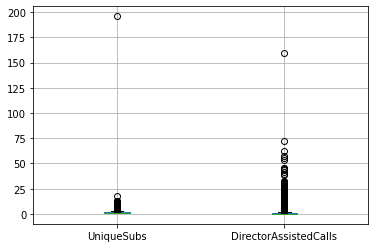

In [24]:
#plot box plot using pandas for columns "UniqueSubs" and "DirectorAssistedCalls"
cols=["UniqueSubs","DirectorAssistedCalls"]
data.boxplot(column=cols)

In [25]:
#Use "quantile" function to identify top 1% outliers

data[data.UniqueSubs >= data.UniqueSubs.quantile(q=0.99)] # Top 1% Outlier Rows of UniqueSubs
data[data.DirectorAssistedCalls >= data.DirectorAssistedCalls.quantile(q=0.99)] # Top 1% Outlier Rows of DirectorAssistedCalls

Churn  MonthlyRevenue  MonthlyMinutes  TotalRecurringCharge  \
11       No          212.51          1972.0                  85.0   
30      Yes           78.29           852.0                  85.0   
61       No          114.13          1650.0                  83.0   
104     Yes          117.12           490.0                  70.0   
121     Yes           85.58           890.0                  75.0   
...     ...             ...             ...                   ...   
50487    No           88.58           659.0                  95.0   
50502    No           81.81           627.0                  87.0   
50539    No           25.41           399.0                  35.0   
50583    No           51.15           209.0                  50.0   
50733   Yes           87.49             0.0                  97.0   

       DirectorAssistedCalls  OverageMinutes  RoamingCalls  PercChangeMinutes  \
11                      2.23           250.0          35.5             -200.0   
30                      0.00             0.0           0.0             -206.0   
61                      1.73            52.0           0.0             -177.0   
104                     0.00           140.0           0.0              506.0   
121                     0.99             0.0           0.0             -217.0   
...                      ...             ...           ...                ...   
50487                   0.25             0.0           0.0             -201.0   
50502                   0.99             2.0           0.0              -38.0   
50539                   0.25            38.0           0.0             -139.0   
50583                   0.99             0.0           0.2               95.0   
50733                   0.00             0.0           0.0                0.0   

       PercChangeRevenues  DroppedCalls  ...  NotNewCellphoneUser  \
11                 -106.8           9.0  ...                   No   
30                    0.0          10.7  ...                  Yes   
61                   17.9           3.7  ...                  Yes   
104                 133.8          11.3  ...                   No   
121                  18.3           7.3  ...                  Yes   
...                   ...           ...  ...                  ...   
50487                 0.6          12.3  ...                   No   
50502                 8.4          10.3  ...                   No   
50539                15.1           5.7  ...                   No   
50583                 0.5           4.0  ...                   No   
50733                -2.5           0.0  ...                   No   

       ReferralsMadeBySubscriber  IncomeGroup  OwnsMotorcycle  \
11                             0            3              No   
30                             0            5              No   
61                             0            4              No   
104                            0            2              No   
121                            0            5              No   
...                          ...          ...             ...   
50487                          0            6              No   
50502                          0            0              No   
50539                          0            6              No   
50583                          0            7              No   
50733                          0            9              No   

       AdjustmentsToCreditRating  HandsetPrice  MadeCallToRetentionTeam  \
11                             1          80.0                       No   
30                             0          10.0                       No   
61                             0         130.0                       No   
104                            0          30.0                      Yes   
121                            0          10.0                       No   
...                          ...           ...                      ...   
50487                          0          80.0                       

Churn  MonthlyRevenue  MonthlyMinutes  TotalRecurringCharge  \
83       No          260.81          3210.0                 213.0   
107     Yes          180.22          3559.0                 150.0   
144     Yes          316.47          3148.0                  75.0   
157      No          105.37          1206.0                  75.0   
161      No          529.63          5863.0                 202.0   
...     ...             ...             ...                   ...   
50662    No          120.93           620.0                  70.0   
50754    No          121.05          1225.0                 110.0   
50803    No          315.63          1920.0                 100.0   
50817    No          232.66          3360.0                 160.0   
50862   Yes          108.20           486.0                  30.0   

       DirectorAssistedCalls  OverageMinutes  RoamingCalls  PercChangeMinutes  \
83                     44.30             0.0           0.0             -422.0   
107                    11.38            99.0           0.0             -149.0   
144                    17.57          1306.0           0.0              997.0   
157                    18.56             0.0           0.0              134.0   
161                    55.19          1565.0           0.1              106.0   
...                      ...             ...           ...                ...   
50662                  10.64           104.0           0.0              468.0   
50754                  13.53             0.0           6.9              419.0   
50803                  13.86           785.0           0.3             -133.0   
50817                  10.39           506.0           0.0             1578.0   
50862                  11.88           190.0           0.0              410.0   

       PercChangeRevenues  DroppedCalls  ...  NotNewCellphoneUser  \
83                  -21.2           9.7  ...                   No   
107                 -11.4           3.7  ...                  Yes   
144                  14.3          17.3  ...                  Yes   
157                   9.9           8.7  ...                  Yes   
161                 -63.6           7.7  ...                  Yes   
...                   ...           ...  ...                  ...   
50662                18.5          12.3  ...                   No   
50754                 3.8          16.7  ...                   No   
50803               -35.9           4.7  ...                   No   
50817               199.8          33.7  ...                   No   
50862                78.2           3.3  ...                   No   

       ReferralsMadeBySubscriber  IncomeGroup  OwnsMotorcycle  \
83                             0            5              No   
107                            0            0              No   
144                            0            6             Yes   
157                            0            6              No   
161                            0            2              No   
...                          ...          ...             ...   
50662                          0            6              No   
50754                          0            0              No   
50803                          0            9              No   
50817                          0            3              No   
50862                          0            5              No   

       AdjustmentsToCreditRating  HandsetPrice  MadeCallToRetentionTeam  \
83                             3         150.0                       No   
107                            0         150.0                       No   
144                            1          30.0                       No   
157                            0         150.0                       No   
161                            0          40.0                       No   
...                          ...           ...                      ...   
50662                          0          30.0                       

In [26]:
#Finding Upper and lower whisker values of 'UniqueSubs'

q1Un = data['UniqueSubs'].quantile(0.01) # Finding 'UniqueSubs' Lower whisker value at 1st percentile
q3Un = data['UniqueSubs'].quantile(0.99) # Finding 'UniqueSubs' Upper whisker value at 99th percentile
q1Un # Lower whisker value of 'UniqueSubs' 
q3Un # Upper whisker value of 'UniqueSubs' 

1.0

5.0

In [27]:
#Finding Upper and lower whisker values of 'DirectorAssistedCalls'

q1Di = data['DirectorAssistedCalls'].quantile(0.01) #Finding 'DirectorAssistedCalls' Lower whisker value at 1st percentile
q3Di = data['DirectorAssistedCalls'].quantile(0.99) #Finding 'DirectorAssistedCalls' Upper whisker value at 99th percentile
q1Di # Lower whisker value of 'DirectorAssistedCalls'
q3Di # Upper whisker value of 'DirectorAssistedCalls'

0.0

9.65

<AxesSubplot:>

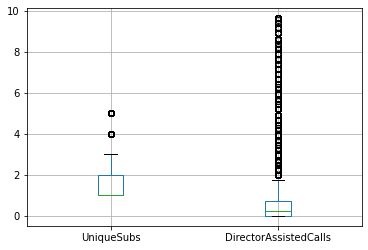

In [28]:
#Remove top 1% outliers from the above mentioned two columns and plot the box plot again

data = data[~((data['UniqueSubs']>(q3Un)))] # Remove top 1% outliers
data = data[~((data['DirectorAssistedCalls']>(q3Di)))] # Remove top 1% outliers

cols=["UniqueSubs","DirectorAssistedCalls"] # Initialize the column features
data.boxplot(column=cols) # plot box plot using pandas for columns "UniqueSubs" and "DirectorAssistedCalls"

In [29]:
data.shape

(49066, 56)

<mark>__Result:__
    
- The top 1% outliers have been removed for 'UniqueSubs' and 'DirectorAssistedCalls' features to aid in better analysis.
- More outliers of the features, especially 'DirectorAssistedCalls' could be removed for more accurate analysis.

### Remove any other unexpected values, if any ( Negative Values )

In [30]:
data.describe().T # View summary of dataset numerical variables

count        mean         std      min     25%  \
MonthlyRevenue             49066.0   57.722098   42.176650    -6.17   33.51   
MonthlyMinutes             49066.0  514.022521  509.369669     0.00  157.00   
TotalRecurringCharge       49066.0   46.452268   23.046707    -6.00   30.00   
DirectorAssistedCalls      49066.0    0.750117    1.392137     0.00    0.00   
OverageMinutes             49066.0   38.151551   91.325098     0.00    0.00   
RoamingCalls               49066.0    1.187698    9.181421     0.00    0.00   
PercChangeMinutes          49066.0  -11.224942  250.572155 -3406.00  -82.00   
PercChangeRevenues         49066.0   -1.175492   37.947721 -1107.70   -6.80   
DroppedCalls               49066.0    5.891467    8.814495     0.00    0.70   
BlockedCalls               49066.0    3.984820   10.507527     0.00    0.00   
UnansweredCalls            49066.0   27.643254   37.292551     0.00    5.30   
CustomerCareCalls          49066.0    1.853954    5.087903     0.00    0.00   
ThreewayCalls              49066.0    0.289337    1.138536     0.00    0.00   
ReceivedCalls              49066.0  112.356355  161.932721     0.00    8.30   
OutboundCalls              49066.0   24.738941   33.783487     0.00    3.30   
InboundCalls               49066.0    7.987662   16.202271     0.00    0.00   
PeakCallsInOut             49066.0   87.977098   99.022351     0.00   23.00   
OffPeakCallsInOut          49066.0   66.435630   90.170417     0.00   11.00   
DroppedBlockedCalls        49066.0    9.936414   15.012716     0.00    1.70   
CallForwardingCalls        49066.0    0.011713    0.585977     0.00    0.00   
CallWaitingCalls           49066.0    1.743770    5.131115     0.00    0.00   
MonthsInService            49066.0   18.714466    9.714562     6.00   11.00   
UniqueSubs                 49066.0    1.502711    0.784390     1.00    1.00   
ActiveSubs                 49066.0    1.341010    0.604211     0.00    1.00   
Handsets                   49066.0    1.790751    1.302231     1.00    1.00   
HandsetModels              49066.0    1.549566    0.891094     1.00    1.00   
CurrentEquipmentDays       49066.0  381.451555  252.478480    -5.00  206.00   
AgeHH1                     49066.0   31.382852   22.091752     0.00    0.00   
AgeHH2                     49066.0   21.189520   23.938517     0.00    0.00   
RetentionCalls             49066.0    0.035299    0.201536     0.00    0.00   
RetentionOffersAccepted    49066.0    0.018139    0.142180     0.00    0.00   
ReferralsMadeBySubscriber  49066.0    0.051624    0.267017     0.00    0.00   
IncomeGroup                49066.0    4.404150    3.107043     0.00    1.00   
AdjustmentsToCreditRating  49066.0    0.053275    0.381546     0.00    0.00   
HandsetPrice               49066.0   69.407329   40.830162    10.00   60.00   

                              50%     75%      max  
MonthlyRevenue              47.93   69.94  1223.38  
MonthlyMinutes             362.00  708.00  6336.00  
TotalRecurringCharge        45.00   60.00   360.00  
DirectorAssistedCalls        0.25    0.74     9.65  
OverageMinutes               2.00   39.00  4321.00  
RoamingCalls                 0.00    0.20  1112.40  
PercChangeMinutes           -5.00   64.00  5192.00  
PercChangeRevenues          -0.30    1.60  2483.50  
DroppedCalls                 3.00    7.30   221.70  
BlockedCalls                 1.00    3.70   314.70  
UnansweredCalls             16.00   36.00   840.00  
CustomerCareCalls            0.00    1.70   327.30  
ThreewayCalls                0.00    0.30    66.00  
ReceivedCalls               51.90  150.50  2619.30  
OutboundCalls               13.30   33.30   644.30  
InboundCalls                 2.00    9.00   519.30  
PeakCallsInOut              61.30  119.00  2090.70  
OffPeakCallsInOut           35.30   87.00  1474.70  
DroppedBlockedCalls          5.30   12.30   328.70  
CallForwardingCalls          0.00    0.00    81.30  
CallWaitingCalls             0.30    1.30   212.70  
MonthsInService   

In [31]:
data.shape

(49066, 56)

**Observations**
- Low numbers of negative values from 'MonthlyRevenue','TotalRecurringCharge','CurrentEquipmentDays' features that should not be there can have their rows removed.
- Negative values from 'PercChangeMinutes' and 'PercChangeRevenues' features are plausible given it shows percentage changes.

In [32]:
columns = ['MonthlyRevenue','TotalRecurringCharge','CurrentEquipmentDays']

for col in columns:
    print(f"{col}", (data[col]< 0).sum()) # print out column names followed by the sum of number of values < 0
    print(round(((data[col]< 0).sum() * 100 / len(data)),4), "%") # print % of Negative values over total number of values
    print('-'*30) # print seperator line

MonthlyRevenue 2
0.0041 %
------------------------------
TotalRecurringCharge 5
0.0102 %
------------------------------
CurrentEquipmentDays 70
0.1427 %
------------------------------


In [33]:
for col in columns:
    data = data[data[col] > 0] # Keep only the rows that are > 0

In [34]:
for col in columns:
    print(f"{col}", (data[col]< 0).sum()) # print out column names followed by the sum of number of values < 0
    print(round(((data[col]< 0).sum() * 100 / len(data)),4), "%") # print % of Negative values over total number of values
    print('-'*30) # print seperator line

MonthlyRevenue 0
0.0 %
------------------------------
TotalRecurringCharge 0
0.0 %
------------------------------
CurrentEquipmentDays 0
0.0 %
------------------------------


In [35]:
data.shape

(48854, 56)

<mark>__Result:__
    
- Unexpected negative value rows removed.

## Q2. Perform exploratory analysis to analyze customer churn

### Q2.1 Does customers with high overage minutes also have high revenue?

<AxesSubplot:xlabel='OverageMinutes', ylabel='MonthlyRevenue'>

0.7838629628903508

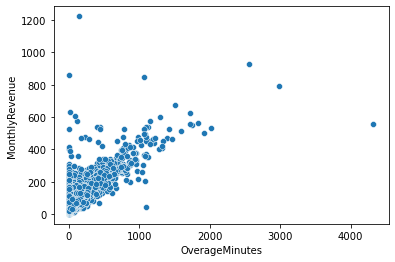

In [36]:
#use scatter plot to find the correlation between monthly revenue and overage minutes

sns.scatterplot(x = 'OverageMinutes', y = 'MonthlyRevenue', data = data )
data[['MonthlyRevenue','OverageMinutes']].corr()['MonthlyRevenue']['OverageMinutes'] # Correlation between features

<mark>__Result:__
    
- Based on the scatter plot, customers with high overage minutes also result in high revenue due to the largely positve correlation seen on this scatter plot 
- The correlation is found to be 0.784.

### Q2.2 Does high number of active subscribers lead to low monthly revenue?

-0.04924151663548479

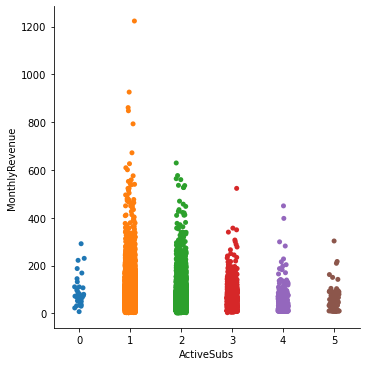

In [37]:
#use category plot to plot monthly revenue for each active subs category
sns.catplot(x = 'ActiveSubs', y = 'MonthlyRevenue', data = data )
data[['MonthlyRevenue','ActiveSubs']].corr()['MonthlyRevenue']['ActiveSubs'] # Correlation between features

<mark>__Result:__
    
- Higher number of active subscriptions per customer did lead to a lower monthly revenue.
- The correlation is found to be -0.049.   

### Q2.3 Does credit rating have an impact in churn rate?

In [38]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48854 entries, 0 to 51043
Data columns (total 56 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Churn                      48854 non-null  object 
 1   MonthlyRevenue             48854 non-null  float64
 2   MonthlyMinutes             48854 non-null  float64
 3   TotalRecurringCharge       48854 non-null  float64
 4   DirectorAssistedCalls      48854 non-null  float64
 5   OverageMinutes             48854 non-null  float64
 6   RoamingCalls               48854 non-null  float64
 7   PercChangeMinutes          48854 non-null  float64
 8   PercChangeRevenues         48854 non-null  float64
 9   DroppedCalls               48854 non-null  float64
 10  BlockedCalls               48854 non-null  float64
 11  UnansweredCalls            48854 non-null  float64
 12  CustomerCareCalls          48854 non-null  float64
 13  ThreewayCalls              48854 non-null  flo

In [39]:
### Function to plot stacked bar charts for categorical columns
def stacked_plot(x,flag=True):
    sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x,data['Churn'],margins=True)
    if flag==True:
        print(tab1)
        print('-'*120)
    tab = pd.crosstab(x,data['Churn'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

Churn            No    Yes    All
CreditRating                     
1-Highest      5613   2503   8116
2-High        12956   5549  18505
3-Good         5584   2482   8066
4-Medium       3809   1325   5134
5-Low          4833   1340   6173
6-VeryLow       619    221    840
7-Lowest       1440    580   2020
All           34854  14000  48854
------------------------------------------------------------------------------------------------------------------------


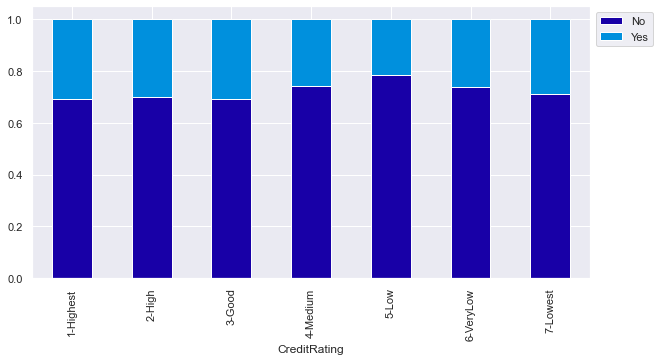

In [40]:
stacked_plot(data.CreditRating)

<mark>__Result:__  
- Credit Rating does not appear to have any appreciable impact on churn rate.
- Only at ratings of 4 to 5 does churn rate seems a little less.

### Placeholder for additional exploratory analysis
### Features Reduction - Data Prep

In [41]:
data_num = data.select_dtypes(np.number) # pulling out the data features that are numerical
data_cat = data.select_dtypes(np.object) # pulling out the data features that are object now but can be categorical later

In [42]:
data_num.info() # Numerical data features

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48854 entries, 0 to 51043
Data columns (total 35 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   MonthlyRevenue             48854 non-null  float64
 1   MonthlyMinutes             48854 non-null  float64
 2   TotalRecurringCharge       48854 non-null  float64
 3   DirectorAssistedCalls      48854 non-null  float64
 4   OverageMinutes             48854 non-null  float64
 5   RoamingCalls               48854 non-null  float64
 6   PercChangeMinutes          48854 non-null  float64
 7   PercChangeRevenues         48854 non-null  float64
 8   DroppedCalls               48854 non-null  float64
 9   BlockedCalls               48854 non-null  float64
 10  UnansweredCalls            48854 non-null  float64
 11  CustomerCareCalls          48854 non-null  float64
 12  ThreewayCalls              48854 non-null  float64
 13  ReceivedCalls              48854 non-null  flo

In [43]:
data_cat.info() # object / categorical data features

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48854 entries, 0 to 51043
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Churn                    48854 non-null  object
 1   ServiceArea              48854 non-null  object
 2   ChildrenInHH             48854 non-null  object
 3   HandsetRefurbished       48854 non-null  object
 4   HandsetWebCapable        48854 non-null  object
 5   TruckOwner               48854 non-null  object
 6   RVOwner                  48854 non-null  object
 7   Homeownership            48854 non-null  object
 8   BuysViaMailOrder         48854 non-null  object
 9   RespondsToMailOffers     48854 non-null  object
 10  OptOutMailings           48854 non-null  object
 11  NonUSTravel              48854 non-null  object
 12  OwnsComputer             48854 non-null  object
 13  HasCreditCard            48854 non-null  object
 14  NewCellphoneUser         48854 non-nul

### Features Reduction - Remove  Low Correlated Features to Target ( Numerical Features )

In [44]:
# Churn flag requires covverting to 1s and 0s for ML to work

# Stripping empty string values
# data["Churn"] = data["Churn"].str.strip()
Labels = data["Churn"].str.strip()

# Correcting Attrition_Flag variable values
Labels.replace("No", 0, inplace=True) # '0' flag for existing customer
Labels.replace("Yes", 1, inplace=True) # '1' flag for attrited customer

data_num['Churn'] = Labels

# Attrition_Flag variable values corrected
print(Labels.value_counts()) # Display Labels unique values and their counts

0    34854
1    14000
Name: Churn, dtype: int64


In [45]:
# find correlations to target
corr_matrix = data_num.corr().abs() # set function to find corrrelation of features to target variable
col_tokeep = corr_matrix['Churn'].sort_values(ascending=False).head(21) # choose the top 20 features correlating 
                                                                        # to Churn variable along with Churn variable
col_tokeep # Display the features correlation to 'Churn' target variable
col_tokeep.index # Show the top 20 feature names correlating to Churn Variable along with Churn variable  

Churn                      1.000000
CurrentEquipmentDays       0.104561
TotalRecurringCharge       0.057992
RetentionCalls             0.057822
MonthlyMinutes             0.048847
OffPeakCallsInOut          0.040801
HandsetModels              0.039575
PeakCallsInOut             0.038251
ReceivedCalls              0.035931
CustomerCareCalls          0.034949
RetentionOffersAccepted    0.034942
InboundCalls               0.034151
UniqueSubs                 0.032912
Handsets                   0.032891
PercChangeMinutes          0.032641
OutboundCalls              0.031306
AgeHH1                     0.028970
UnansweredCalls            0.028309
CallWaitingCalls           0.025234
ThreewayCalls              0.023296
MonthsInService            0.021100
Name: Churn, dtype: float64

Index(['Churn', 'CurrentEquipmentDays', 'TotalRecurringCharge',
       'RetentionCalls', 'MonthlyMinutes', 'OffPeakCallsInOut',
       'HandsetModels', 'PeakCallsInOut', 'ReceivedCalls', 'CustomerCareCalls',
       'RetentionOffersAccepted', 'InboundCalls', 'UniqueSubs', 'Handsets',
       'PercChangeMinutes', 'OutboundCalls', 'AgeHH1', 'UnansweredCalls',
       'CallWaitingCalls', 'ThreewayCalls', 'MonthsInService'],
      dtype='object')

**Observations**
- The list of top 20 numerical features with higher correlation to the target variable 'Churn' selected to be kept in the analysis are displayed above.
- The lowest correlation in the top 20 is only ~ 0.02.

In [46]:
# Find index of feature columns with higher correlation
data_num = data_num[col_tokeep.index] # Keep the top 20 features and their values in data set
data_num.drop(["Churn"],axis=1,inplace=True) # Drop 'Churn' feature
data_num.columns # View the dataset columns (modified)

Index(['CurrentEquipmentDays', 'TotalRecurringCharge', 'RetentionCalls',
       'MonthlyMinutes', 'OffPeakCallsInOut', 'HandsetModels',
       'PeakCallsInOut', 'ReceivedCalls', 'CustomerCareCalls',
       'RetentionOffersAccepted', 'InboundCalls', 'UniqueSubs', 'Handsets',
       'PercChangeMinutes', 'OutboundCalls', 'AgeHH1', 'UnansweredCalls',
       'CallWaitingCalls', 'ThreewayCalls', 'MonthsInService'],
      dtype='object')

<mark>__Result:__
- Top 20 numerical features with higher correlation to the target variable 'Churn' are kept.

### Features Reduction -  Eliminate Low Variance Features ( Numerical Features )

In [47]:
data_num.columns # View the dataset columns

Index(['CurrentEquipmentDays', 'TotalRecurringCharge', 'RetentionCalls',
       'MonthlyMinutes', 'OffPeakCallsInOut', 'HandsetModels',
       'PeakCallsInOut', 'ReceivedCalls', 'CustomerCareCalls',
       'RetentionOffersAccepted', 'InboundCalls', 'UniqueSubs', 'Handsets',
       'PercChangeMinutes', 'OutboundCalls', 'AgeHH1', 'UnansweredCalls',
       'CallWaitingCalls', 'ThreewayCalls', 'MonthsInService'],
      dtype='object')

In [48]:
from sklearn import feature_selection as fs
print(data_num.shape) # View the dataset shape before modification 

## Define the variance threhold and fit the threshold to the feature array. 
sel = fs.VarianceThreshold(threshold=(.8 * (1 - .8)))
data_num_reduced = sel.fit_transform(data_num)

## Print the support and shape for the transformed features
print(sel.get_support()) # Show the True False Array
print(data_num_reduced.shape) # View the dataset shape after modification 

(48854, 20)
[ True  True False  True  True  True  True  True  True False  True  True
  True  True  True  True  True  True  True  True]
(48854, 18)


**Observations**
- The number of numerical features has been further reduced from 20 to 18. 
- Apparently, there are 2 low variance features in the array.
- They are 'RetentionCalls', 'RetentionOffersAccepted'.

In [49]:
drop_cols = [i for i, val in enumerate(sel.get_support()) if not val] # Find indices of columns to be removed
drop_cols # View the dataset columns indices to be dropped

data_num.drop(data_num.columns[drop_cols], axis=1, inplace=True) # Remove columns listed by indices 
                                                                 # ; inplace means no make copy
data_num.columns # View the dataset columns (modified)

[2, 9]

Index(['CurrentEquipmentDays', 'TotalRecurringCharge', 'MonthlyMinutes',
       'OffPeakCallsInOut', 'HandsetModels', 'PeakCallsInOut', 'ReceivedCalls',
       'CustomerCareCalls', 'InboundCalls', 'UniqueSubs', 'Handsets',
       'PercChangeMinutes', 'OutboundCalls', 'AgeHH1', 'UnansweredCalls',
       'CallWaitingCalls', 'ThreewayCalls', 'MonthsInService'],
      dtype='object')

<mark>__Result:__
-  Low variance features, 'RetentionCalls', 'RetentionOffersAccepted', are dropped in the dataset.

### Features Reduction - RFECV Feature Selector ( Numerical Features )

In [50]:
data_num.columns # View the dataset columns

Index(['CurrentEquipmentDays', 'TotalRecurringCharge', 'MonthlyMinutes',
       'OffPeakCallsInOut', 'HandsetModels', 'PeakCallsInOut', 'ReceivedCalls',
       'CustomerCareCalls', 'InboundCalls', 'UniqueSubs', 'Handsets',
       'PercChangeMinutes', 'OutboundCalls', 'AgeHH1', 'UnansweredCalls',
       'CallWaitingCalls', 'ThreewayCalls', 'MonthsInService'],
      dtype='object')

In [51]:
%%time
import numpy.random as nr
import sklearn.model_selection as ms
from sklearn import linear_model

## Set folds for nested cross validation
nr.seed(1)
feature_folds = ms.KFold(n_splits=10, shuffle = True)

## Define the model
logistic_mod = linear_model.LogisticRegression(penalty = 'l1', solver = 'saga', C = 10, class_weight = {0:0.29, 1:0.71}) 

## Perform feature selection by CV with high variance features only
nr.seed(42)
selector = fs.RFECV(estimator = logistic_mod, cv = feature_folds, # Feature ranking with recursive feature elimination and cross-validated selection of the best number of features
                      scoring = 'roc_auc')
selector = selector.fit(data_num_reduced, Labels)
print(selector.support_)  # print out true false array of the features to keep or discard

data_num_reduced = selector.transform(data_num_reduced)
print(data_num_reduced.shape)

[ True  True False  True  True False False  True  True  True  True  True
  True  True  True  True  True  True]
(48854, 15)
Wall time: 4min 10s


**Observations**
- The number of numerical features has been further reduced from 18 to 15. 
- 'MonthlyMinutes', 'PeakCallsInOut', 'ReceivedCalls' have been identified to be removed.
- 'MonthlyMinutes' is to be kept for futher analysis downstream.

In [52]:
drop_cols = [i for i, val in enumerate(selector.support_) if not val] # Find indices of columns to be removed
drop_cols # View the dataset columns indices to be dropped

data_num.drop(data_num.columns[drop_cols], axis=1, inplace=True) # Remove columns listed by indices 
                                                                 # ; inplace means no make copy
data_num['MonthlyMinutes'] = data['MonthlyMinutes']
data_num.columns # View the dataset columns (modified)

[2, 5, 6]

Index(['CurrentEquipmentDays', 'TotalRecurringCharge', 'OffPeakCallsInOut',
       'HandsetModels', 'CustomerCareCalls', 'InboundCalls', 'UniqueSubs',
       'Handsets', 'PercChangeMinutes', 'OutboundCalls', 'AgeHH1',
       'UnansweredCalls', 'CallWaitingCalls', 'ThreewayCalls',
       'MonthsInService', 'MonthlyMinutes'],
      dtype='object')

<mark>__Result:__
- The number of numerical features has been further reduced from 18 to 16 instead. 
- 'PeakCallsInOut', 'ReceivedCalls' have been removed.

### Features Reduction - Multicollinearity ( Numerical Features )

<Figure size 1440x1440 with 0 Axes>

<AxesSubplot:>

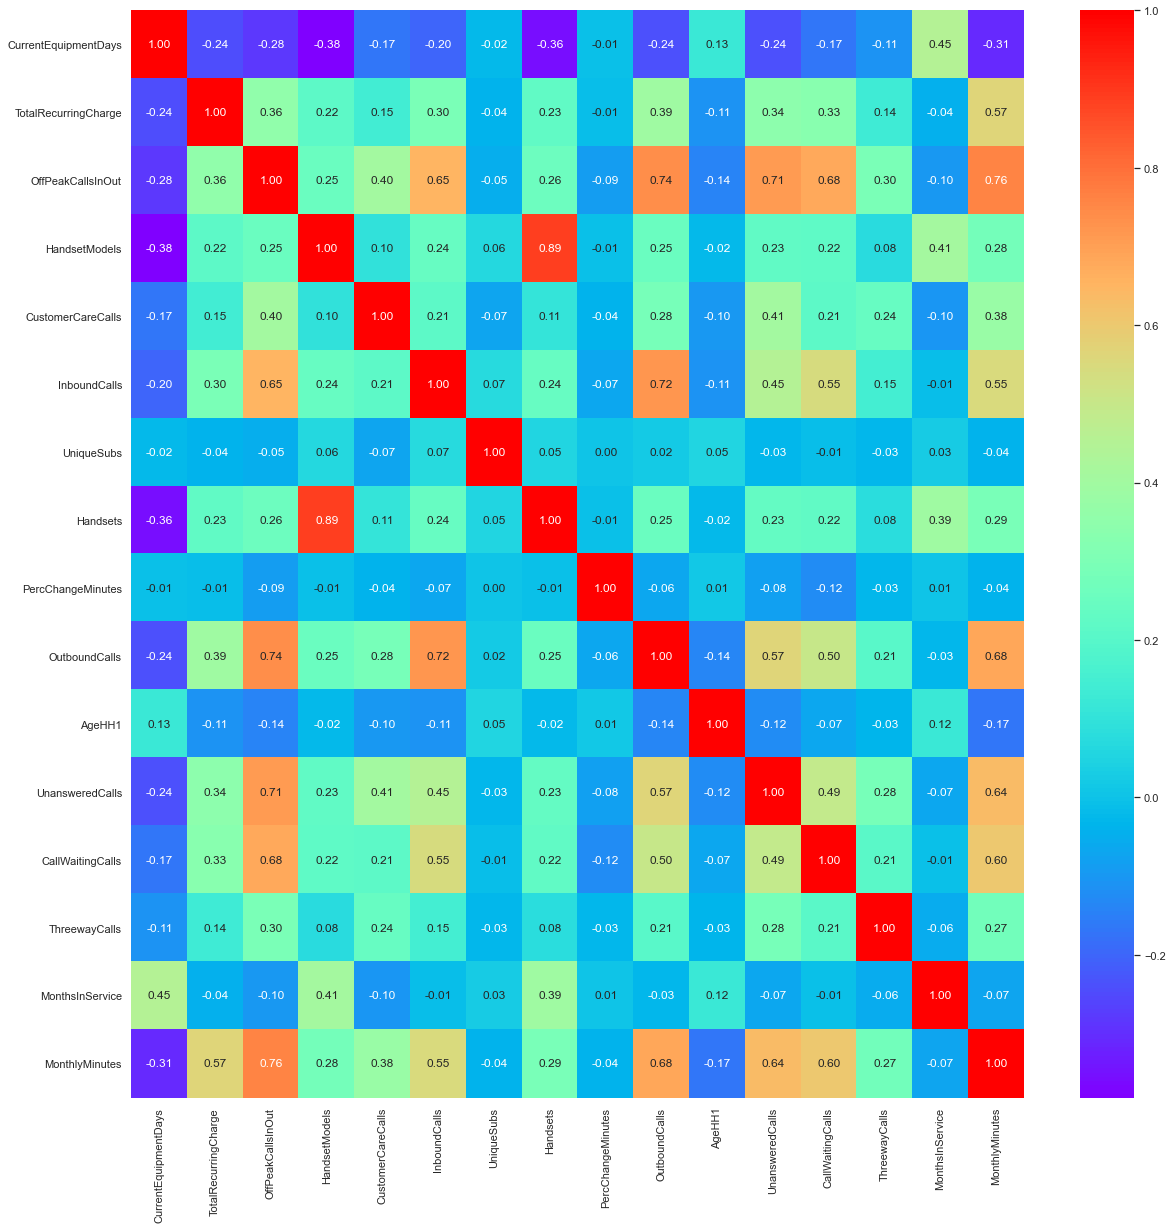

In [53]:
# HeatMap Call

plt.figure(figsize=(20,20))
sns.heatmap(data_num.corr(),annot=True,fmt='.2f',cmap='rainbow', )
plt.show()

In [54]:
data_num.columns # View the dataset columns

Index(['CurrentEquipmentDays', 'TotalRecurringCharge', 'OffPeakCallsInOut',
       'HandsetModels', 'CustomerCareCalls', 'InboundCalls', 'UniqueSubs',
       'Handsets', 'PercChangeMinutes', 'OutboundCalls', 'AgeHH1',
       'UnansweredCalls', 'CallWaitingCalls', 'ThreewayCalls',
       'MonthsInService', 'MonthlyMinutes'],
      dtype='object')

**Observatons**
- A threshold of correlation absolute above 0.5 value will be applied to remove multicollinear features.
- Since 'MonthlyMinutes' and 'TotalRecurringCharge' are to be kept for futher analysis downstream; 'OffPeakCallsInOut', 'InboundCalls', 'OutboundCalls', 'UnansweredCalls', 'CallWaitingCalls', 'HandsetModels' shall be removed.

In [55]:
drop_cols = ['OffPeakCallsInOut','InboundCalls','OutboundCalls', 
             'UnansweredCalls','CallWaitingCalls','HandsetModels'] # columns to be removed

data_num.drop(drop_cols, axis=1, inplace=True) # Remove columns listed by indices ; inplace means no make copy
data_num.columns # View the dataset columns (modified)

Index(['CurrentEquipmentDays', 'TotalRecurringCharge', 'CustomerCareCalls',
       'UniqueSubs', 'Handsets', 'PercChangeMinutes', 'AgeHH1',
       'ThreewayCalls', 'MonthsInService', 'MonthlyMinutes'],
      dtype='object')

<mark>__Result:__
- The number of numerical features has been further reduced from 16 to 10. 
- 'OffPeakCallsInOut','InboundCalls','OutboundCalls','UnansweredCalls','CallWaitingCalls','HandsetModels' have been removed.

### Features Reduction - Information Value and Weights of Evidence  ( Categorical Features )

In [56]:
data_cat.columns # View the dataset columns

Index(['Churn', 'ServiceArea', 'ChildrenInHH', 'HandsetRefurbished',
       'HandsetWebCapable', 'TruckOwner', 'RVOwner', 'Homeownership',
       'BuysViaMailOrder', 'RespondsToMailOffers', 'OptOutMailings',
       'NonUSTravel', 'OwnsComputer', 'HasCreditCard', 'NewCellphoneUser',
       'NotNewCellphoneUser', 'OwnsMotorcycle', 'MadeCallToRetentionTeam',
       'CreditRating', 'PrizmCode', 'Occupation'],
      dtype='object')

In [57]:
data_cat['target'] = Labels  # Put in Labels' values which is Churn in numeric form
data_cat = data_cat.drop('Churn',axis=1) # Drop Churn feature
data_cat.columns # View the dataset columns (modified)
print(data_cat["target"].value_counts(dropna=False)) # See the unique value counts of 'target' feature 

Index(['ServiceArea', 'ChildrenInHH', 'HandsetRefurbished',
       'HandsetWebCapable', 'TruckOwner', 'RVOwner', 'Homeownership',
       'BuysViaMailOrder', 'RespondsToMailOffers', 'OptOutMailings',
       'NonUSTravel', 'OwnsComputer', 'HasCreditCard', 'NewCellphoneUser',
       'NotNewCellphoneUser', 'OwnsMotorcycle', 'MadeCallToRetentionTeam',
       'CreditRating', 'PrizmCode', 'Occupation', 'target'],
      dtype='object')

0    34854
1    14000
Name: target, dtype: int64


In [58]:
# Define the Information Value and Weight Of Evidence Function

# import packages
import pandas as pd
import numpy as np
import pandas.core.algorithms as algos
from pandas import Series
import scipy.stats.stats as stats
import re
import traceback
import string

max_bin = 20
force_bin = 3

# define a binning function
def mono_bin(Y, X, n = max_bin):
    
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]
    r = 0
    while np.abs(r) < 1:
        try:
            d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.qcut(notmiss.X, n)})
            d2 = d1.groupby('Bucket', as_index=True)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            n = n - 1 
        except Exception as e:
            n = n - 1

    if len(d2) == 1:
        n = force_bin         
        bins = algos.quantile(notmiss.X, np.linspace(0, 1, n))
        if len(np.unique(bins)) == 2:
            bins = np.insert(bins, 0, 1)
            bins[1] = bins[1]-(bins[1]/2)
        d1 = pd.DataFrame({"X": notmiss.X, "Y": notmiss.Y, "Bucket": pd.cut(notmiss.X, np.unique(bins),include_lowest=True)}) 
        d2 = d1.groupby('Bucket', as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["MIN_VALUE"] = d2.min().X
    d3["MAX_VALUE"] = d2.max().X
    d3["COUNT"] = d2.count().Y
    d3["EVENT"] = d2.sum().Y
    d3["NONEVENT"] = d2.count().Y - d2.sum().Y
    d3=d3.reset_index(drop=True)
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]       
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    
    return(d3)

def char_bin(Y, X):
        
    df1 = pd.DataFrame({"X": X, "Y": Y})
    justmiss = df1[['X','Y']][df1.X.isnull()]
    notmiss = df1[['X','Y']][df1.X.notnull()]    
    df2 = notmiss.groupby('X',as_index=True)
    
    d3 = pd.DataFrame({},index=[])
    d3["COUNT"] = df2.count().Y
    d3["MIN_VALUE"] = df2.sum().Y.index
    d3["MAX_VALUE"] = d3["MIN_VALUE"]
    d3["EVENT"] = df2.sum().Y
    d3["NONEVENT"] = df2.count().Y - df2.sum().Y
    
    if len(justmiss.index) > 0:
        d4 = pd.DataFrame({'MIN_VALUE':np.nan},index=[0])
        d4["MAX_VALUE"] = np.nan
        d4["COUNT"] = justmiss.count().Y
        d4["EVENT"] = justmiss.sum().Y
        d4["NONEVENT"] = justmiss.count().Y - justmiss.sum().Y
        d3 = d3.append(d4,ignore_index=True)
    
    d3["EVENT_RATE"] = d3.EVENT/d3.COUNT
    d3["NON_EVENT_RATE"] = d3.NONEVENT/d3.COUNT
    d3["DIST_EVENT"] = d3.EVENT/d3.sum().EVENT
    d3["DIST_NON_EVENT"] = d3.NONEVENT/d3.sum().NONEVENT
    d3["WOE"] = np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["IV"] = (d3.DIST_EVENT-d3.DIST_NON_EVENT)*np.log(d3.DIST_EVENT/d3.DIST_NON_EVENT)
    d3["VAR_NAME"] = "VAR"
    d3 = d3[['VAR_NAME','MIN_VALUE', 'MAX_VALUE', 'COUNT', 'EVENT', 'EVENT_RATE', 'NONEVENT', 'NON_EVENT_RATE', 'DIST_EVENT','DIST_NON_EVENT','WOE', 'IV']]      
    d3 = d3.replace([np.inf, -np.inf], 0)
    d3.IV = d3.IV.sum()
    d3 = d3.reset_index(drop=True)
    
    return(d3)

def data_vars(df1, target):
    
    stack = traceback.extract_stack()
    filename, lineno, function_name, code = stack[-2]
    vars_name = re.compile(r'\((.*?)\).*$').search(code).groups()[0]
    final = (re.findall(r"[\w']+", vars_name))[-1]
    
    x = df1.dtypes.index
    count = -1
    
    for i in x:
        if i.upper() not in (final.upper()):
            if np.issubdtype(df1[i], np.number) and len(Series.unique(df1[i])) > 2:
                conv = mono_bin(target, df1[i])
                conv["VAR_NAME"] = i
                count = count + 1
            else:
                conv = char_bin(target, df1[i])
                conv["VAR_NAME"] = i            
                count = count + 1
                
            if count == 0:
                iv_df = conv
            else:
                iv_df = iv_df.append(conv,ignore_index=True)
    
    iv = pd.DataFrame({'IV':iv_df.groupby('VAR_NAME').IV.max()})
    iv = iv.reset_index()
    return(iv_df,iv)

In [59]:
final_iv, IV = data_vars(data_cat,data_cat.target) # Retrieve the IV and WOE final results
final_iv # Detailed IV and WOE results

VAR_NAME     MIN_VALUE     MAX_VALUE  COUNT  EVENT  EVENT_RATE  \
0    ServiceArea     AIRAIK803     AIRAIK803      4      1    0.250000   
1    ServiceArea     AIRAND864     AIRAND864     21     11    0.523810   
2    ServiceArea     AIRASH828     AIRASH828     30      6    0.200000   
3    ServiceArea     AIRAUG706     AIRAUG706     43     17    0.395349   
4    ServiceArea     AIRBEA843     AIRBEA843     16      3    0.187500   
..           ...           ...           ...    ...    ...         ...   
787   Occupation         Other         Other  35752  10323    0.288739   
788   Occupation  Professional  Professional   8541   2400    0.280998   
789   Occupation       Retired       Retired    716    179    0.250000   
790   Occupation          Self          Self    858    233    0.271562   
791   Occupation       Student       Student    372    112    0.301075   

     NONEVENT  NON_EVENT_RATE  DIST_EVENT  DIST_NON_EVENT       WOE        IV  
0           3        0.750000    0.000071        0.000086 -0.186502  0.071930  
1          10        0.476190    0.000786        0.000287  1.007421  0.071930  
2          24        0.800000    0.000429        0.000689 -0.474184  0.071930  
3          26        0.604651    0.001214        0.000746  0.487227  0.071930  
4          13        0.812500    0.000214        0.000373 -0.554226  0.071930  
..        ...             ...         ...             ...       ...       ...  
787     25429        0.711261    0.737357        0.729586  0.010595  0.000992  
788      6141        0.719002    0.171429        0.176192 -0.027408  0.000992  
789       537        0.750000    0.012786        0.015407 -0.186502  0.000992  
790       625        0.728438    0.016643        0.017932 -0.074603  0.000992  
791       260        0.698925    0.008000        0.007460  0.069928  0.000992  

[792 rows x 12 columns]

In [60]:
data_cat.columns # View the dataset columns

Index(['ServiceArea', 'ChildrenInHH', 'HandsetRefurbished',
       'HandsetWebCapable', 'TruckOwner', 'RVOwner', 'Homeownership',
       'BuysViaMailOrder', 'RespondsToMailOffers', 'OptOutMailings',
       'NonUSTravel', 'OwnsComputer', 'HasCreditCard', 'NewCellphoneUser',
       'NotNewCellphoneUser', 'OwnsMotorcycle', 'MadeCallToRetentionTeam',
       'CreditRating', 'PrizmCode', 'Occupation', 'target'],
      dtype='object')

In [61]:
IV.sort_values('IV', ascending = False) # Features and IV results in descending order

VAR_NAME        IV
18              ServiceArea  0.071930
2              CreditRating  0.023424
4         HandsetWebCapable  0.018199
7   MadeCallToRetentionTeam  0.015643
3        HandsetRefurbished  0.004310
17     RespondsToMailOffers  0.002970
0          BuysViaMailOrder  0.002741
15                PrizmCode  0.001536
11               Occupation  0.000992
6             Homeownership  0.000934
5             HasCreditCard  0.000415
1              ChildrenInHH  0.000374
8          NewCellphoneUser  0.000277
14           OwnsMotorcycle  0.000219
19               TruckOwner  0.000187
10      NotNewCellphoneUser  0.000145
16                  RVOwner  0.000087
9               NonUSTravel  0.000050
13             OwnsComputer  0.000026
12           OptOutMailings  0.000001

**Observatons**
- There does not seem to have any strong predictors in the categorical variables in the data set.
- Only variables with IV of at least 2 decimal placed values will be selected.
- They are 'ServiceArea', 'CreditRating', 'HandsetWebCapable' and 'MadeCallToRetentionTeam'.

In [62]:
col_tokeep = ['ServiceArea', 'CreditRating', 'HandsetWebCapable', 'MadeCallToRetentionTeam'] # Categorical features to keep

data_cat = data_cat[col_tokeep] # Retain the selected features
data_cat['Churn']=data['Churn'] # Add back Churn feature
data_cat.columns # View the dataset columns (modified) 

Index(['ServiceArea', 'CreditRating', 'HandsetWebCapable',
       'MadeCallToRetentionTeam', 'Churn'],
      dtype='object')

<mark>__Result:__
- The number of categorical features has been reduced from 21 to 4 not including 'Churn' variable. 
- 'ServiceArea', 'CreditRating', 'HandsetWebCapable', 'MadeCallToRetentionTeam' have been retained.

### Features Reduction - Reconstructing Data Set after Feature Reduction

In [63]:
data_new = pd.concat([data_num, data_cat], axis=1) # combine the columns and data from data_num and data_cat data sets
data_new['MonthlyRevenue'] = data['MonthlyRevenue'] # Monthly Revenue feature added back for further analysis down stream
data_new['ActiveSubs'] = data['ActiveSubs'] # ActiveSubs feature added back for further analysis down stream
data_new['OverageMinutes'] = data['OverageMinutes'] # OverageMinutes feature added back for further analysis down stream

In [64]:
data_new.head(10)
np.random.seed(42)  # To get the same random results every time
data_new.sample(n=20)
data_new.tail(10)

CurrentEquipmentDays  TotalRecurringCharge  CustomerCareCalls  UniqueSubs  \
0                 361.0                  22.0                0.0           2   
1                1504.0                  17.0                0.0           1   
2                1812.0                  38.0                0.0           1   
3                 458.0                  75.0                4.3           2   
4                 852.0                  17.0                0.0           2   
5                 231.0                  52.0                0.7           1   
6                 601.0                  30.0                0.0           2   
7                 464.0                  66.0                4.0           2   
8                 544.0                  35.0                0.0           3   
9                 388.0                  75.0                0.0           1   

   Handsets  PercChangeMinutes  AgeHH1  ThreewayCalls  MonthsInService  \
0       2.0             -157.0    62.0            0.0               61   
1       2.0               -4.0    40.0            0.0               58   
2       1.0               -2.0    26.0            0.0               60   
3       9.0              157.0    30.0            1.3               59   
4       4.0                0.0    46.0            0.0               53   
5       3.0              148.0    28.0            0.0               53   
6       2.0               60.0    52.0            0.0               57   
7       3.0               24.0    46.0            0.0               59   
8       4.0               20.0    36.0            0.0               53   
9       9.0               43.0    46.0            0.0               55   

   MonthlyMinutes ServiceArea CreditRating HandsetWebCapable  \
0           219.0   SEAPOR503    1-Highest               Yes   
1            10.0   PITHOM412     4-Medium                No   
2             8.0   MILMIL414       3-Good                No   
3          1312.0   PITHOM412     4-Medium               Yes   
4             0.0   OKCTUL918    1-Highest                No   
5           682.0   OKCTUL918       3-Good               Yes   
6            26.0   OKCTUL918    1-Highest               Yes   
7            98.0   OKCOKC405    1-Highest               Yes   
8            24.0   SANMCA210    1-Highest               Yes   
9          1056.0   PITHOM412       3-Good               Yes   

  MadeCallToRetentionTeam Churn  MonthlyRevenue  ActiveSubs  OverageMinutes  
0                     Yes   Yes           24.00           1             0.0  
1                      No   Yes           16.99           1             0.0  
2                      No    No           38.00           1             0.0  
3                      No    No           82.28           2             0.0  
4                      No   Yes           17.14           2             0.0  
5                      No    No           38.05           1             0.0  
6                      No    No           31.66           2             0.0  
7                      No    No           62.13           2             0.0  
8                      No    No           35.30           3             0.0  
9                      No    No           81.00           1             0.0

CurrentEquipmentDays  TotalRecurringCharge  CustomerCareCalls  \
14559                 641.0                  30.0                0.0   
46295                 201.0                  60.0                0.3   
45299                 219.0                  45.0                0.0   
2326                  519.0                  75.0                4.7   
18471                   3.0                  45.0                0.7   
27010                 327.0                  10.0                0.0   
160                    53.0                  50.0                3.0   
23825                 589.0                  30.0                0.0   
9508                  754.0                  32.0                0.3   
50459                 945.0                  45.0                0.0   
2659                  410.0                  50.0                0.0   
15315                 176.0                  30.0                0.0   
10450                 734.0                  50.0                0.0   
39271                 323.0                  45.0                0.0   
5756                  695.0                  30.0                1.7   
38449                 223.0                  45.0                6.7   
25032                 504.0                  30.0                0.0   
7100                  440.0                  60.0                8.7   
35380                 423.0                  10.0                0.0   
35976                 309.0                  40.0                0.0   

       UniqueSubs  Handsets  PercChangeMinutes  AgeHH1  ThreewayCalls  \
14559           2       1.0               -9.0     0.0            0.0   
46295           2       1.0              -35.0     0.0            0.0   
45299           1       1.0              139.0    44.0            0.0   
2326            1       2.0              -30.0     0.0            1.0   
18471           1       3.0               42.0    26.0            0.0   
27010           4       2.0               38.0    42.0            0.0   
160             1       3.0               18.0    54.0            0.0   
23825           4       1.0               10.0    54.0            0.0   
9508            2       1.0              -27.0    62.0            0.0   
50459           1       1.0             -199.0    42.0            0.3   
2659            1       5.0              108.0     0.0            0.0   
15315           2       2.0              -71.0    36.0            0.0   
10450           2       1.0              -41.0    46.0            0.0   
39271           3       1.0              897.0    52.0            0.3   
5756            1       2.0             -124.0    36.0            0.0   
38449           1       1.0             -179.0    48.0            0.0   
25032           1       2.0               -1.0    40.0            0.0   
7100            1       3.0              -30.0     0.0            0.3   
35380           3       1.0               46.0    46.0            0.0   
35976           2       1.0              -29.0    40.0            0.0   

       MonthsInService  MonthlyMinutes ServiceArea CreditRating  \
14559               21           141.0   LAXLAG949       2-High   
46295                7           758.0   HOUHOU281       2-High   
45299                7           372.0   INDIND317       3-Good   
2326                35          1046.0   SFRSCL408    1-Highest   
18471               19           206.0   OHICAN330        5-Low   
27010               18            80.0   SFRSCL408       2-High   
160                 50           409.0   NOLKEN504    1-Highest   
23825               20           286.0   NEVLVS702    1-Highest   
9508                25            71.0   DALDAL214       2-High   
50459               31           545.0   LAXIRV949    1-Highest   
2659                34           257.0   SFRSMO650       3-Good   
15315               23            96.0   LAXCDG310       2-High   
10450               24           554.0   SANMCA210        5-Low   
39271               11

CurrentEquipmentDays  TotalRecurringCharge  CustomerCareCalls  \
51020                 184.0                  43.0                6.0   
51029                 946.0                  30.0                0.0   
51030                 394.0                  45.0                3.3   
51031                 315.0                  30.0                0.0   
51032                  33.0                  17.0                0.0   
51033                 945.0                  30.0                1.3   
51037                 883.0                  17.0                0.0   
51040                 882.0                  70.0                0.0   
51041                 489.0                  30.0                0.0   
51043                 464.0                  85.0                0.0   

       UniqueSubs  Handsets  PercChangeMinutes  AgeHH1  ThreewayCalls  \
51020           1       5.0             -603.0     0.0            0.0   
51029           1       1.0               13.0     0.0            0.0   
51030           1       4.0               92.0    24.0            0.0   
51031           2       2.0                0.0     0.0            0.0   
51032           1       2.0              -10.0     0.0            0.0   
51033           2       1.0              -66.0    36.0            0.0   
51037           1       1.0              -38.0    58.0            0.0   
51040           1       1.0              -40.0    50.0            1.7   
51041           1       2.0                0.0    22.0            0.0   
51043           1       2.0              122.0    48.0            0.0   

       MonthsInService  MonthlyMinutes ServiceArea CreditRating  \
51020               35           603.0   NEVENC760        5-Low   
51029               32            63.0   LAXCDG310       3-Good   
51030               35           586.0   LAXOAK805       3-Good   
51031               33            28.0   NEVENC760     4-Medium   
51032               35            14.0   LAXRIV909    1-Highest   
51033               35           320.0   LAXANA714    1-Highest   
51037               30            63.0   NEVENC760       3-Good   
51040               30           724.0   LAXVNY818    1-Highest   
51041               30           384.0   LAXDOW562        5-Low   
51043               29          1745.0   LAXCDG310       3-Good   

      HandsetWebCapable MadeCallToRetentionTeam Churn  MonthlyRevenue  \
51020               Yes                      No    No          109.50   
51029               Yes                      No   Yes           30.24   
51030               Yes                      No    No           71.16   
51031               Yes                      No   Yes           33.63   
51032               Yes                     Yes    No           19.96   
51033               Yes                      No   Yes           38.34   
51037               Yes                      No    No           31.92   
51040                No                      No    No           71.99   
51041               Yes                      No   Yes          117.49   
51043               Yes                      No    No           95.17   

       ActiveSubs  OverageMinutes  
51020           1             1.0  
51029           1             0.0  
51030           1           100.0  
51031           1             0.0  
51032           1             0.0  
51033           2            21.0  
51037           1            43.0  
51040           1             4.0  
51041           1           250.0  
51043           1            45.0

In [65]:
cat_cols = list(data_new.select_dtypes(['object']).columns) # List of all object datatype features
cat_cols # Display features of object datatype

#Converting the data type of each object feature to 'category'
for column in cat_cols:
    data_new[column]=data_new[column].astype('category')
    
data_new.info() # View data set info

['ServiceArea',
 'CreditRating',
 'HandsetWebCapable',
 'MadeCallToRetentionTeam',
 'Churn']

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48854 entries, 0 to 51043
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   CurrentEquipmentDays     48854 non-null  float64 
 1   TotalRecurringCharge     48854 non-null  float64 
 2   CustomerCareCalls        48854 non-null  float64 
 3   UniqueSubs               48854 non-null  int64   
 4   Handsets                 48854 non-null  float64 
 5   PercChangeMinutes        48854 non-null  float64 
 6   AgeHH1                   48854 non-null  float64 
 7   ThreewayCalls            48854 non-null  float64 
 8   MonthsInService          48854 non-null  int64   
 9   MonthlyMinutes           48854 non-null  float64 
 10  ServiceArea              48854 non-null  category
 11  CreditRating             48854 non-null  category
 12  HandsetWebCapable        48854 non-null  category
 13  MadeCallToRetentionTeam  48854 non-null  category
 14  Churn 

In [66]:
data = data_new.copy() # Overwrite 'data' data set with reduced features

### Placeholder for additional exploratory analysis
### Univariate Analysis

In [67]:
#type your code here for any additional exploratory analysis (if any)

#### Numerical Analysis

In [68]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [69]:
data.describe().T # View summary of dataset numerical variables

count        mean         std      min       25%  \
CurrentEquipmentDays  48854.0  381.200618  250.204418     1.00  206.0000   
TotalRecurringCharge  48854.0   46.550477   22.952561     1.00   30.0000   
CustomerCareCalls     48854.0    1.853441    5.084793     0.00    0.0000   
UniqueSubs            48854.0    1.502415    0.784280     1.00    1.0000   
Handsets              48854.0    1.786302    1.296858     1.00    1.0000   
PercChangeMinutes     48854.0  -11.353400  250.552225 -3406.00  -82.0000   
AgeHH1                48854.0   31.385987   22.092278     0.00    0.0000   
ThreewayCalls         48854.0    0.288265    1.122241     0.00    0.0000   
MonthsInService       48854.0   18.651103    9.608866     6.00   11.0000   
MonthlyMinutes        48854.0  514.372395  508.662530     0.00  158.0000   
MonthlyRevenue        48854.0   57.796156   42.153224     0.99   33.5725   
ActiveSubs            48854.0    1.340873    0.604239     0.00    1.0000   
OverageMinutes        48854.0   38.154890   91.432423     0.00    0.0000   

                         50%     75%      max  
CurrentEquipmentDays  331.00  517.00  1812.00  
TotalRecurringCharge   45.00   60.00   360.00  
CustomerCareCalls       0.00    1.70   327.30  
UniqueSubs              1.00    2.00     5.00  
Handsets                1.00    2.00    24.00  
PercChangeMinutes      -5.00   64.00  5192.00  
AgeHH1                 36.00   48.00    99.00  
ThreewayCalls           0.00    0.30    66.00  
MonthsInService        16.00   24.00    61.00  
MonthlyMinutes        363.00  708.00  6336.00  
MonthlyRevenue         47.99   69.97  1223.38  
ActiveSubs              1.00    2.00     5.00  
OverageMinutes          2.00   39.00  4321.00

Wall time: 10.1 s


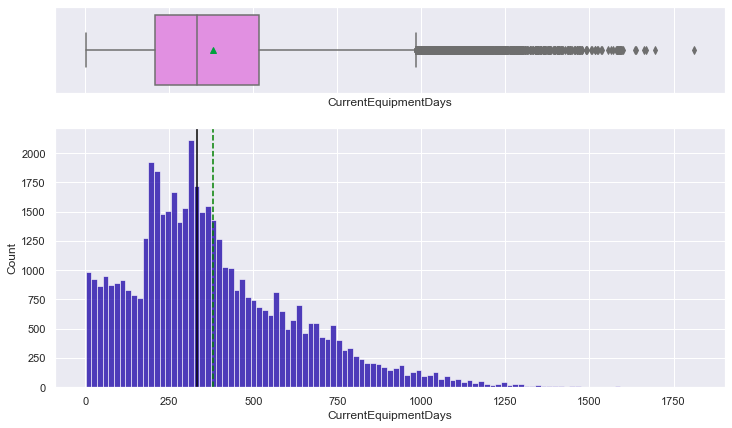

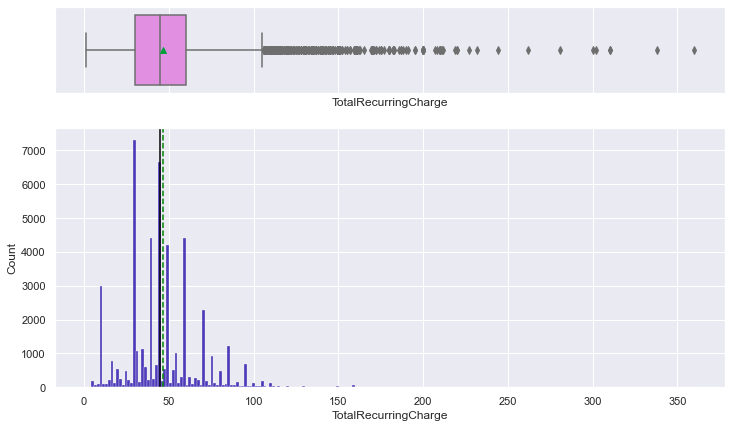

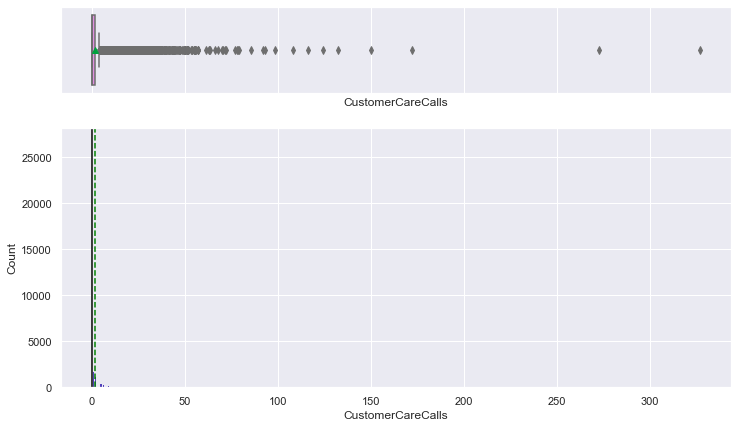

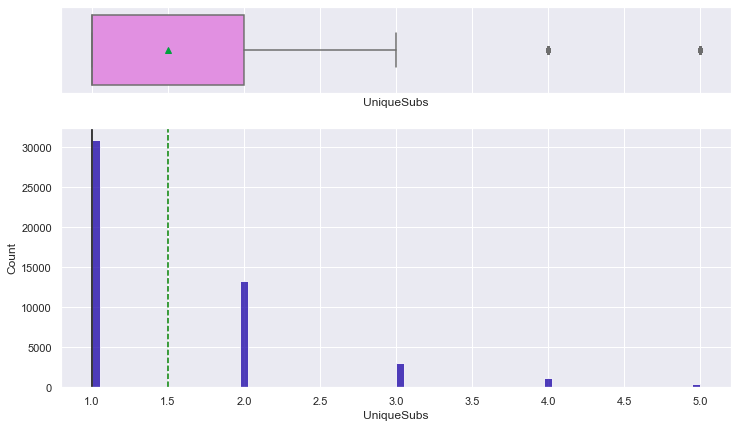

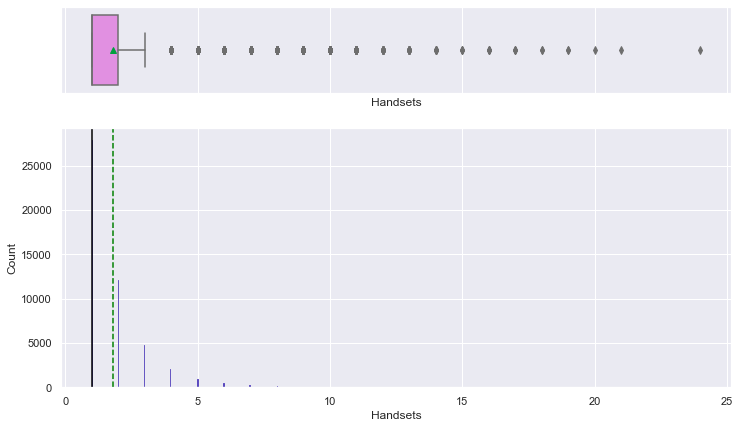

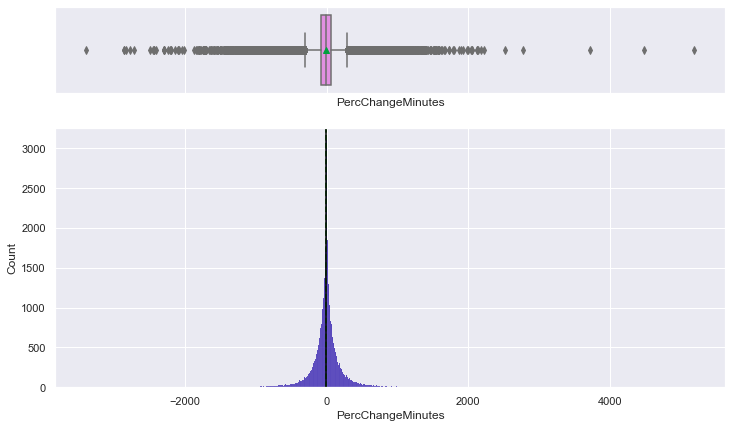

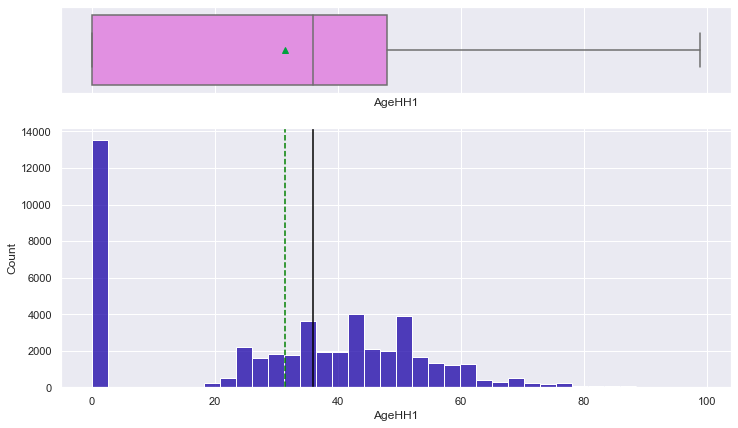

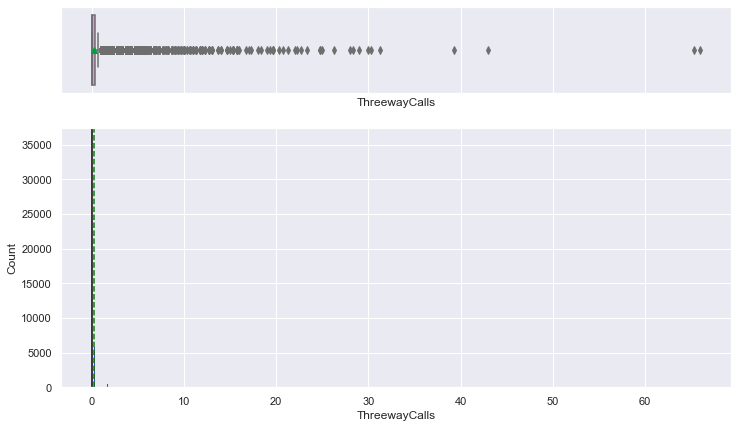

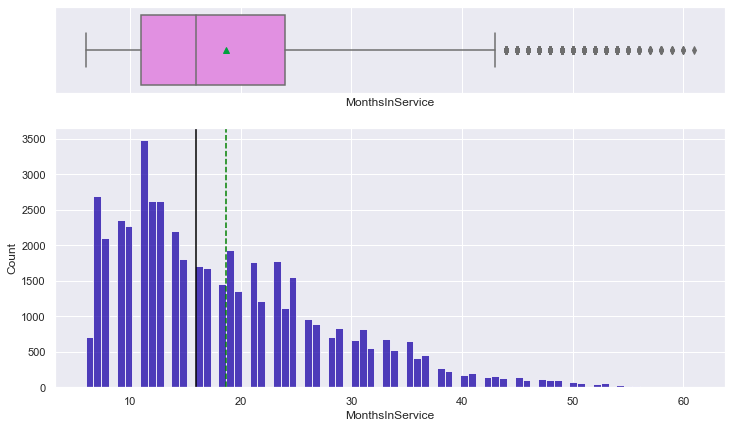

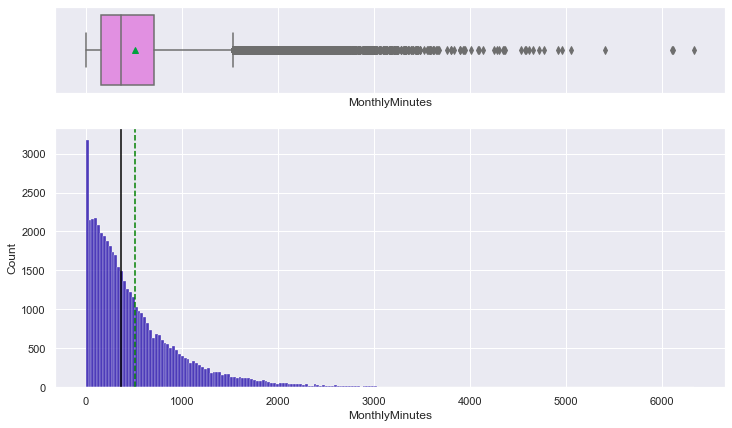

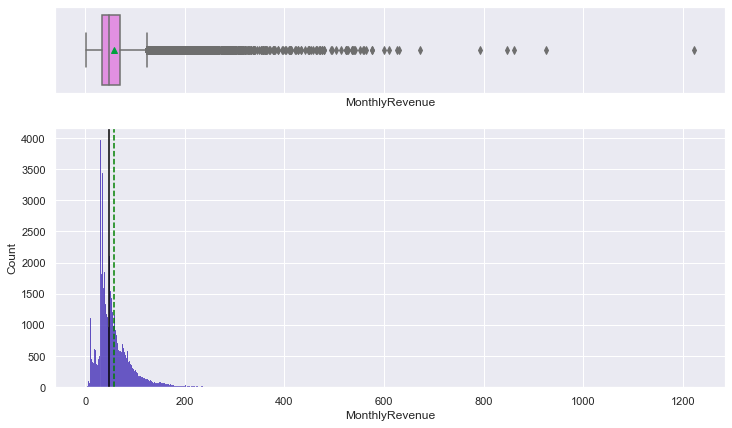

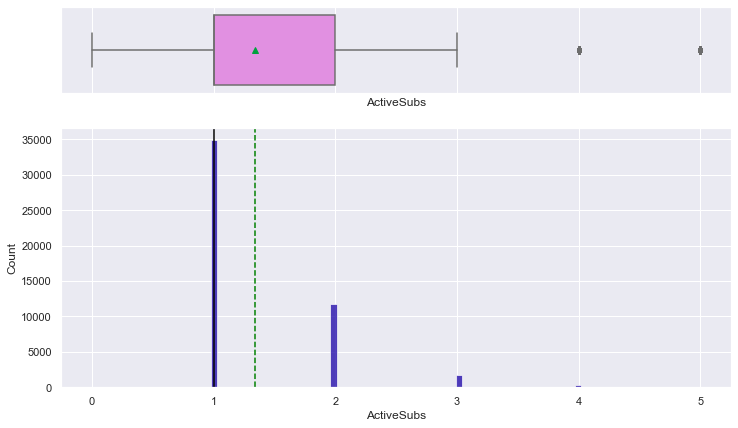

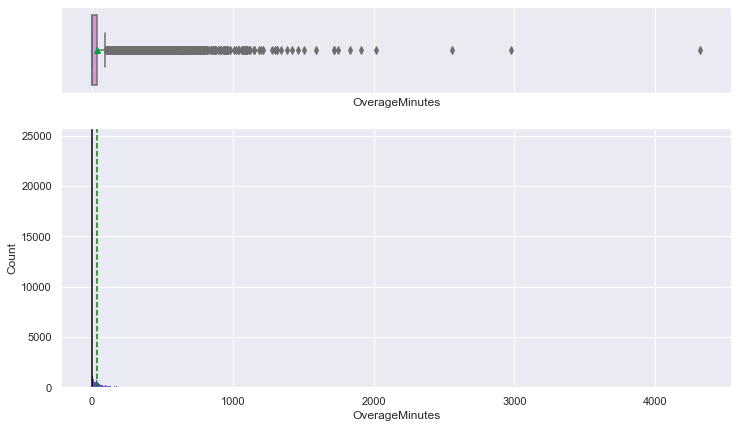

In [70]:
%%time
# selecting numerical columns to plot
num_col = data.select_dtypes(include=np.number).columns.tolist()

for item in num_col:
    histogram_boxplot(data, item)

**Observations**
- CurrentEquipmentDays is right skewed with most being less than the mean of 381 days from equipment activation.
- TotalRecurringCharge distribution appears normally distributed with mean equal to median and some values having high counts.
- CustomerCareCalls is right skewed with calls mostly lasting less than the mean of 1.85 minutes.
- Most customers have 1 unique subscription.
- A vast majority of customers have up to 3 or 4 handsets with over half having just 1 handset.
- PercChangeMinutes is slightly left skewed with mean less than median meaning most customers displayed a % change in minutes utilized more than -11.35%.
- AgeHH1 has a high count of zero values which seems errorneous, it shall be treated by filling median values.
- ThreewayCalls, representing conference calls minutes spent, is right skewed with most being under mean of 0.29 minutes.
- MonthsinService is right skewed with most being less than the mean of 18.65 months.
- MonthlyMinutes is right skewed with most being less than the mean of 514 minutes.
- MonthlyRevenue is right skewed with most under mean of 57.80 USD.
- Most customers have 1 active subscription.
- OverageMinutes is right skewed with most being less than the mean of 38.15 minutes.

In [71]:
data['AgeHH1']=data['AgeHH1'].replace(0,data['AgeHH1'].median()) # Fill in median values to zero values

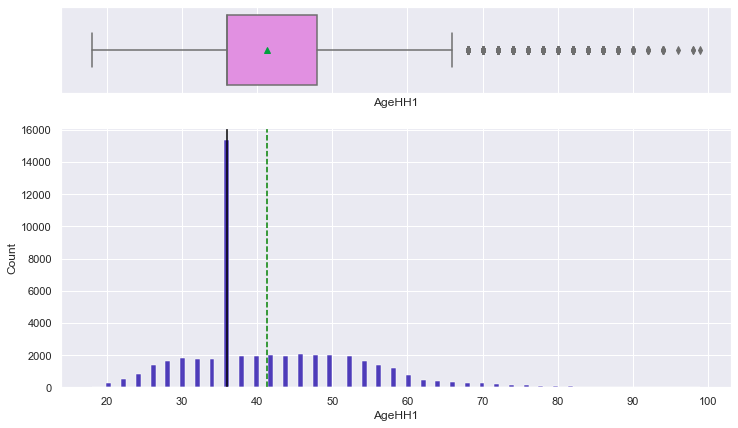

In [72]:
histogram_boxplot(data, 'AgeHH1')

In [73]:
data['AgeHH1'].describe()

count    48854.000000
mean        41.347259
std         11.052212
min         18.000000
25%         36.000000
50%         36.000000
75%         48.000000
max         99.000000
Name: AgeHH1, dtype: float64

**Observations**
- AgeHH1 is right skewed with most under mean of 41.

In [74]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48854 entries, 0 to 51043
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   CurrentEquipmentDays     48854 non-null  float64 
 1   TotalRecurringCharge     48854 non-null  float64 
 2   CustomerCareCalls        48854 non-null  float64 
 3   UniqueSubs               48854 non-null  int64   
 4   Handsets                 48854 non-null  float64 
 5   PercChangeMinutes        48854 non-null  float64 
 6   AgeHH1                   48854 non-null  float64 
 7   ThreewayCalls            48854 non-null  float64 
 8   MonthsInService          48854 non-null  int64   
 9   MonthlyMinutes           48854 non-null  float64 
 10  ServiceArea              48854 non-null  category
 11  CreditRating             48854 non-null  category
 12  HandsetWebCapable        48854 non-null  category
 13  MadeCallToRetentionTeam  48854 non-null  category
 14  Churn 

#### Categorical Analysis

In [75]:
# function to plot a barplot with % values.

def perc_on_bar(feature):
    '''
    plot
    feature: categorical feature
    the function won't work if a column is passed in hue parameter
    '''
    #Creating a countplot for the feature
    sns.set(rc={'figure.figsize':(10,5)})
    ax=sns.countplot(x=feature, data=data)
    
    total = len(feature) # length of the column
    for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_height()/total) # percentage of each class of the category
        x = p.get_x() + p.get_width() / 2 - 0.1 # width of the plot
        y = p.get_y() + p.get_height()           # hieght of the plot
        ax.annotate(percentage, (x, y), size = 14) # annotate the percantage 
    plt.show() # show the plot

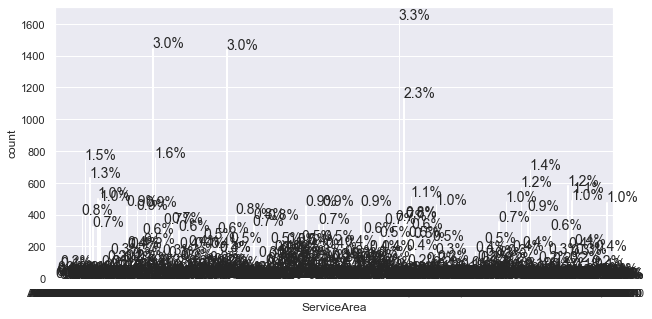

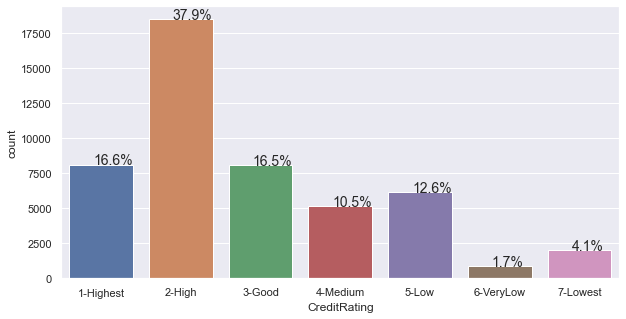

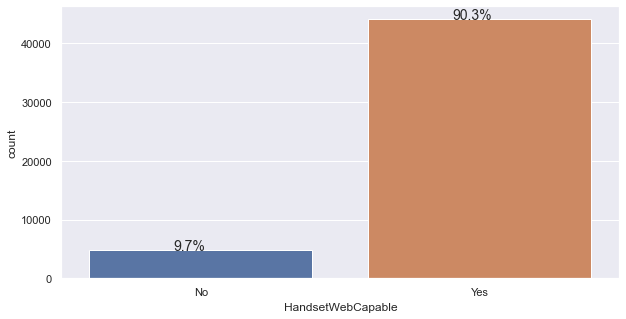

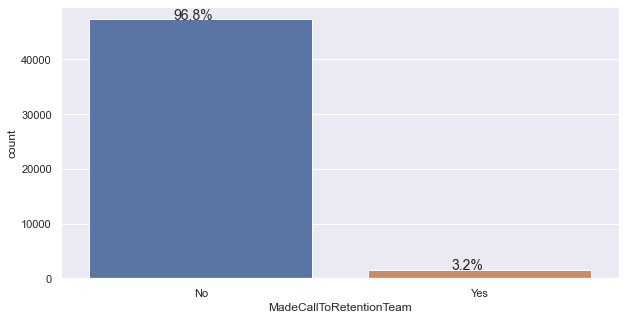

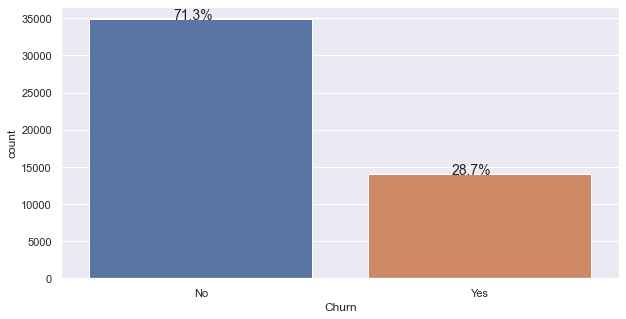

Wall time: 47.5 s


In [76]:
%%time
# selecting categorical columns to plot
cat_col = data.select_dtypes(include="category").columns.tolist()

for item in cat_col:
    perc_on_bar(data[item]) 

**Observations**
- A vast majority of customers have a credit rating of 1 to 4 with over 1/3 indicating a High rating meaning they are largely good credit rating customers.
- 90.3% of customers have a internet connected hand set.
- Almost hardly any customers made calls to retention team at 3.2%.
- 28.7% of customers churned.
- At 747 unique values in Service Area, the feature needs modification to be useful for analysis. 

In [77]:
data['ServiceArea'] = data['ServiceArea'].astype(str) # Convert feature to string for manipulation
print("Number of unique values if we take first character of ServiceArea: ",data['ServiceArea'].str[0:1].nunique()) # Filter out first character in feature values

Number of unique values if we take first character of ServiceArea:  16


In [78]:
data['ServiceArea'] = data['ServiceArea'].str[0:1] # Convert all values to reflect the first charatcer

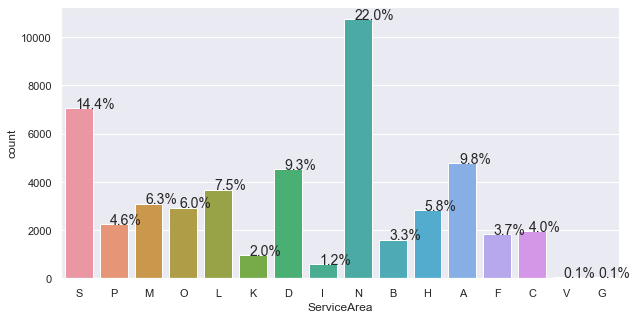

In [79]:
perc_on_bar(data.ServiceArea) # Plot modified ServiceArea feature

**Observations**
- N, S, A and D Service Areas have some of the highest proportion of customers in them in that order.
- These 4 areas covered over half of the customers at 55.5%.

### Bivariate Analysis

Wall time: 5min 5s


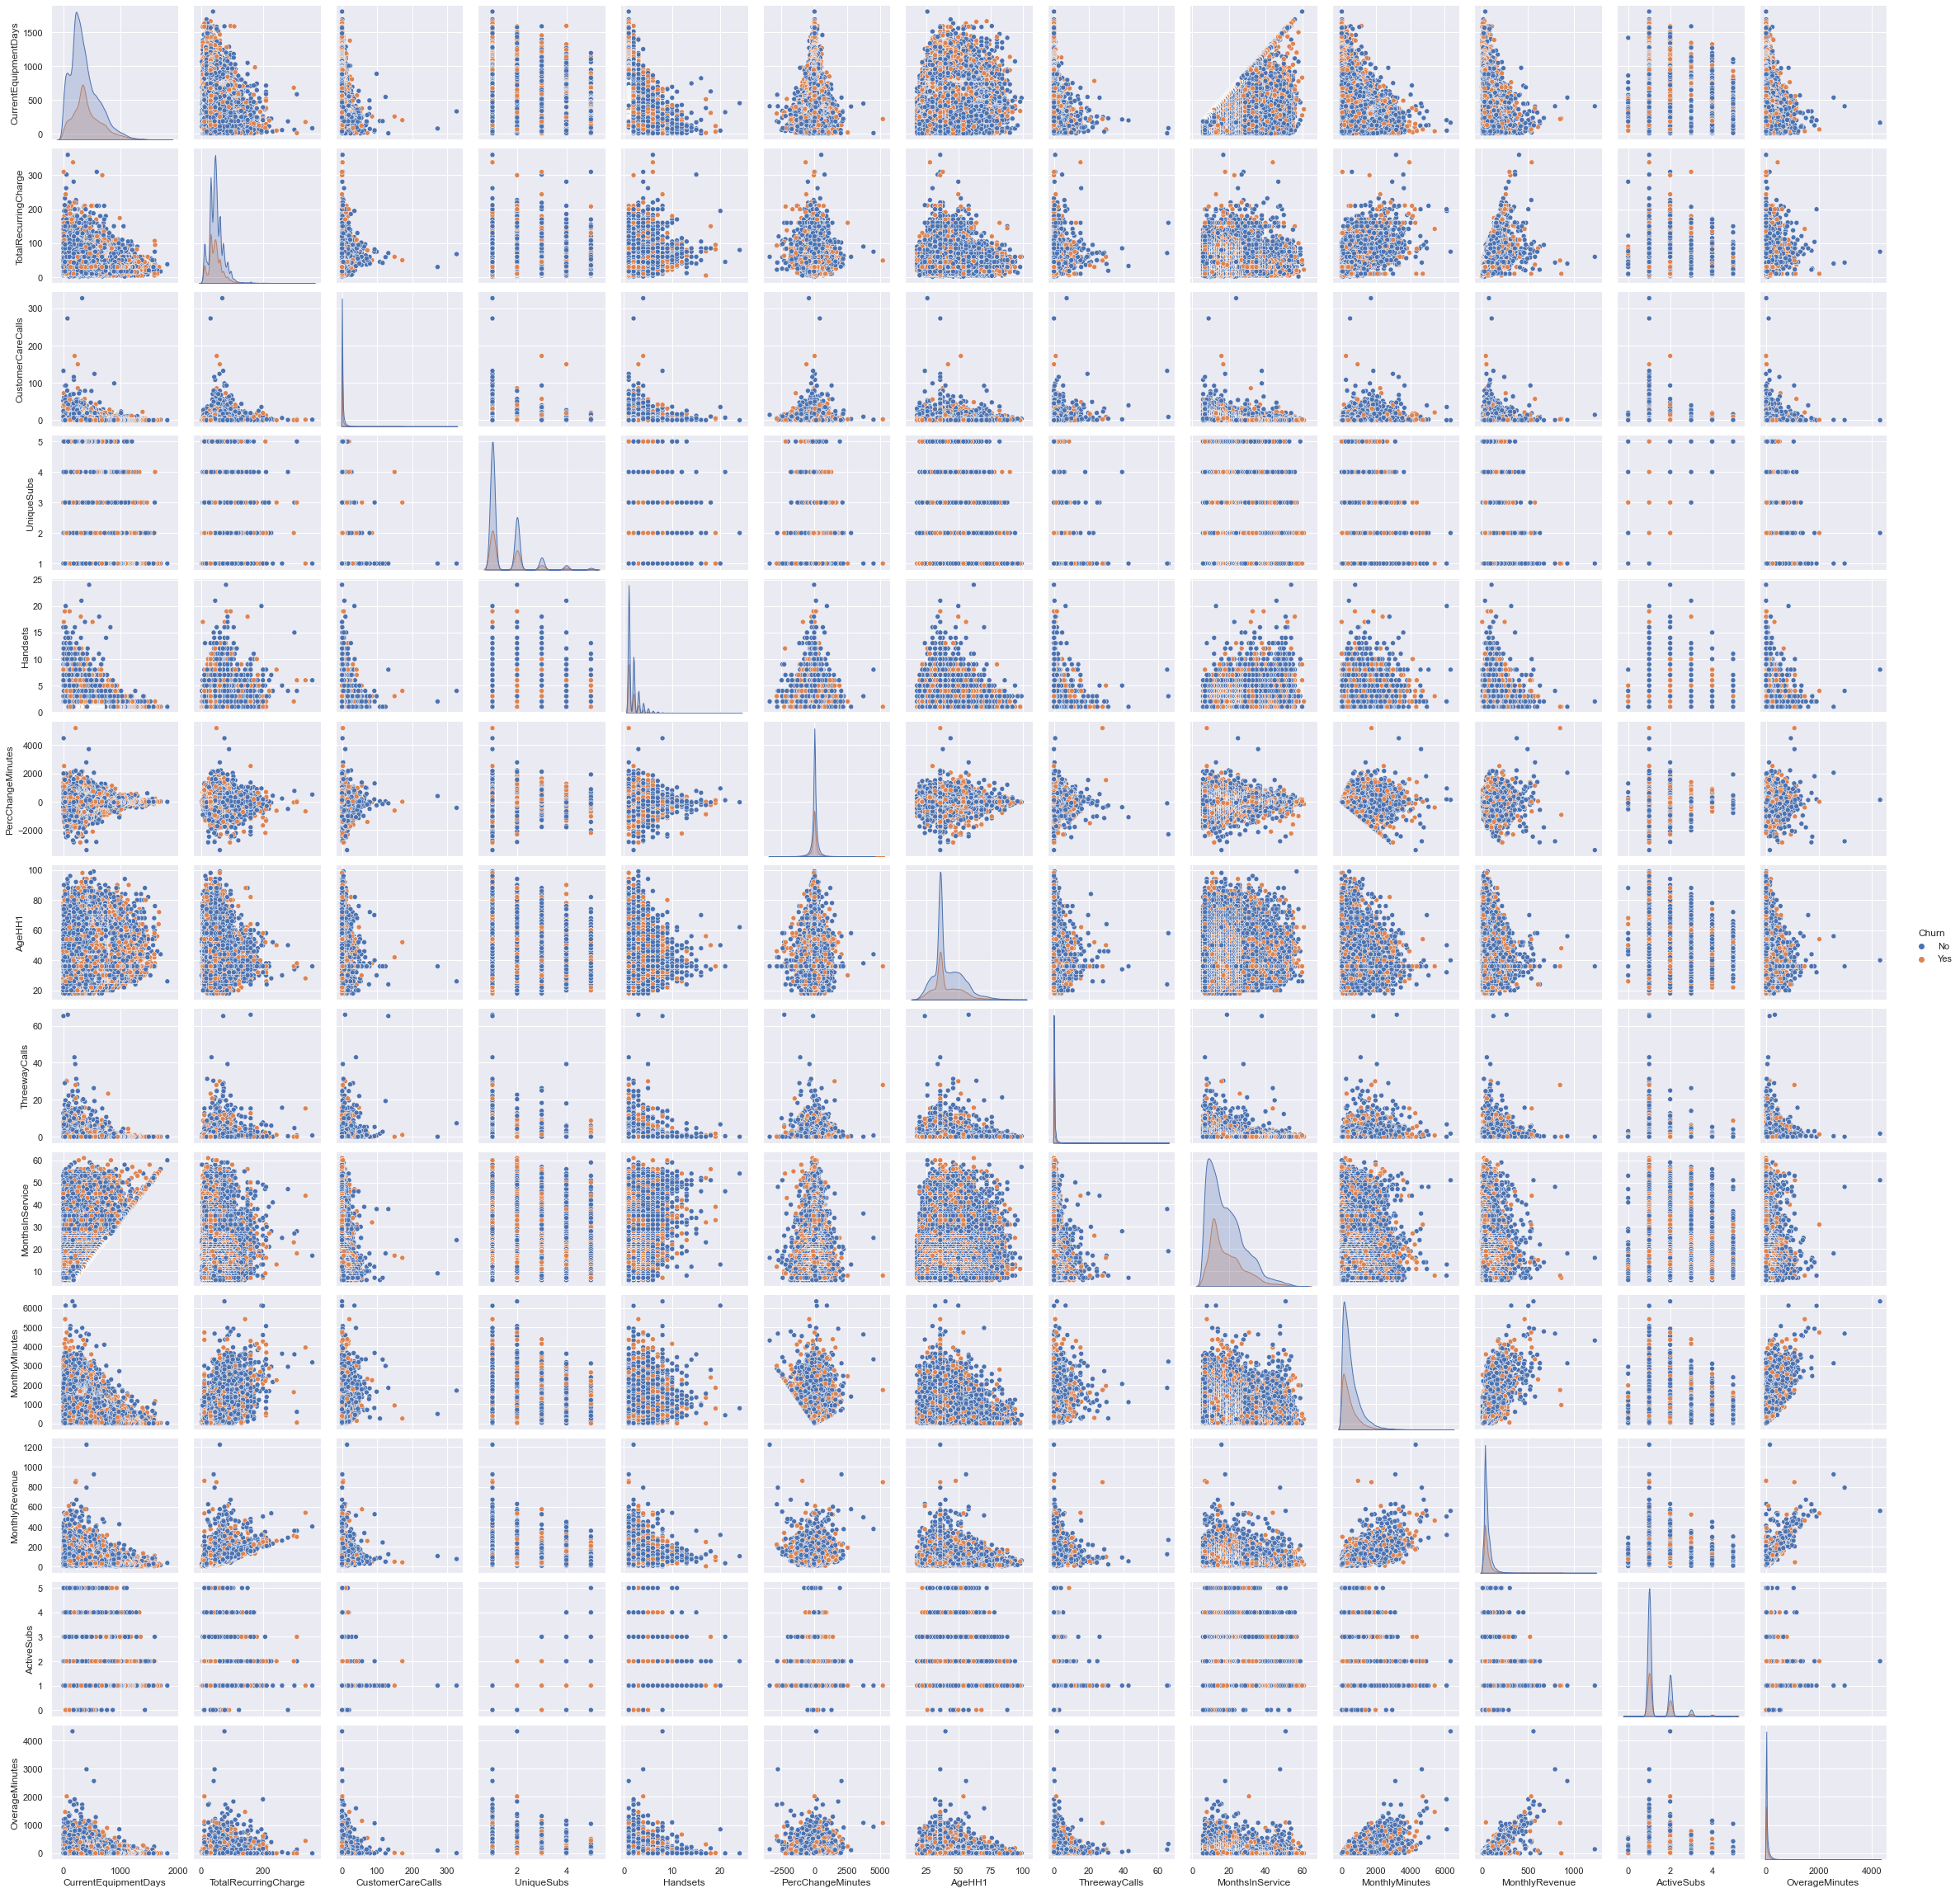

In [80]:
%%time
# Pairplots
sns.pairplot(data=data,hue='Churn')

**Observations**
- There appears just as before a good correlation between 'MonthlyRevenue' and 'OverageMinutes'.
- There does not appear to have distinct patterns where churn or no churn data congregates.

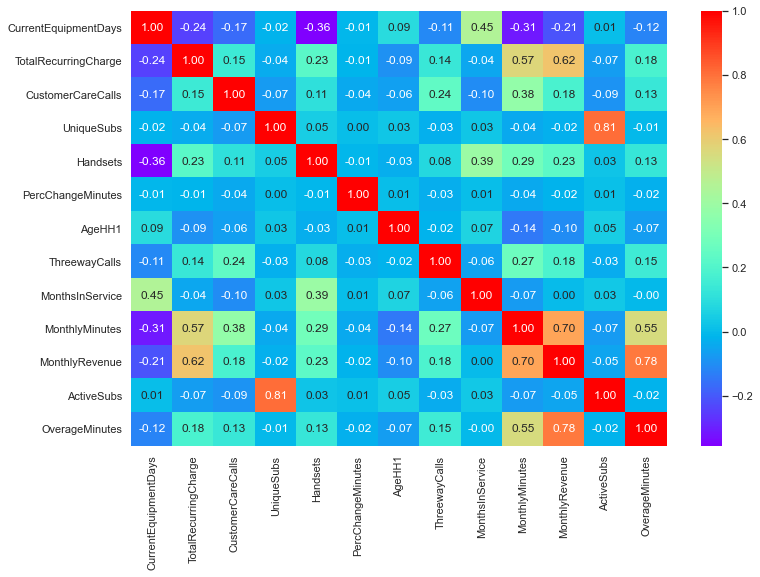

Wall time: 1.84 s


In [81]:
%%time
# HeatMap Call
plt.figure(figsize=(12,8))
sns.heatmap(data.corr(),annot=True,fmt='.2f',cmap='rainbow', )
plt.show()

**Observations**
- ''ActiveSubs and 'UniqueSubs' are closely correlated.
- 'MonthlyRevenue' and 'OverageMinutes' are indeed closely correlated.
- 'MonthlyRevenue' and 'MonthlyMinutes','TotalRecurringCharge' are also fairly closely correlated.
- 'MonthlyMinutes' and 'OverageMinutes','TotalRecurringCharge','MonthlyRevenue' are lightly correlated.

#### Observations on Churn vs Numeric Values

In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48854 entries, 0 to 51043
Data columns (total 18 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   CurrentEquipmentDays     48854 non-null  float64 
 1   TotalRecurringCharge     48854 non-null  float64 
 2   CustomerCareCalls        48854 non-null  float64 
 3   UniqueSubs               48854 non-null  int64   
 4   Handsets                 48854 non-null  float64 
 5   PercChangeMinutes        48854 non-null  float64 
 6   AgeHH1                   48854 non-null  float64 
 7   ThreewayCalls            48854 non-null  float64 
 8   MonthsInService          48854 non-null  int64   
 9   MonthlyMinutes           48854 non-null  float64 
 10  ServiceArea              48854 non-null  object  
 11  CreditRating             48854 non-null  category
 12  HandsetWebCapable        48854 non-null  category
 13  MadeCallToRetentionTeam  48854 non-null  category
 14  Churn 

In [83]:
data['ServiceArea']=data['ServiceArea'].astype('category') # Change 'ServiceArea' data type to category

['CurrentEquipmentDays',
 'TotalRecurringCharge',
 'CustomerCareCalls',
 'UniqueSubs',
 'Handsets',
 'PercChangeMinutes',
 'AgeHH1',
 'ThreewayCalls',
 'MonthsInService',
 'MonthlyMinutes',
 'MonthlyRevenue',
 'ActiveSubs',
 'OverageMinutes']

<Figure size 1296x1296 with 0 Axes>

<AxesSubplot:>

<AxesSubplot:xlabel='Churn', ylabel='CurrentEquipmentDays'>

Text(0.5, 1.0, 'CurrentEquipmentDays')

<AxesSubplot:>

<AxesSubplot:xlabel='Churn', ylabel='TotalRecurringCharge'>

Text(0.5, 1.0, 'TotalRecurringCharge')

<AxesSubplot:>

<AxesSubplot:xlabel='Churn', ylabel='CustomerCareCalls'>

Text(0.5, 1.0, 'CustomerCareCalls')

<AxesSubplot:>

<AxesSubplot:xlabel='Churn', ylabel='UniqueSubs'>

Text(0.5, 1.0, 'UniqueSubs')

<AxesSubplot:>

<AxesSubplot:xlabel='Churn', ylabel='Handsets'>

Text(0.5, 1.0, 'Handsets')

<AxesSubplot:>

<AxesSubplot:xlabel='Churn', ylabel='PercChangeMinutes'>

Text(0.5, 1.0, 'PercChangeMinutes')

<AxesSubplot:>

<AxesSubplot:xlabel='Churn', ylabel='AgeHH1'>

Text(0.5, 1.0, 'AgeHH1')

<AxesSubplot:>

<AxesSubplot:xlabel='Churn', ylabel='ThreewayCalls'>

Text(0.5, 1.0, 'ThreewayCalls')

<AxesSubplot:>

<AxesSubplot:xlabel='Churn', ylabel='MonthsInService'>

Text(0.5, 1.0, 'MonthsInService')

<AxesSubplot:>

<AxesSubplot:xlabel='Churn', ylabel='MonthlyMinutes'>

Text(0.5, 1.0, 'MonthlyMinutes')

<AxesSubplot:>

<AxesSubplot:xlabel='Churn', ylabel='MonthlyRevenue'>

Text(0.5, 1.0, 'MonthlyRevenue')

<AxesSubplot:>

<AxesSubplot:xlabel='Churn', ylabel='ActiveSubs'>

Text(0.5, 1.0, 'ActiveSubs')

<AxesSubplot:>

<AxesSubplot:xlabel='Churn', ylabel='OverageMinutes'>

Text(0.5, 1.0, 'OverageMinutes')

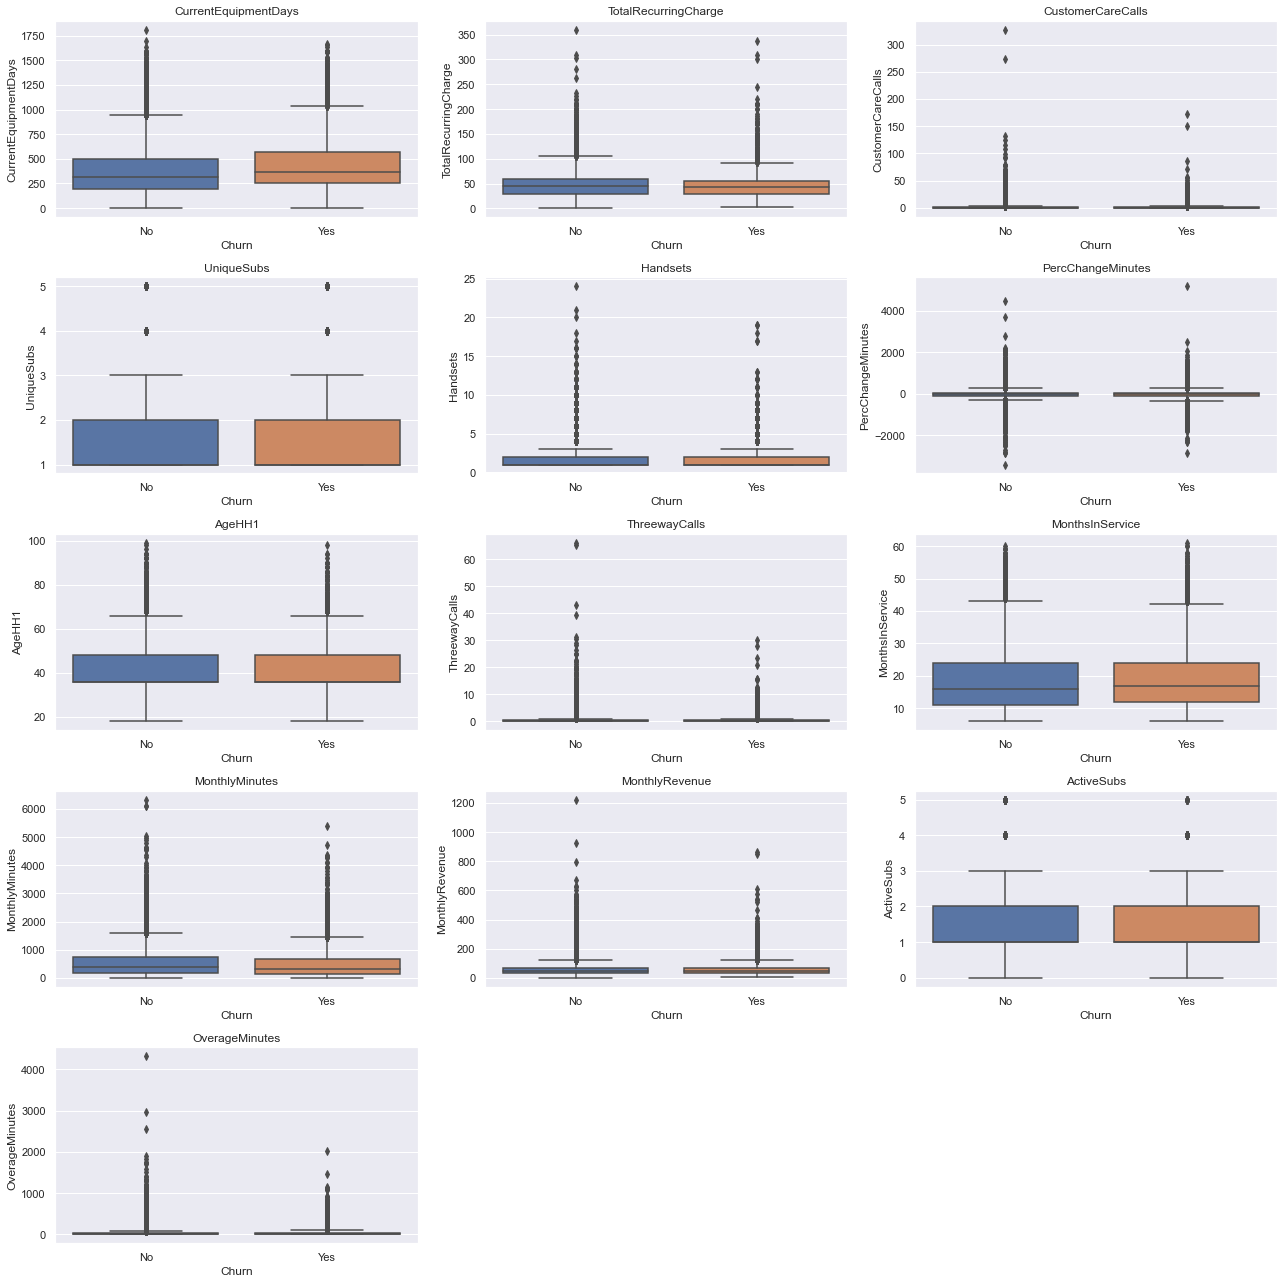

In [84]:
# Plot all numerical features against Churn variable

cols = data.select_dtypes(np.number).columns.tolist()
cols

plt.figure(figsize=(18,18))

for i, variable in enumerate(cols):
                     plt.subplot(5,3,i+1)
                     sns.boxplot(data["Churn"],data[variable])#,palette="PuBu")
                     plt.tight_layout()
                     plt.title(variable)
plt.show()

**Observations**
- There is no appreciable difference between churned and non churned customer profiles for any feature except 'CurrentEquipmentDays'.
- Customers with handsets activated for a longer time tended to churn.

In [85]:
### Function to plot stacked bar charts for categorical columns
def stacked_plot(x,flag=True):
    sns.set(palette='nipy_spectral')
    tab1 = pd.crosstab(x,data['Churn'],margins=True)
    if flag==True:
        print(tab1)
        print('-'*120)
    tab = pd.crosstab(x,data['Churn'],normalize='index')
    tab.plot(kind='bar',stacked=True,figsize=(10,5))
    plt.legend(loc='lower left', frameon=False)
    plt.legend(loc="upper left", bbox_to_anchor=(1,1))
    plt.show()

#### Observations on Churn vs Handsets 

Churn        No    Yes    All
Handsets                     
1.0       19489   8370  27859
2.0        8845   3277  12122
3.0        3465   1335   4800
4.0        1541    543   2084
5.0         726    228    954
6.0         344    106    450
7.0         209     65    274
8.0          92     34    126
9.0          53     19     72
10.0         26      6     32
11.0         23      5     28
12.0         11      5     16
13.0         12      2     14
14.0          6      0      6
15.0          3      0      3
16.0          4      0      4
17.0          1      2      3
18.0          1      1      2
19.0          0      2      2
20.0          1      0      1
21.0          1      0      1
24.0          1      0      1
All       34854  14000  48854
------------------------------------------------------------------------------------------------------------------------


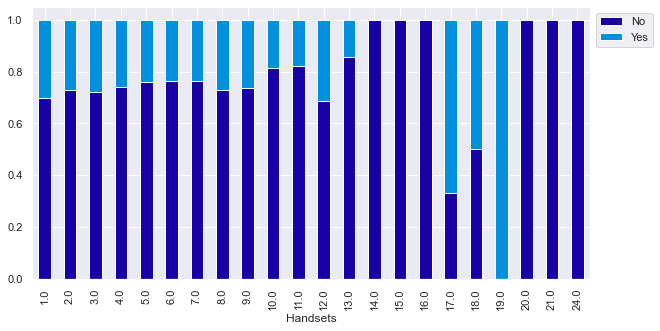

In [86]:
stacked_plot(data.Handsets)

**Observations**
- Customers with 12, 17, 18, 19 handsets have appreciable tendency to churn. However, their numbers are very low to be negligible to make any significant conclusion. 

#### Observations on Churn vs ServiceArea 

Churn           No    Yes    All
ServiceArea                     
A             3486   1292   4778
B             1103    494   1597
C             1357    596   1953
D             3242   1281   4523
F             1256    575   1831
G               24     11     35
H             2053    780   2833
I              403    175    578
K              727    240    967
L             2621   1056   3677
M             2166    930   3096
N             7706   3025  10731
O             2127    802   2929
P             1569    680   2249
S             4990   2051   7041
V               24     12     36
All          34854  14000  48854
------------------------------------------------------------------------------------------------------------------------


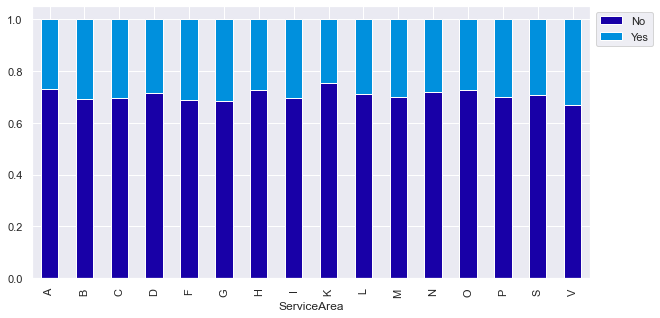

In [87]:
stacked_plot(data.ServiceArea)

**Observations**
- No Service Areas have a significant different churn rate from the other Service Areas.

#### Observations on Churn vs CreditRating

Churn            No    Yes    All
CreditRating                     
1-Highest      5613   2503   8116
2-High        12956   5549  18505
3-Good         5584   2482   8066
4-Medium       3809   1325   5134
5-Low          4833   1340   6173
6-VeryLow       619    221    840
7-Lowest       1440    580   2020
All           34854  14000  48854
------------------------------------------------------------------------------------------------------------------------


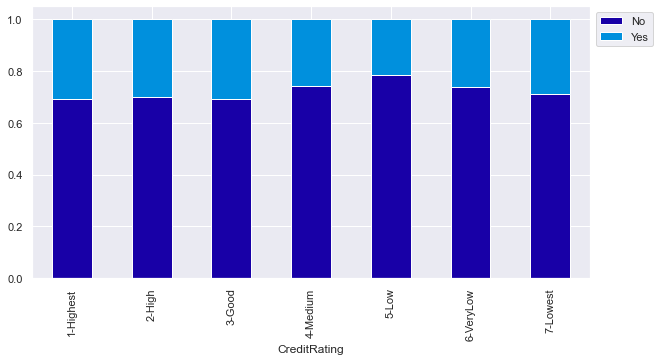

In [88]:
stacked_plot(data.CreditRating)

**Observations**
- Credit Rating does not appear to have any appreciable impact on churn rate.
- Only at ratings of 4 to 5 does churn rate seems a little less.

#### Observations on Churn vs HandsetWebCapable

Churn                 No    Yes    All
HandsetWebCapable                     
No                  2977   1774   4751
Yes                31877  12226  44103
All                34854  14000  48854
------------------------------------------------------------------------------------------------------------------------


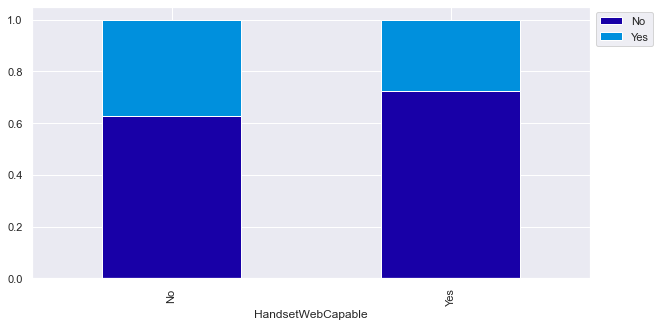

In [89]:
stacked_plot(data.HandsetWebCapable)

**Observations**
- There appears to be a significant churn rate difference of 10% points between customers with web-capable handsets and non web-capable handsets.
- Customers with non web-capable handsets churn at 40% rate, 10% more on average than those with web-capable handsets. 

#### Observations on Churn vs MadeCallToRetentionTeam

Churn                       No    Yes    All
MadeCallToRetentionTeam                     
No                       33961  13315  47276
Yes                        893    685   1578
All                      34854  14000  48854
------------------------------------------------------------------------------------------------------------------------


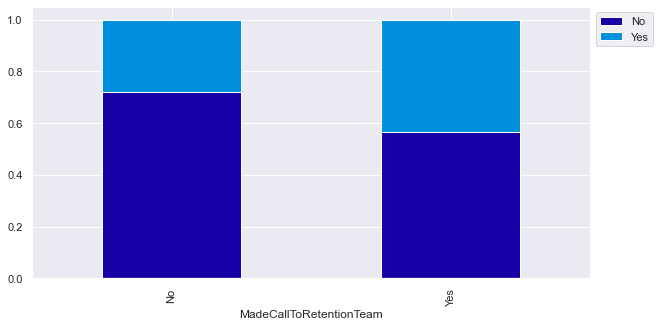

In [90]:
stacked_plot(data.MadeCallToRetentionTeam)

**Observations**
- The customers who made calls to the retention team are about ~10% points more likely to churn.

**Insights**
- Customers with handsets that are activated for a longer period, non-web capable handsets and have made calls to the retention team are more likely to churn.
- Efforts can be made to retain these customers through recommending them newer web capable handsets about a year into their current handset activation and their pain points to be recorded and analyzed during their engagement sessions with the retention team to generate retention strategies around these customers.

## Q3. Create additional features to help predict churn

In [91]:
data["MonthlyMinutes"].replace(0, 1, inplace=True)  # Replace 0s with a small number so as not to get 
                                                    # invalid numbers from calc below

In [92]:
#wrapper function to create additional features for churn prediction
def create_features(data):
    
    #3.1 Percent of current active subs over total subs
    data['perc_active_subs'] = data['ActiveSubs'] / data['UniqueSubs']
    
    #3.2 Percent of recurrent charge to monthly charge
    #type your code here to create a new column in cust_df
    data['perc_recurrent_charge'] = data['TotalRecurringCharge'] / data['MonthlyRevenue']
    
    #3.3 Percent of overage minutes over total monthly minutes
    #type your code here to create a new column in cust_df
    data['perc_overage_minutes'] = data['OverageMinutes'] / data['MonthlyMinutes']
    
    #type your code here to creat any other additional features which you think will help improve your model accuracy
    
    
    return data  


In [93]:
#Make a call to the feature engineering wrapper function for churn prediction
data=create_features(data)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48854 entries, 0 to 51043
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   CurrentEquipmentDays     48854 non-null  float64 
 1   TotalRecurringCharge     48854 non-null  float64 
 2   CustomerCareCalls        48854 non-null  float64 
 3   UniqueSubs               48854 non-null  int64   
 4   Handsets                 48854 non-null  float64 
 5   PercChangeMinutes        48854 non-null  float64 
 6   AgeHH1                   48854 non-null  float64 
 7   ThreewayCalls            48854 non-null  float64 
 8   MonthsInService          48854 non-null  int64   
 9   MonthlyMinutes           48854 non-null  float64 
 10  ServiceArea              48854 non-null  category
 11  CreditRating             48854 non-null  category
 12  HandsetWebCapable        48854 non-null  category
 13  MadeCallToRetentionTeam  48854 non-null  category
 14  Churn 

## Q4. Build classification model to predict customer churn month in advance

### Initial data processing for model building exercise

In [94]:
# Churn flag requires covverting to 1s and 0s for ML to work

# Stripping empty string values
data["Churn"] = data["Churn"].str.strip()

# Correcting Attrition_Flag variable values
data["Churn"].replace("No", 0, inplace=True) # '0' flag for existing customer
data["Churn"].replace("Yes", 1, inplace=True) # '1' flag for attrited customer

# Attrition_Flag variable values corrected
print(data["Churn"].value_counts())

0    34854
1    14000
Name: Churn, dtype: int64


In [95]:
#Train - test split to train and test model accuracy
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Define columns to be included in X and y
Y = data["Churn"]
X = data.drop("Churn" , axis=1)

# creating dummy variables
X = pd.get_dummies(X, drop_first=True)

# splitting in training and test set
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 42, stratify=Y)
# stratify=Y maintains the ratio of churn vs non churn in the target variable for both training and testing sets)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) <--Starter code original

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

#Create dummy variables for all categorical variables <--Starter code original
#X = pd.get_dummies(X) <--Starter code original

(34197, 39) (14657, 39) (34197,) (14657,)


In [96]:
Y.value_counts(1) # test the ratio of 1s to 0s

0    0.713432
1    0.286568
Name: Churn, dtype: float64

In [97]:
y_train.value_counts(1) # test the ratio of 1s to 0s

0    0.713425
1    0.286575
Name: Churn, dtype: float64

In [98]:
y_test.value_counts(1) # test the ratio of 1s to 0s

0    0.713447
1    0.286553
Name: Churn, dtype: float64

In [99]:
# Libraries to tune model, get different metric scores
from sklearn import metrics
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

from sklearn.pipeline import Pipeline, make_pipeline

#libraries to help with model building
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [100]:
## Function to create confusion matrix
def make_confusion_matrix(model,y_actual,labels=[1, 0]):
    '''
    model : classifier to predict values of X
    y_actual : ground truth  
    
    '''
    y_predict = model.predict(X_test)
    cm=metrics.confusion_matrix( y_actual, y_predict, labels=[0, 1])
    df_cm = pd.DataFrame(cm, index = [i for i in ["Actual - No","Actual - Yes"]],
                  columns = [i for i in ['Predicted - No','Predicted - Yes']])
    group_counts = ["{0:0.0f}".format(value) for value in
                cm.flatten()]
    group_percentages = ["{0:.2%}".format(value) for value in
                         cm.flatten()/np.sum(cm)]
    labels = [f"{v1}\n{v2}" for v1, v2 in
              zip(group_counts,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    plt.figure(figsize = (10,7))
    sns.heatmap(df_cm, annot=labels,fmt='')
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [101]:
##  Function to calculate different metric scores of the model - Accuracy, Recall and Precision
def get_metrics_score(model,flag=True):
    '''
    model : classifier to predict values of X

    '''
    # defining an empty list to store train and test results
    score_list=[] 
    
    #Predicting on train and tests
    pred_train = model.predict(X_train)
    pred_test = model.predict(X_test)
    
    #Accuracy of the model
    train_acc = model.score(X_train,y_train)
    test_acc = model.score(X_test,y_test)
    
    #Recall of the model
    train_recall = metrics.recall_score(y_train,pred_train)
    test_recall = metrics.recall_score(y_test,pred_test)
    
    #Precision of the model
    train_precision = metrics.precision_score(y_train,pred_train)
    test_precision = metrics.precision_score(y_test,pred_test)
    
    #F1 of the model
    train_f1 = metrics.f1_score(y_train,pred_train)
    test_f1 = metrics.f1_score(y_test,pred_test)
    
#     score_list.extend((train_acc,test_acc,train_recall,test_recall,train_precision,test_precision, train_f1, test_f1))
        
    # If the flag is set to True then only the following print statements will be dispayed. The default value is set to True.
    if flag == True: 
        print("Accuracy on training set : ",model.score(X_train,y_train))
        print("Accuracy on test set : ",model.score(X_test,y_test))
        print("Recall on training set : ",metrics.recall_score(y_train,pred_train))
        print("Recall on test set : ",metrics.recall_score(y_test,pred_test))
        print("Precision on training set : ",metrics.precision_score(y_train,pred_train))
        print("Precision on test set : ",metrics.precision_score(y_test,pred_test))
        print("f1 score on training set : ",metrics.f1_score(y_train,pred_train))
        print("f1 score on test set : ",metrics.f1_score(y_test,pred_test))
        #print('f1 score on train data:',f1_score(y_train, pred_train))
        #print('f1 score on test data:',f1_score(y_test, pred_test))
    
    return score_list # returning the list with train and test scores

### Q4.1 Build a simple logistic regression model to predict churn and evaluate model accuracy on test data set

#### Note
A pipeline is used to encompass scaling the training data input and building the model to fit. Regularization is applied to improve the model fit. The Grid Search is optimized to find best parameters to maximize the recall score which minimizes False Negative predictions.

In [102]:
%%time
#-------------------------------- Model training -------------------------------#

#type your code to build logistic regression model on training data set


# Creating pipeline
# lr_pipe = make_pipeline(StandardScaler(), LogisticRegression(class_weight={0:0.29,1:0.71},random_state=1,solver='saga'))
lr_pipe = make_pipeline(StandardScaler(), LogisticRegression(random_state=1,solver='saga'))

# # Grid of parameters to choose from (Regularization)
parameters = {'C': np.arange(0.5,10,0.5)}

# # Run the grid search
grid_obj = GridSearchCV(lr_pipe['logisticregression'], parameters, scoring='recall')
grid_obj = grid_obj.fit(X_train,y_train)

# # Set the clf to the best combination of parameters
lr_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
lr_estimator.fit(X_train,y_train)


Wall time: 3min 21s


LogisticRegression(C=0.5, random_state=1, solver='saga')

In [103]:
# print("The Logistic Regression Intercept is:\n" , lr_pipe['logisticregression'].intercept_)
# print("The Logistic Regression Coefficients are:\n" , lr_pipe['logisticregression'].coef_)

print("The Logistic Regression Intercept is:\n" , lr_estimator.intercept_)
print("The Logistic Regression Coefficients are:\n" , lr_estimator.coef_)

The Logistic Regression Intercept is:
 [-0.00086778]
The Logistic Regression Coefficients are:
 [[ 8.40765281e-04 -7.36416990e-03 -4.86638568e-03 -5.09630526e-05
   8.14621722e-06 -2.56424286e-04 -1.77143514e-02 -5.75537925e-04
  -9.28481605e-03 -2.40266611e-04  2.18249315e-03 -1.14621139e-03
   6.17588351e-04 -1.24690078e-03 -1.07407742e-03  5.22308750e-05
   5.26690287e-05  5.03750679e-05 -9.54308432e-05  1.34242992e-04
  -5.43595207e-06 -1.77978941e-04  7.05064754e-06 -8.46680911e-05
  -6.39733472e-05  7.18251896e-05 -2.43099551e-04 -1.51614240e-04
  -3.16311908e-05 -2.56427957e-05  3.89499298e-07  3.26389482e-05
   1.82833203e-04 -3.24150968e-04 -8.90417087e-04 -4.78779799e-05
   1.05256473e-05 -1.20786675e-03  5.02462983e-04]]


In [104]:
# probabilities = lr_pipe['logisticregression'].predict_proba(X_test)
probabilities = lr_estimator.predict_proba(X_test)
print(probabilities[:15,:])

[[0.69640083 0.30359917]
 [0.67706163 0.32293837]
 [0.71208365 0.28791635]
 [0.72081396 0.27918604]
 [0.71113523 0.28886477]
 [0.73221929 0.26778071]
 [0.67385256 0.32614744]
 [0.74888479 0.25111521]
 [0.54218082 0.45781918]
 [0.62015738 0.37984262]
 [0.66860849 0.33139151]
 [0.7582011  0.2417989 ]
 [0.7808009  0.2191991 ]
 [0.69290392 0.30709608]
 [0.64570722 0.35429278]]


**Observations**
- The first column is the probability of a score of $0$ = 'Churn' = "No" and the second column is the probability of a score of $1$ = 'Churn' = "Yes". Notice that for most, but not all cases, the probability of a score of $0$ is higher than $1$.

### Score and evaluate the classification model

In [105]:
#-------------------------------- Model testing ---------------------------------#

#type your code here to predict for X_test data set using the fitted model
#Use a probability threshold to classify customers as churners and non churners (Default = 0.5)
#Evaluate model accuracy using fitted y value and actual y_test
#Evaluation metrics to be used - GINI, Precision, Recall, confusion matrix

In [106]:
#Use a probability threshold to classify customers as churners and non churners (Default = 0.5)
def score_model(probs, threshold):
    return np.array([1 if x > threshold else 0 for x in probs[:,1]])
scores = score_model(probabilities, 0.5)

Accuracy on training set :  0.7124893996549405
Accuracy on test set :  0.7133110459166269
Recall on training set :  0.0029591836734693877
Recall on test set :  0.002619047619047619
Precision on training set :  0.32222222222222224
Precision on test set :  0.4583333333333333
f1 score on training set :  0.0058645096056622855
f1 score on test set :  0.005208333333333333


[]

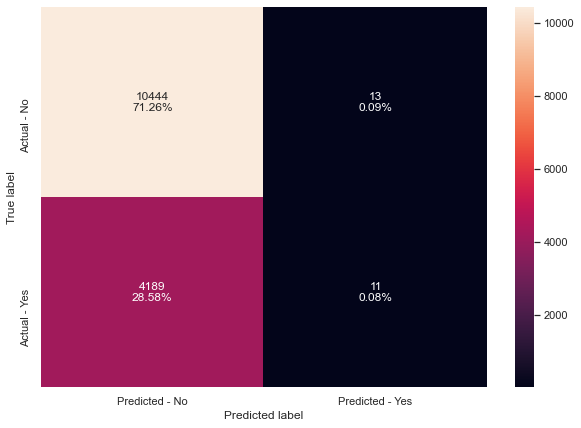

In [107]:
#Evaluate model accuracy using fitted y value and actual y_test

# Calculating different metrics
get_metrics_score(lr_estimator)

# Creating confusion matrix
make_confusion_matrix(lr_estimator, y_test)

**Observations**
- It can be observed here for **Accuracy** Score that the model is a good fit for both train and test data at ~71%
- However, our use case is to reduce churn and it is imperative to reduce False Negatives where model predicts a no churn while there is an actual churn.
- For this model here, the False Negatives are rather high at 4189.
- The **Recall** Score meant for reducing False Negatives is also very poor at ~ 0.3%. The same can be said about the **Precision** Score at only 45.8%. 
- **F1-Score** meant for imbalanced target variable value counts and a balance between Precision and Recall Scores is also very low.
- The closeness of train and test scores showed there is no overfitting in the model, however the poor scores indicate certainly underfitting of the model.

In [108]:
import sklearn.metrics as sklm
def print_metrics(labels, scores):
    metrics = sklm.precision_recall_fscore_support(labels, scores,zero_division=0)
    conf = sklm.confusion_matrix(labels, scores)
    print('                 Confusion matrix')
    print('                 Score positive    Score negative')
    print('Actual positive    %6d' % conf[0,0] + '             %5d' % conf[0,1])
    print('Actual negative    %6d' % conf[1,0] + '             %5d' % conf[1,1])
    print('')
    print('Accuracy  %0.2f' % sklm.accuracy_score(labels, scores))
    print(' ')
    print('           Positive      Negative')
    print('Num case   %6d' % metrics[3][0] + '        %6d' % metrics[3][1])
    print('Precision  %6.2f' % metrics[0][0] + '        %6.2f' % metrics[0][1])
    print('Recall     %6.2f' % metrics[1][0] + '        %6.2f' % metrics[1][1])
    print('F1         %6.2f' % metrics[2][0] + '        %6.2f' % metrics[2][1])


    
print_metrics(y_test, scores) 

                 Confusion matrix
                 Score positive    Score negative
Actual positive     10444                13
Actual negative      4189                11

Accuracy  0.71
 
           Positive      Negative
Num case    10457          4200
Precision    0.71          0.46
Recall       1.00          0.00
F1           0.83          0.01


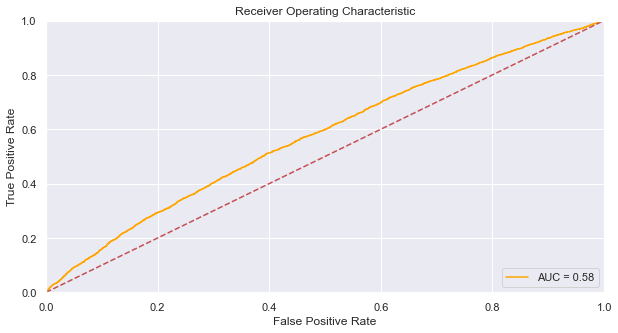

Gini Score: 0.152


In [109]:
def plot_auc(labels, probs):
    ## Compute the false positive rate, true positive rate
    ## and threshold along with the AUC
    fpr, tpr, threshold = sklm.roc_curve(labels, probs[:,1])
    auc = sklm.auc(fpr, tpr)
    
    ## Plot the result
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, color = 'orange', label = 'AUC = %0.2f' % auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    Gini = 2*auc - 1 # GINI Score Calculation
    print ("Gini Score:", round(Gini,3))
    
plot_auc(y_test, probabilities)

**Observations**
- The **GINI** Score is 0.152 which makes it barely better then a naive 'classifier' model at AUC 0.5.

#### Note
One point of comparison is a naive 'classifier' that sets all cases to positive. The code in the cell below contains such a classifier. This algorithm is not really a classifier at all. This 'classifier' is hard coded. The ROC curve and AUC are then computed and displayed.

                 Confusion matrix
                 Score positive    Score negative
Actual positive     10457                 0
Actual negative      4200                 0

Accuracy  0.71
 
           Positive      Negative
Num case    10457          4200
Precision    0.71          0.00
Recall       1.00          0.00
F1           0.83          0.00


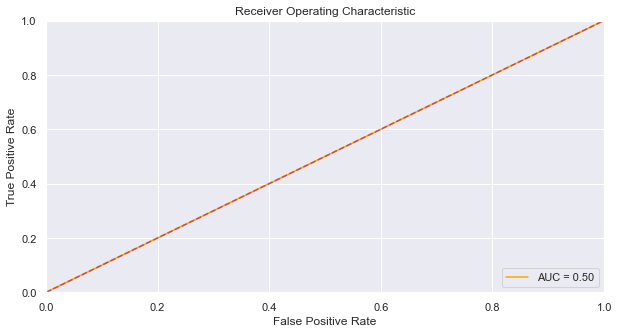

Gini Score: 0.0


In [110]:
probs_positive = np.concatenate((np.ones((probabilities.shape[0], 1)), 
                                 np.zeros((probabilities.shape[0], 1))),
                                 axis = 1)
scores_positive = score_model(probs_positive, 0.5)
print_metrics(y_test, scores_positive)  
plot_auc(y_test, probs_positive) 

#### Note
The **Accuracy** from this 'classifier' is 0.71. This reflects the class imbalance. The ROC curve is directly along the diagonal which gives an AUC of 0.5 and a **Gini** Score of 0.0. The logistic regression classifier is definitely better than this but barely (with AUC = 0.58).

### Compute a weighted model

#### Note
A pipeline is used to encompass scaling the training data input and building the model to fit. Regularization is applied to improve the model fit. The Grid Search is optimized to find best parameters to maximize the recall score which minimizes False Negative predictions. This time class weights are added to the target variable with **1s given more weight of 0.71** and **0s given less weight at 0.29**.

In [111]:
%%time
#-------------------------------- Model training -------------------------------#

#type your code to build logistic regression model on training data set


# Creating pipeline
lr_pipe = make_pipeline(StandardScaler(), LogisticRegression(class_weight={0:0.29,1:0.71},random_state=1,solver='saga'))
# lr_pipe = make_pipeline(StandardScaler(), LogisticRegression(random_state=1,solver='saga'))

# # Grid of parameters to choose from (Regularization)
parameters = {'C': np.arange(0.5,10,0.5)}

# # Run the grid search
grid_obj = GridSearchCV(lr_pipe['logisticregression'], parameters, scoring='recall')
grid_obj = grid_obj.fit(X_train,y_train)

# # Set the clf to the best combination of parameters
lr_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
lr_estimator.fit(X_train,y_train)


Wall time: 3min 22s


LogisticRegression(C=0.5, class_weight={0: 0.29, 1: 0.71}, random_state=1,
                   solver='saga')

In [112]:
# print("The Logistic Regression Intercept is:\n" , lr_pipe['logisticregression'].intercept_)
# print("The Logistic Regression Coefficients are:\n" , lr_pipe['logisticregression'].coef_)

print("The Logistic Regression Intercept is:\n" , lr_estimator.intercept_)
print("The Logistic Regression Coefficients are:\n" , lr_estimator.coef_)

The Logistic Regression Intercept is:
 [2.11488555e-06]
The Logistic Regression Coefficients are:
 [[ 1.02000857e-03 -3.59500265e-03 -2.24026437e-03  6.68494481e-04
   5.27987135e-04 -2.65476876e-04 -5.70645309e-03 -2.73562788e-04
  -4.20167935e-03 -2.04351751e-04  2.15879356e-03  2.71688079e-05
   7.84280208e-04 -2.22259562e-04 -1.64155906e-04  5.53655902e-05
   4.80634965e-05  5.06956023e-05 -2.59312018e-05  8.35283208e-05
  -1.38108364e-06 -6.79319361e-05  1.06558404e-05 -3.82560033e-05
  -4.02245496e-06  5.81400495e-05 -1.22317268e-05 -4.28550591e-05
   1.80619744e-06  3.12462769e-05  1.78008760e-06  2.72736363e-04
   1.83381384e-04 -1.00715774e-04 -3.69655011e-04 -1.63628223e-05
   3.89487724e-05 -1.26393262e-04  2.70606939e-04]]


In [113]:
# probabilities = lr_pipe['logisticregression'].predict_proba(X_test)
probabilities = lr_estimator.predict_proba(X_test)
print(probabilities[:15,:])

[[0.50411437 0.49588563]
 [0.48513823 0.51486177]
 [0.49310598 0.50689402]
 [0.5399449  0.4600551 ]
 [0.55084887 0.44915113]
 [0.54740124 0.45259876]
 [0.50935826 0.49064174]
 [0.57587884 0.42412116]
 [0.37499584 0.62500416]
 [0.44233808 0.55766192]
 [0.48315906 0.51684094]
 [0.55490992 0.44509008]
 [0.56242732 0.43757268]
 [0.50542322 0.49457678]
 [0.47956417 0.52043583]]


In [114]:
#Use a probability threshold to classify customers as churners and non churners (Default = 0.5)
def score_model(probs, threshold):
    return np.array([1 if x > threshold else 0 for x in probs[:,1]])
scores = score_model(probabilities, 0.5)

Accuracy on training set :  0.5940579583004357
Accuracy on test set :  0.5887971617657092
Recall on training set :  0.5075510204081632
Recall on test set :  0.5019047619047619
Precision on training set :  0.35452601568068426
Precision on test set :  0.34883336091345357
f1 score on training set :  0.4174569869911876
f1 score on test set :  0.4115981646002148


[]

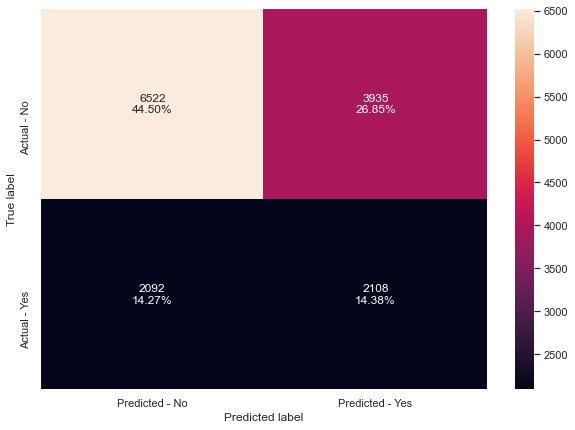

In [115]:
#Evaluate model accuracy using fitted y value and actual y_test

# Calculating different metrics
get_metrics_score(lr_estimator)

# Creating confusion matrix
make_confusion_matrix(lr_estimator, y_test)

**Observations**
- It can be observed here for **Accuracy** Score that the model is a good fit and has dropped for both train and test data to ~59%
- For this model here, the False Negatives fell to 2092 from 4189.
- The **Recall** Score meant for reducing False Negatives has improved greatly from ~ 0.3% to 50.2% which is better suited for the Churn use case.
- The **Precision** Score has dropped from 45% to ~35%. 
- **F1-Score** meant for imbalanced target variable value counts has also climbed to 41.2%.
- The closeness of train and test scores showed there is no overfitting in the model, however the low scores indicate a level of underfitting of the model.

                 Confusion matrix
                 Score positive    Score negative
Actual positive      6522              3935
Actual negative      2092              2108

Accuracy  0.59
 
           Positive      Negative
Num case    10457          4200
Precision    0.76          0.35
Recall       0.62          0.50
F1           0.68          0.41


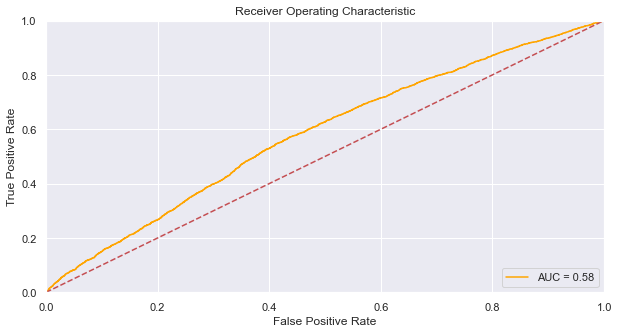

Gini Score: 0.161


In [116]:
scores = score_model(probabilities, 0.5)
print_metrics(y_test, scores)  
plot_auc(y_test, probabilities)

**Observations**
- The **GINI** Score is 0.161, a very slight improvement over 0.152.

### Find a better threshold

There is another way to tip the model scoring toward correctly identifying the bad credit cases. The scoring threshold can be adjusted. Until now, the scores have been computed from the probabilities using a threshold of 0.5. However, there is no reason to think this is the correct choice. Recall that the score is  determined by setting the threshold along the sigmoidal or logistic function. It is possible to favor either positive or negative cases by changing the threshold along this curve. 

The code in the cell below contains a function for scoring and evaluating the model for a given threshold value. The `for` loop iterates over the list of five candidate threshold values. Execute this code and examine how changing the threshold value changes the scoring for the model. 

In [117]:
def test_threshold(probs, labels, threshold):
    scores = score_model(probs, threshold)
    print('')
    print('For threshold = ' + str(threshold))
    print_metrics(labels, scores)

thresholds = [0.60, 0.55, 0.50, 0.45, 0.40, 0.35, 0.3, 0.25]
for t in thresholds:
    test_threshold(probabilities, y_test, t)


For threshold = 0.6
                 Confusion matrix
                 Score positive    Score negative
Actual positive      9776               681
Actual negative      3754               446

Accuracy  0.70
 
           Positive      Negative
Num case    10457          4200
Precision    0.72          0.40
Recall       0.93          0.11
F1           0.82          0.17

For threshold = 0.55
                 Confusion matrix
                 Score positive    Score negative
Actual positive      8518              1939
Actual negative      3150              1050

Accuracy  0.65
 
           Positive      Negative
Num case    10457          4200
Precision    0.73          0.35
Recall       0.81          0.25
F1           0.77          0.29

For threshold = 0.5
                 Confusion matrix
                 Score positive    Score negative
Actual positive      6522              3935
Actual negative      2092              2108

Accuracy  0.59
 
           Positive      Negative
Num case

**Observations**
- The number of True Negatives increased while False Negatives decreased. This is at the expense of the False Positives increasing and the **Accuracy** Score decreasing.
- A good threshold of 0.45 will be good as False Negatives fell by half while True Positive and Negative numbers are still healthy. The amount of False Positives are stilll manageable and False Negatives are just 1/7 of it.

### Final VIF to further reduce Multicolinearity

* There are different ways of detecting (or testing) multi-collinearity, one such way is Variation Inflation Factor.

* **Variance  Inflation  factor**:  Variance  inflation  factors  measure  the  inflation  in  the variances of the regression coefficients estimates due to collinearities that exist among the  predictors.  It  is  a  measure  of  how  much  the  variance  of  the  estimated  regression coefficient βk is “inflated”by  the  existence  of  correlation  among  the  predictor variables in the model. 

* General Rule of thumb: If VIF is 1 then there is no correlation among the kth predictor and the remaining predictor variables, and  hence  the variance of β̂k is not inflated at all. Whereas if VIF exceeds 5, we say there is moderate VIF and if it is 10 or exceeding 10, it shows signs of high multi-collinearity. But the purpose of the analysis should dictate which threshold to use.

In [118]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = data.select_dtypes(np.number)
vif_series1 = pd.Series([variance_inflation_factor(X.values,i) for i in range(X.shape[1])],index=X.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series1))

Series before feature selection: 

CurrentEquipmentDays      7.401040
TotalRecurringCharge     24.769641
CustomerCareCalls         1.398936
UniqueSubs               32.871603
Handsets                  6.193497
PercChangeMinutes         1.006831
AgeHH1                   15.052870
ThreewayCalls             1.183205
MonthsInService          10.964702
MonthlyMinutes            6.015179
Churn                     1.432046
MonthlyRevenue           27.311702
ActiveSubs               39.986452
OverageMinutes            6.488752
perc_active_subs         56.245141
perc_recurrent_charge    31.853380
perc_overage_minutes      2.814016
dtype: float64



**Observations**
- From VIF scores and heatmap assessment: 'perc_active_subs','ActiveSubs','UniqueSubs','perc_recurrent_charge','MonthlyRevenue','TotalRecurringCharge','AgeHH1','MonthsInService' are to be removed.

In [119]:
cols_drop = ['perc_active_subs','ActiveSubs','UniqueSubs','perc_recurrent_charge','MonthlyRevenue',
             'TotalRecurringCharge','AgeHH1','MonthsInService']

X = data.select_dtypes(np.number)
X.drop(cols_drop,axis=1,inplace=True)
vif_series1 = pd.Series([variance_inflation_factor(X.values,i) for i in range(X.shape[1])],index=X.columns)
print('Series before feature selection: \n\n{}\n'.format(vif_series1))

Series before feature selection: 

CurrentEquipmentDays    1.821399
CustomerCareCalls       1.368188
Handsets                2.338037
PercChangeMinutes       1.006118
ThreewayCalls           1.181095
MonthlyMinutes          3.523472
Churn                   1.389582
OverageMinutes          2.701328
perc_overage_minutes    2.122832
dtype: float64



<mark>__Result:__
- The VIF score has been brought below 5 and therefore features are not as correlated.

In [120]:
data_cat = data.select_dtypes(include = 'category')
data_cat.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48854 entries, 0 to 51043
Data columns (total 4 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   ServiceArea              48854 non-null  category
 1   CreditRating             48854 non-null  category
 2   HandsetWebCapable        48854 non-null  category
 3   MadeCallToRetentionTeam  48854 non-null  category
dtypes: category(4)
memory usage: 1.8 MB


In [121]:
data_vif = pd.concat([X, data_cat], axis=1) # combine the columns and data
data_vif.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 48854 entries, 0 to 51043
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   CurrentEquipmentDays     48854 non-null  float64 
 1   CustomerCareCalls        48854 non-null  float64 
 2   Handsets                 48854 non-null  float64 
 3   PercChangeMinutes        48854 non-null  float64 
 4   ThreewayCalls            48854 non-null  float64 
 5   MonthlyMinutes           48854 non-null  float64 
 6   Churn                    48854 non-null  int64   
 7   OverageMinutes           48854 non-null  float64 
 8   perc_overage_minutes     48854 non-null  float64 
 9   ServiceArea              48854 non-null  category
 10  CreditRating             48854 non-null  category
 11  HandsetWebCapable        48854 non-null  category
 12  MadeCallToRetentionTeam  48854 non-null  category
dtypes: category(4), float64(8), int64(1)
memory usage: 5.2 MB


In [122]:
#Train - test split to train and test model accuracy
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Define columns to be included in X and y
Y = data_vif["Churn"]
X = data_vif.drop("Churn" , axis=1)

# creating dummy variables
X = pd.get_dummies(X, drop_first=True)

# splitting in training and test set
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 42, stratify=Y)
# stratify=Y maintains the ratio of churn vs non churn in the target variable for both training and testing sets)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) <--Starter code original

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(34197, 31) (14657, 31) (34197,) (14657,)


In [123]:
%%time
#-------------------------------- Model training -------------------------------#

#type your code to build logistic regression model on training data set


# Creating pipeline
lr_pipe = make_pipeline(StandardScaler(), LogisticRegression(random_state=1,solver='saga'))

# # Grid of parameters to choose from (Regularization)
parameters = {'C': np.arange(0.5,10,0.5)}

# # Run the grid search
grid_obj = GridSearchCV(lr_pipe['logisticregression'], parameters, scoring='recall')
grid_obj = grid_obj.fit(X_train,y_train)

# Set the clf to the best combination of parameters
lr_estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data. 
lr_estimator.fit(X_train,y_train)

Wall time: 2min 49s


LogisticRegression(C=0.5, random_state=1, solver='saga')

In [124]:
probabilities = lr_estimator.predict_proba(X_test)

Accuracy on training set :  0.7126356113109337
Accuracy on test set :  0.7129699119874463
Recall on training set :  0.0017346938775510204
Recall on test set :  0.0016666666666666668
Precision on training set :  0.2786885245901639
Precision on test set :  0.3333333333333333
f1 score on training set :  0.0034479261738160428
f1 score on test set :  0.0033167495854063023


[]

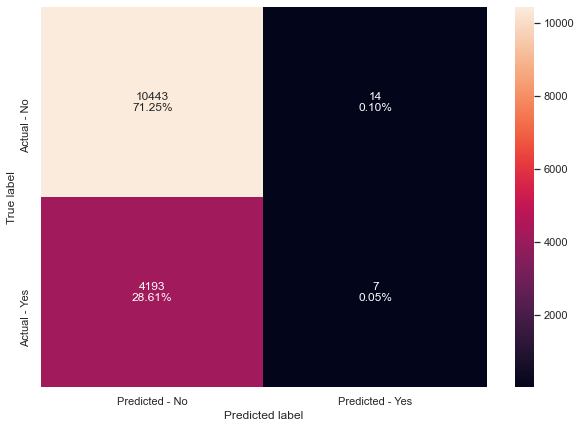

In [125]:
#Evaluate model accuracy using fitted y value and actual y_test

# Calculating different metrics
get_metrics_score(lr_estimator)

# Creating confusion matrix
make_confusion_matrix(lr_estimator, y_test)

                 Confusion matrix
                 Score positive    Score negative
Actual positive     10443                14
Actual negative      4193                 7

Accuracy  0.71
 
           Positive      Negative
Num case    10457          4200
Precision    0.71          0.33
Recall       1.00          0.00
F1           0.83          0.00


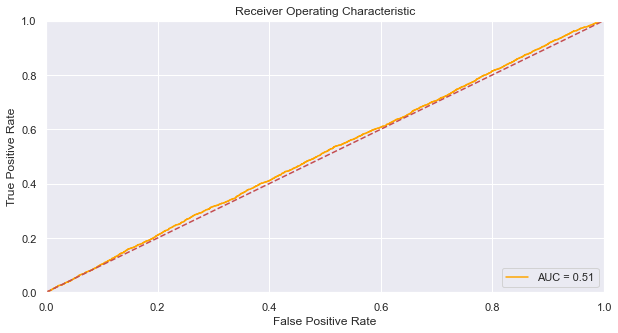

Gini Score: 0.021


In [126]:
scores = score_model(probabilities, 0.5)
print_metrics(y_test, scores)  
plot_auc(y_test, probabilities)

**Observations**
- The **Precision** and **Recall** Scores are worse off than the original model generated from the old data set.
- The **Gini** Score has dropped to 0.021 and with a AUC Score of 0.51, it is too close for comfort to become a naive classifier model.
- The number of False Negatives is marginally higher at 4193 vs 4189.

### Q4.2 Build Random Forest classifier to compare model accuracy over the logistic regression model


In [127]:
#importing libraries
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, plot_confusion_matrix
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import precision_recall_curve, plot_precision_recall_curve, plot_roc_curve

In [128]:
#Train - test split to train and test model accuracy
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#Define columns to be included in X and y
Y = data["Churn"]
X = data.drop("Churn" , axis=1)

# creating dummy variables
X = pd.get_dummies(X, drop_first=True)

# splitting in training and test set
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.3, random_state = 42, stratify=Y)
# stratify=Y maintains the ratio of churn vs non churn in the target variable for both training and testing sets)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0) <--Starter code original

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

#Create dummy variables for all categorical variables <--Starter code original
#X = pd.get_dummies(X) <--Starter code original
X.info()

(34197, 39) (14657, 39) (34197,) (14657,)
<class 'pandas.core.frame.DataFrame'>
Int64Index: 48854 entries, 0 to 51043
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CurrentEquipmentDays         48854 non-null  float64
 1   TotalRecurringCharge         48854 non-null  float64
 2   CustomerCareCalls            48854 non-null  float64
 3   UniqueSubs                   48854 non-null  int64  
 4   Handsets                     48854 non-null  float64
 5   PercChangeMinutes            48854 non-null  float64
 6   AgeHH1                       48854 non-null  float64
 7   ThreewayCalls                48854 non-null  float64
 8   MonthsInService              48854 non-null  int64  
 9   MonthlyMinutes               48854 non-null  float64
 10  MonthlyRevenue               48854 non-null  float64
 11  ActiveSubs                   48854 non-null  int64  
 12  OverageMinutes               488

#### Note
A pipeline is used to encompass scaling the training data input and building the model to fit.

In [129]:
%%time
#-------------------------------- Model training -------------------------------#

#type your code to build random forest classifier model on training data set


# Creating pipeline
rf_pipe = make_pipeline(StandardScaler(), RandomForestClassifier(class_weight={0:0.29,1:0.71},random_state=42,n_jobs=-1))

# Fit the best algorithm to the data. 
rf_pipe.fit(X_train,y_train)


Wall time: 1.94 s


Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(class_weight={0: 0.29, 1: 0.71},
                                        n_jobs=-1, random_state=42))])

Accuracy on training set :  1.0
Accuracy on test set :  0.717336426280958
Recall on training set :  1.0
Recall on test set :  0.08285714285714285
Precision on training set :  1.0
Precision on test set :  0.5446009389671361
f1 score on training set :  1.0
f1 score on test set :  0.14383137011779293


[]

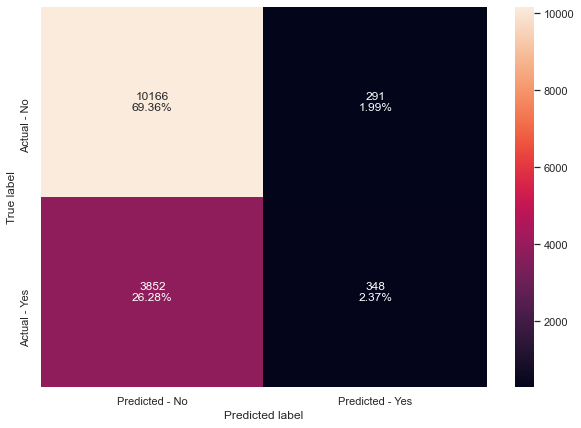

In [130]:
#-------------------------------- Model testing ---------------------------------#

#type your code here to predict for X_test data set using the fitted RF model
#Use a probability threshold to classify customers as churners and non churners (Default = 0.5)
#Evaluate model accuracy using fitted y value and actual y_test
#Evaluatio metrics to be used - GINI, Precision, Recall, confusion matrix

# Calculating different metrics
get_metrics_score(rf_pipe)

# Creating confusion matrix
make_confusion_matrix(rf_pipe, y_test)

**Observations**
- The large difference in the scores between train and test sets indicate overfitting has happened.
- **Recall** Score and **F1-Score** is poor for this model on test data.
- **Accuracy** Score and **Precision** Score are still decent at 71.7% and 54.5% respectively.
- The number of False Negatives are very high at 3852 counts.

                 Confusion matrix
                 Score positive    Score negative
Actual positive     10166               291
Actual negative      3852               348

Accuracy  0.72
 
           Positive      Negative
Num case    10457          4200
Precision    0.73          0.54
Recall       0.97          0.08
F1           0.83          0.14


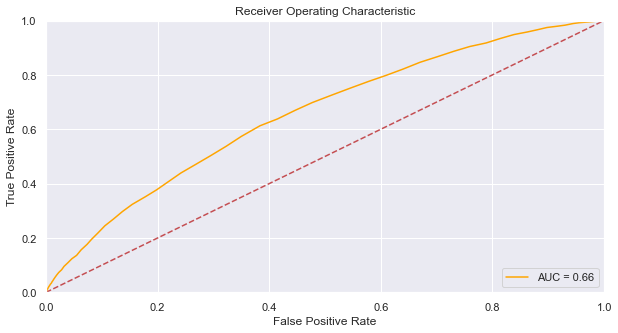

Gini Score: 0.31


In [131]:
#Evaluate model accuracy using fitted y value and actual y_test
#Evaluatio metrics to be used - GINI, Precision, Recall, confusion matrix

probabilities_rf = rf_pipe.predict_proba(X_test)
scores_rf = score_model(probabilities_rf, 0.5)
print_metrics(y_test, scores_rf)  
plot_auc(y_test, probabilities_rf)

**Observations**
- The **Gini** Score at 0.31 is a marked improvement from the logistic regressor's 0.161.

### Hyperparameter Tuning

#### Note
A Randomized Search CV follwed by a Grid Search CV is a methodology to quickly come to a set of ideal hyperparameters.

#### RandomizedSearchCV

In [132]:
%%time

# Creating pipeline
rf_pipe = make_pipeline(StandardScaler(), RandomForestClassifier(class_weight={0:0.29,1:0.71},
                                                                 random_state=42,n_jobs=-1,n_estimators=50))
# rf_pipe.get_params().keys() # get the hyper parameters available

# Parameter grid to pass in RandomizedSearchCV
param_grid = { 
    "randomforestclassifier__n_estimators": [64, 100, 128, 200, 700],
    "randomforestclassifier__max_features": ['auto', 'sqrt', 'log2'],
    "randomforestclassifier__max_depth": [1,10,20],
    "randomforestclassifier__min_samples_leaf": [10,20,40,60]
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

#Calling RandomizedSearchCV
rf_tuned2 = RandomizedSearchCV(estimator=rf_pipe, param_distributions=param_grid, n_iter=50, scoring=scorer, cv=5, 
             random_state=1)

#Fitting parameters in RandomizedSearchCV
rf_tuned2.fit(X_train,y_train)

print("Best parameters are {} with CV score={}:" .format(rf_tuned2.best_params_,rf_tuned2.best_score_))

Best parameters are {'randomforestclassifier__n_estimators': 64, 'randomforestclassifier__min_samples_leaf': 60, 'randomforestclassifier__max_features': 'sqrt', 'randomforestclassifier__max_depth': 1} with CV score=0.6689795918367347:
Wall time: 9min 2s


In [133]:
# Creating new pipeline with best parameters
rf_tuned2 = make_pipeline(
    StandardScaler(),
    RandomForestClassifier(class_weight={0:0.29,1:0.71} , random_state=42 , n_jobs=-1 , n_estimators=64 , 
                           max_features='sqrt' , max_depth=1 , min_samples_leaf=60,),
)

# Fit the model on training data
rf_tuned2.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(class_weight={0: 0.29, 1: 0.71},
                                        max_depth=1, max_features='sqrt',
                                        min_samples_leaf=60, n_estimators=64,
                                        n_jobs=-1, random_state=42))])

#### GridSearchCV

In [134]:
%%time 

# Creating pipeline
rf_pipe = make_pipeline(StandardScaler(), RandomForestClassifier(class_weight={0:0.29,1:0.71},
                                                                 random_state=42,n_jobs=-1,n_estimators=50))
# rf_pipe.get_params().keys() # get the hyper parameters available

# Parameter grid to pass in GridSearchCV
param_grid = { 
    "randomforestclassifier__n_estimators": np.arange(63, 65, 1),
    "randomforestclassifier__max_features": ['auto', 'sqrt', 'log2'],
    "randomforestclassifier__max_depth": np.arange(1, 4, 1),
    "randomforestclassifier__min_samples_leaf": np.arange(59, 61, 1)
}

# Type of scoring used to compare parameter combinations
scorer = metrics.make_scorer(metrics.recall_score)

# Calling GridSearchCV
grid_cv = GridSearchCV(estimator=rf_pipe, param_grid=param_grid, scoring=scorer, cv=5, n_jobs = -1)

# Fitting parameters in GridSeachCV
grid_cv.fit(X_train, y_train)

print(
    "Best Parameters:{} \nScore: {}".format(grid_cv.best_params_, grid_cv.best_score_)
)

Best Parameters:{'randomforestclassifier__max_depth': 3, 'randomforestclassifier__max_features': 'auto', 'randomforestclassifier__min_samples_leaf': 60, 'randomforestclassifier__n_estimators': 64} 
Score: 0.6845918367346939
Wall time: 40.9 s


In [135]:
# Creating new pipeline with best parameters
rf_tuned3 = make_pipeline(
    StandardScaler(),
    RandomForestClassifier(class_weight={0:0.29,1:0.71} , random_state=42 , n_jobs=-1 , n_estimators=64 , 
                           max_features='auto' , max_depth=3 , min_samples_leaf=60,),
)

# Fit the model on training data
rf_tuned3.fit(X_train, y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(class_weight={0: 0.29, 1: 0.71},
                                        max_depth=3, min_samples_leaf=60,
                                        n_estimators=64, n_jobs=-1,
                                        random_state=42))])

Accuracy on training set :  0.5499312805216832
Accuracy on test set :  0.5398103295353756
Recall on training set :  0.6856122448979591
Recall on test set :  0.6826190476190476
Precision on training set :  0.35309264806348206
Precision on test set :  0.34629786206063534
f1 score on training set :  0.46612785736584683
f1 score on test set :  0.45949194647006975


[]

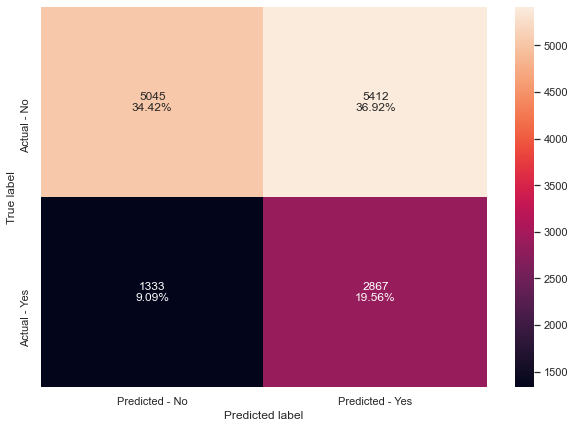

In [136]:
# Calculating different metrics
get_metrics_score(rf_tuned3)

# Creating confusion matrix
make_confusion_matrix(rf_tuned3, y_test)

**Observations**
- The small difference in the scores between train and test sets indicate model fitting is accceptable.
- **Recall** Score at 68.3% is acceptable and **F1-Score** is still a little low for this model on test data.
- **Accuracy** Score is a little low at 54%.
- **Precision** Score has diminished quite a bit to 34.6% as the model focused on maximising Recall scoring.
- The number of False Negatives has dropped from 3852 counts to 1333 counts.

                 Confusion matrix
                 Score positive    Score negative
Actual positive      5045              5412
Actual negative      1333              2867

Accuracy  0.54
 
           Positive      Negative
Num case    10457          4200
Precision    0.79          0.35
Recall       0.48          0.68
F1           0.60          0.46


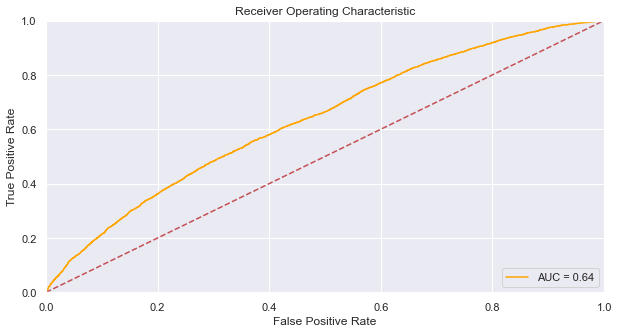

Gini Score: 0.27


In [137]:
probabilities_rf_tuned3 = rf_tuned3.predict_proba(X_test)
scores_rf_tuned3 = score_model(probabilities_rf_tuned3, 0.5)
print_metrics(y_test, scores_rf_tuned3)  
plot_auc(y_test, probabilities_rf_tuned3)

**Observations**
- The Gini Score at 0.27 a little less than the Random Forest Classifier model before hyperparameter tuning and the AUC lowers to 0.64.

<mark>__Result:__
    
- The tuned Random Forest Classifier model is the best model, with almost similar AUC and Gini Scores but much better Recall Score geared towards achieving the least amount of False Negatives which is the failed detection of churning customers.
- The model also generalizes well by not overfitting : i.e. Training scores are not much higher than Test scores.

### Q4.3 Identify most important features impacting churn

<Figure size 864x864 with 0 Axes>

Text(0.5, 1.0, 'Feature Importances')

<BarContainer object of 39 artists>

([<matplotlib.axis.YTick at 0x19eb45c88b0>,
 [Text(0, 0, 'ServiceArea_L'),
  Text(0, 1, 'ServiceArea_D'),
  Text(0, 2, 'ServiceArea_G'),
  Text(0, 3, 'ServiceArea_H'),
  Text(0, 4, 'ServiceArea_I'),
  Text(0, 5, 'ServiceArea_K'),
  Text(0, 6, 'ServiceArea_V'),
  Text(0, 7, 'ServiceArea_B'),
  Text(0, 8, 'CreditRating_6-VeryLow'),
  Text(0, 9, 'ServiceArea_O'),
  Text(0, 10, 'ServiceArea_P'),
  Text(0, 11, 'CreditRating_7-Lowest'),
  Text(0, 12, 'ServiceArea_S'),
  Text(0, 13, 'ServiceArea_C'),
  Text(0, 14, 'ServiceArea_N'),
  Text(0, 15, 'ServiceArea_F'),
  Text(0, 16, 'ServiceArea_M'),
  Text(0, 17, 'CreditRating_3-Good'),
  Text(0, 18, 'CreditRating_4-Medium'),
  Text(0, 19, 'CreditRating_2-High'),
  Text(0, 20, 'ActiveSubs'),
  Text(0, 21, 'ThreewayCalls'),
  Text(0, 22, 'OverageMinutes'),
  Text(0, 23, 'UniqueSubs'),
  Text(0, 24, 'AgeHH1'),
  Text(0, 25, 'perc_active_subs'),
  Text(0, 26, 'CreditRating_5-Low'),
  Text(0, 27, 'Handsets'),
  Text(0, 28, 'MonthlyRevenue'),
  Text(0,

Text(0.5, 0, 'Relative Importance')

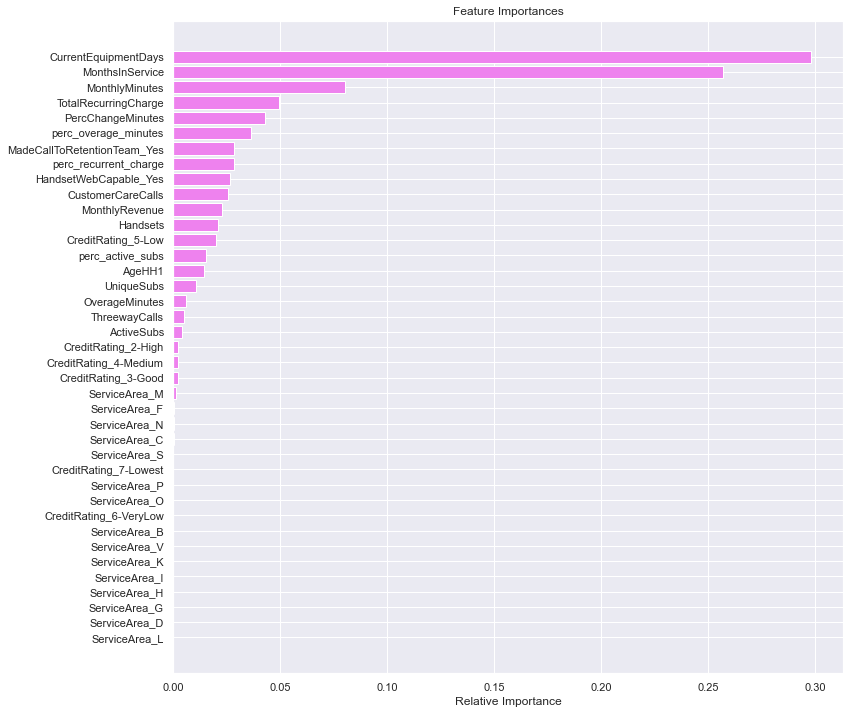

In [138]:
# Type your code here to plot the top 20 important predictor features impacting churn using the Random Forest model created

feature_names = X_train.columns
importances = rf_tuned3[1].feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="violet", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

In [139]:
# Type your code here to plot the top 20 important predictor features impacting churn using the Random Forest model created

Feature_impt = pd.Series(rf_tuned3['randomforestclassifier'].feature_importances_, index=X_train.columns)
Feature_impt_sort = Feature_impt.sort_values(ascending=False).head(20)
Feature_impt_sort

CurrentEquipmentDays           0.298308
MonthsInService                0.257194
MonthlyMinutes                 0.080089
TotalRecurringCharge           0.049185
PercChangeMinutes              0.042994
perc_overage_minutes           0.036472
MadeCallToRetentionTeam_Yes    0.028516
perc_recurrent_charge          0.028287
HandsetWebCapable_Yes          0.026492
CustomerCareCalls              0.025577
MonthlyRevenue                 0.022862
Handsets                       0.020857
CreditRating_5-Low             0.019972
perc_active_subs               0.015016
AgeHH1                         0.014067
UniqueSubs                     0.010713
OverageMinutes                 0.005715
ThreewayCalls                  0.004903
ActiveSubs                     0.004109
CreditRating_2-High            0.002362
dtype: float64

**Insights**
- From the feature importance, it suggests that the amount of days since the customer handset was activated and the customer total months in service figure heavily on determining the churn of a customer. 
- With the EDA insights, it is recommended that the telco pay attention in marketing newer products and packages to customers after a year has lasped, especially for customers who are still with older non internet capable handsets. A draw could be to market newer handsets to them as part of firstly a loyalty plan and a limited offer plan.

## Q5. Use the hold out data provided to predict churners using the best model identified in step 4 

In [140]:
#Type your code here to predict churners based on the hold out data set provided
#Note #1: use "create_features(cust_df)" functions to create the additional list of features in the hold out data set
#Note #2: Also, perform feature scaling and dummy variables creation as performed during the initial stages of step #4

#Use "predict" function on the transformend data using the best fitted model object
hold = pd.read_excel("Mini_project_3_Hold_Out_Data.xls")
hold.head()
# hold.columns

CustomerID  Churn  MonthlyRevenue  MonthlyMinutes  TotalRecurringCharge  \
0     3000006    NaN           57.49           483.0                  37.0   
1     3000018    NaN           55.23           570.0                  72.0   
2     3000034    NaN           97.34          1039.0                  50.0   
3     3000070    NaN           35.59           153.0                  30.0   
4     3000074    NaN           55.27          1213.0                  50.0   

   DirectorAssistedCalls  OverageMinutes  RoamingCalls  PercChangeMinutes  \
0                   0.25            23.0           0.0              532.0   
1                   0.00             0.0           0.0               38.0   
2                   4.95           420.0           0.0              198.0   
3                   0.00            16.0           0.0               30.0   
4                   0.74             0.0           1.3              169.0   

   PercChangeRevenues  ...  ReferralsMadeBySubscriber  IncomeGroup  \
0                51.0  ...                          0            5   
1                 0.0  ...                          0            6   
2                23.3  ...                          0            4   
3                 7.3  ...                          0            4   
4                 1.0  ...                          0            3   

   OwnsMotorcycle  AdjustmentsToCreditRating  HandsetPrice  \
0              No                          1           150   
1              No                          2            80   
2              No                          3            10   
3              No                          1           200   
4              No                          0            10   

   MadeCallToRetentionTeam  CreditRating  PrizmCode    Occupation  \
0                       No         5-Low      Other         Other   
1                       No     1-Highest      Other  Professional   
2                       No        3-Good   Suburban        Crafts   
3                       No     1-Highest      Other         Other   
4                       No     1-Highest   Suburban         Other   

   MaritalStatus  
0             No  
1             No  
2            Yes  
3             No  
4             No  

[5 rows x 58 columns]

In [141]:
hold.tail()
hold.info()

CustomerID  Churn  MonthlyRevenue  MonthlyMinutes  \
19995     3399938    NaN           85.15           815.0   
19996     3399950    NaN             NaN             NaN   
19997     3399966    NaN             NaN             NaN   
19998     3399970    NaN             NaN             NaN   
19999     3399986    NaN             NaN             NaN   

       TotalRecurringCharge  DirectorAssistedCalls  OverageMinutes  \
19995                  88.0                    0.0             1.0   
19996                   NaN                    NaN             NaN   
19997                   NaN                    NaN             NaN   
19998                   NaN                    NaN             NaN   
19999                   NaN                    NaN             NaN   

       RoamingCalls  PercChangeMinutes  PercChangeRevenues  ...  \
19995           0.4                0.0                 0.0  ...   
19996           NaN                NaN                 NaN  ...   
19997           NaN                NaN                 NaN  ...   
19998           NaN                NaN                 NaN  ...   
19999           NaN                NaN                 NaN  ...   

       ReferralsMadeBySubscriber  IncomeGroup  OwnsMotorcycle  \
19995                          0            0              No   
19996                          0            6              No   
19997                          0            8              No   
19998                          0            3              No   
19999                          0            7              No   

       AdjustmentsToCreditRating  HandsetPrice  MadeCallToRetentionTeam  \
19995                          0            40                       No   
19996                          0       Unknown                       No   
19997                          1       Unknown                       No   
19998                          0           150                       No   
19999                          3       Unknown                       No   

       CreditRating  PrizmCode    Occupation  MaritalStatus  
19995     1-Highest      Other         Other        Unknown  
19996     1-Highest   Suburban         Other            Yes  
19997     1-Highest   Suburban         Other             No  
19998        3-Good      Other         Other        Unknown  
19999      4-Medium   Suburban  Professional            Yes  

[5 rows x 58 columns]

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 58 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   CustomerID                 20000 non-null  int64  
 1   Churn                      0 non-null      float64
 2   MonthlyRevenue             19940 non-null  float64
 3   MonthlyMinutes             19940 non-null  float64
 4   TotalRecurringCharge       19940 non-null  float64
 5   DirectorAssistedCalls      19940 non-null  float64
 6   OverageMinutes             19940 non-null  float64
 7   RoamingCalls               19940 non-null  float64
 8   PercChangeMinutes          19865 non-null  float64
 9   PercChangeRevenues         19865 non-null  float64
 10  DroppedCalls               20000 non-null  float64
 11  BlockedCalls               20000 non-null  float64
 12  UnansweredCalls            20000 non-null  float64
 13  CustomerCareCalls          20000 non-null  flo

In [142]:
# Data Holdout Set Cleaning and Prep

hold.drop(["CustomerID"],axis=1,inplace=True) # Remove CustomerID column and use python #no.
    
# Unknown values changed to NaN
Unknown_cols = hold.columns
Unknown_cols = Unknown_cols.drop('Homeownership')
# Cycle through the columns listed
for column in Unknown_cols:
    hold[column] = hold[column].replace("Unknown",np.nan)

    
hold=hold.drop(index=hold[hold['MonthlyRevenue']==0].index.values) #updated data frame with non zeros in monthly revenue
hold.drop(["MaritalStatus"],axis=1,inplace=True) # Remove MaritalStatus column. ; inplace means no make copy
hold['HandsetPrice'] = hold['HandsetPrice'].astype(float)
hold['HandsetPrice'] = hold['HandsetPrice'].fillna(hold['HandsetPrice'].median()) # Fill NaN values with median values

# Keep only the rows that are > 0
columns = ['MonthlyRevenue','TotalRecurringCharge','CurrentEquipmentDays']
for col in columns:
    hold = hold[hold[col] > 0] 

# Retain the selected features
col_ = ['Churn','CurrentEquipmentDays','TotalRecurringCharge','CustomerCareCalls','UniqueSubs','Handsets','PercChangeMinutes',
          'AgeHH1','ThreewayCalls','MonthsInService','MonthlyMinutes','ServiceArea','CreditRating','HandsetWebCapable',
          'MadeCallToRetentionTeam','MonthlyRevenue','ActiveSubs','OverageMinutes']
hold = hold[col_] 

# drop all NaN rows in dataframe as long as there are any except Churn.
hold.dropna(subset=['CurrentEquipmentDays','TotalRecurringCharge','CustomerCareCalls','UniqueSubs','Handsets',
                    'PercChangeMinutes','AgeHH1','ThreewayCalls','MonthsInService','MonthlyMinutes','ServiceArea',
                    'CreditRating','HandsetWebCapable','MadeCallToRetentionTeam','MonthlyRevenue','ActiveSubs',
                    'OverageMinutes'], inplace= True)

    
hold['AgeHH1']=hold['AgeHH1'].replace(0,hold['AgeHH1'].median()) # Fill in median values to zero values
hold['ServiceArea']=hold['ServiceArea'].astype(str) # Convert feature to string for manipulation
hold['ServiceArea']=hold['ServiceArea'].str[0:1] # Convert all values to reflect the first charatcer
hold['ServiceArea']=hold['ServiceArea'].astype('category') # Change 'ServiceArea' data type to category
hold["MonthlyMinutes"].replace(0, 1, inplace=True)  # Replace 0s with a small number so as not to get 
                                                    # invalid numbers from calc below

    
#Make a call to the feature engineering wrapper function for churn prediction
hold=create_features(hold)
hold['CurrentEquipmentDays']=hold['CurrentEquipmentDays'].astype('float')
hold['CreditRating']=hold['CreditRating'].astype('category')
hold['HandsetWebCapable']=hold['HandsetWebCapable'].astype('category')
hold['MadeCallToRetentionTeam']=hold['MadeCallToRetentionTeam'].astype('category')
# hold['Churn']=hold['Churn'].astype('category')
hold.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 19449 entries, 0 to 19995
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype   
---  ------                   --------------  -----   
 0   Churn                    0 non-null      float64 
 1   CurrentEquipmentDays     19449 non-null  float64 
 2   TotalRecurringCharge     19449 non-null  float64 
 3   CustomerCareCalls        19449 non-null  float64 
 4   UniqueSubs               19449 non-null  int64   
 5   Handsets                 19449 non-null  int64   
 6   PercChangeMinutes        19449 non-null  float64 
 7   AgeHH1                   19449 non-null  float64 
 8   ThreewayCalls            19449 non-null  float64 
 9   MonthsInService          19449 non-null  int64   
 10  MonthlyMinutes           19449 non-null  float64 
 11  ServiceArea              19449 non-null  category
 12  CreditRating             19449 non-null  category
 13  HandsetWebCapable        19449 non-null  category
 14  MadeCa

In [143]:
# From sklearn import *
target = ['Churn']

numerical = hold.select_dtypes(np.number).columns
categorical = ['ServiceArea','CreditRating','HandsetWebCapable','MadeCallToRetentionTeam']

# Perform one-hot encoding to categorical variables 
telco_hold = pd.get_dummies(data=hold, columns=categorical, drop_first=True)

# Initialize StandardScaler instance
scaler = StandardScaler()

# Fit the scaler to numerical columns
scaled_numerical_hold = scaler.fit_transform(telco_hold[numerical])

# Build a DataFrame
scaled_numerical_hold = pd.DataFrame(scaled_numerical_hold, columns=numerical)

#Drop non-scaled numerical columns 
telco_hold = telco_hold.drop(columns=numerical, axis=1)

scaled_numerical_hold.reset_index(drop=True, inplace=True)
telco_hold.reset_index(drop=True, inplace=True)

# Merge the non-numerical with the scaled numerical data
hold_df = pd.concat([scaled_numerical_hold,telco_hold], axis =1)
hold_df


Churn  CurrentEquipmentDays  TotalRecurringCharge  CustomerCareCalls  \
0        NaN             -0.551680             -0.418776          -0.029696   
1        NaN              0.218208              1.042650           1.278619   
2        NaN              1.273828              0.124039           1.764564   
3        NaN             -1.313631             -0.711062          -0.347430   
4        NaN              0.115027              0.124039           0.456249   
...      ...                   ...                   ...                ...   
19444    NaN             -0.793758             -0.711062          -0.347430   
19445    NaN              2.011968             -1.253877          -0.347430   
19446    NaN             -0.496121             -0.711062          -0.347430   
19447    NaN              0.003909              1.585466          -0.347430   
19448    NaN             -0.591365              1.710731          -0.347430   

       UniqueSubs  Handsets  PercChangeMinutes    AgeHH1  ThreewayCalls  \
0       -0.613163  3.858230           2.172774 -1.026349       0.003445   
1       -0.613163  3.114463           0.189484  1.325357      -0.256891   
2       -0.613163  0.883160           0.831845 -0.302747       0.003445   
3        1.748773  3.114463           0.157366  0.420855      -0.256891   
4       -0.613163  1.626927           0.715417  1.506258      -0.256891   
...           ...       ...                ...       ...            ...   
19444    0.567805  0.883160           0.036923 -0.302747      -0.256891   
19445   -0.613163 -0.604376           0.036923 -0.121847      -0.256891   
19446   -0.613163  0.883160           0.036923 -0.302747      -0.256891   
19447   -0.613163  1.626927           0.036923  0.963556      -0.256891   
19448    1.748773  0.883160           0.036923  2.048959       0.871231   

       MonthsInService  ...  ServiceArea_S  ServiceArea_V  \
0             3.887663  ...              0              0   
1             3.991769  ...              0              0   
2             3.783557  ...              0              0   
3             4.199981  ...              1              0   
4             3.471239  ...              0              0   
...                ...  ...            ...            ...   
19444         1.285013  ...              0              0   
19445         1.180907  ...              0              0   
19446         1.493225  ...              0              0   
19447         1.285013  ...              0              0   
19448         0.868589  ...              0              0   

       CreditRating_2-High  CreditRating_3-Good  CreditRating_4-Medium  \
0                        0                    0                      0   
1                        0                    0                      0   
2                        0                    1                      0   
3                        0                    0                      0   
4                        0                    0                      0   
...                    ...                  ...                    ...   
19444                    0                    1                      0   
19445                    0                    0                      0   
19446                    0                    0                      1   
19447                    0                    1                      0   
19448                    0                    0                      0   

       CreditRating_5-Low  CreditRating_6-VeryLow  CreditRating_7-Lowest  \
0                       1                       0                      0   
1                       0                       0                      0   
2                       0                       0                      0   
3                       0                       0                      0   
4                       0                       0                      0   
...                   ...                     ...                    ...   
194

In [144]:
hold_df.info()
for column in hold_df.columns:
    if hold_df[column].isnull().any(): # if column has NaN values

        print(f"{column}\n",hold_df[column].isnull().sum(),"/",len(hold_df)) # print column name and column number of NaN values / total number of values in column
        print(round((hold_df[column].isnull().sum() * 100 / len(hold_df)),4), "%") # print % of NaN values over total number of values
        print('-'*30) # print seperator line

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19449 entries, 0 to 19448
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Churn                        0 non-null      float64
 1   CurrentEquipmentDays         19449 non-null  float64
 2   TotalRecurringCharge         19449 non-null  float64
 3   CustomerCareCalls            19449 non-null  float64
 4   UniqueSubs                   19449 non-null  float64
 5   Handsets                     19449 non-null  float64
 6   PercChangeMinutes            19449 non-null  float64
 7   AgeHH1                       19449 non-null  float64
 8   ThreewayCalls                19449 non-null  float64
 9   MonthsInService              19449 non-null  float64
 10  MonthlyMinutes               19449 non-null  float64
 11  MonthlyRevenue               19449 non-null  float64
 12  ActiveSubs                   19449 non-null  float64
 13  OverageMinutes  

In [145]:
%%time
for i in range(0,len(hold_df)-1):
    hold_df['Churn'][i] = rf_tuned3.predict([hold_df.iloc[i].tolist()[1:]])[0]

Wall time: 3min 37s


Churn value:


0    34854
1    14000
Name: Churn, dtype: int64

-------------------------------------------------------------------------------


Text(0, 0.5, '% Customers')

Text(0.5, 0, 'Churn')

Text(0.5, 1.0, 'Churn Rate')

Text(-0.1, 88.16926320119286, '92.2%')

Text(0.9, 3.8255951462800146, '7.8%')

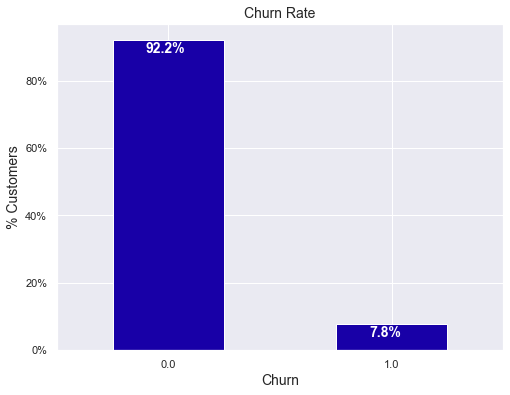

In [146]:
#Churn value
import matplotlib.ticker as mtick

print('Churn value:')
data['Churn'].value_counts()
print('-------------------------------------------------------------------------------')

ax = (hold_df['Churn'].value_counts()*100.0 /len(hold_df)).plot(kind='bar',stacked = True,rot = 0, figsize = (8,6))

ax.yaxis.set_major_formatter(mtick.PercentFormatter())
ax.set_ylabel('% Customers',size = 14)
ax.set_xlabel('Churn',size = 14)
ax.set_title('Churn Rate', size = 14)

# create a list to collect the plt.patches data
totals = []

# find the values and append to list
for i in ax.patches:
    totals.append(i.get_width())

# set individual bar lables using above list
total = sum(totals)

for i in ax.patches:
    # get_width pulls left or right; get_y pushes up or down
    ax.text(i.get_x()+.15, i.get_height()-4.0, \
            str(round((i.get_height()/total), 1))+'%',
            fontsize=12,
            color='white',
           weight = 'bold',
           size = 14)

<mark>__Result:__
- The tuned Random Forest Classifier model predicted using hold out data that 7.8% of customers will likely churn. 

## Q6. [Bonus Question] Calculate lift chart and total monthly revenue saved by targeting top 10-20% of the customers using your best predictive model

When building a predictive model, it is essential that the success metrics we choose are aligned with the business goal agreed with the client. For a business goal focused on marketing, customer retention, cross-sell/up-sell, some handy measures are Lift and Gains.
Naturally metrics such as AUC and Brier Scores are arguably a better way to measure performance, but the value of Lift and Gains goes beyond simply measuring performance in statistical terms, they offer a performance measure in business terms.

**Propensity Scores**
A typical predictive model assigns a propensity score to the target outcome (in this case: churn) to each customer, based on the information we have about them. The propensity will be a number between 0 and 1. **This is an important feature of predictive models:** they tell you the propensity of an outcome (a number between 0 and 1). They do not tell you definitively what an outcome will be (either 0 or 1).

These customers can then be ranked by propensity to churn and divided into deciles. So, the 1st decile is the top 10% of customers with the highest propensity to churn.

**Lift**
We know which customers actually churned and which didn’t, so for each decile, we know the number of customers that actually churned. Lift is defined as the ratio of the success rate you get by the model strategy to the random strategy.

**Gains**
The term **Gains** means how much we have gained. In the example below, if we target the top 3 deciles (decile 9, 8, 7, because decile starts from 0), we would have gained/correctly identified 42.98% of the total churners. Gain is defined as the ratio of the cumulative number of churners up to that decile, divided by the total number of churners.

****
**Source(s):** 
- https://www.k2analytics.co.in/7-important-model-performance-measures/
- https://www.youtube.com/watch?v=eqxqnJkjqp8
- https://www.linkedin.com/pulse/model-evaluation-metrics-jassel-majevadia/
****

In [147]:
#Type your code here to plot the lift chart from the best model
#Identify the lift i.e. 3x of capturing churn with and without using the model 
#(Assume: only top 20% high risk customers are to be targetted)

In [148]:
#define the dataframe to build the Rank Order Table;
#we will need the actual labels (0 = Non-Churn, 1 = Churn) in y_test, and
#the probability from the classification model for 1 = Churn (therefore slicing [:,1])
d = {"target": y_test, "predicted_probability": rf_tuned3.predict_proba(X_test)[:,1]}
rot_df = pd.DataFrame(data = d)
rot_df.head(10)
len(rot_df)

target  predicted_probability
32660       1               0.551013
20779       0               0.538988
19427       0               0.489976
44735       0               0.370596
36612       1               0.361165
41645       1               0.523078
33669       0               0.370269
8189        0               0.454873
10208       0               0.546686
19653       0               0.551464

14657

In [149]:
#grouping the dataframe into 10 deciles (i.e. 10% buckets) according to predicted probabilities
rot_df['decile'] = pd.qcut(rot_df['predicted_probability'], 10, labels = False)

#define a function to generate the Rank Order Table
def rank_order(x, y, target):
    rank = x.groupby('decile').apply(lambda x: pd.Series([
        np.size(x[y]),
        np.sum(x[target]),
        np.size(x[target][x[target]==0]),
    ],
    index = (['customer_count','churner_count','non_churner_count'])
    )).reset_index()
    rank = rank.sort_values(by = 'decile', ascending = False)
    rank['churn_rate'] = round(rank['churner_count']/rank['customer_count'] * 100, 2)
    rank['cumulative_customers'] = np.cumsum(rank['customer_count'])
    rank['cumulative_churners'] = np.cumsum(rank['churner_count'])
    rank['cumulative_non_churners'] = np.cumsum(rank['non_churner_count'])
    rank['cumulative_customers_pct'] = round(rank['cumulative_customers']/np.sum(rank['customer_count']) * 100, 2)
    rank['cumulative_churners_pct'] = round(rank['cumulative_churners']/np.sum(rank['churner_count']) * 100, 2)
    rank['cumulative_non_churners_pct'] = round(rank['cumulative_non_churners']/np.sum(rank['non_churner_count']) * 100, 2)
    rank['KS'] = round(rank['cumulative_churners_pct'] - rank['cumulative_non_churners_pct'], 2)
    rank['lift'] = round(rank['cumulative_churners_pct'] / rank['cumulative_customers_pct'], 2)
    rank
    return(rank)
                                                
gains_table = rank_order(rot_df,'predicted_probability','target')
gains_table

decile  customer_count  churner_count  non_churner_count  churn_rate  \
9       9            1466            703                763       47.95   
8       8            1466            581                885       39.63   
7       7            1465            501                964       34.20   
6       6            1466            438               1028       29.88   
5       5            1465            403               1062       27.51   
4       4            1466            404               1062       27.56   
3       3            1466            415               1051       28.31   
2       2            1465            318               1147       21.71   
1       1            1466            264               1202       18.01   
0       0            1466            173               1293       11.80   

   cumulative_customers  cumulative_churners  cumulative_non_churners  \
9                  1466                  703                      763   
8                  2932                 1284                     1648   
7                  4397                 1785                     2612   
6                  5863                 2223                     3640   
5                  7328                 2626                     4702   
4                  8794                 3030                     5764   
3                 10260                 3445                     6815   
2                 11725                 3763                     7962   
1                 13191                 4027                     9164   
0                 14657                 4200                    10457   

   cumulative_customers_pct  cumulative_churners_pct  \
9                      10.0                    16.74   
8                      20.0                    30.57   
7                      30.0                    42.50   
6                      40.0                    52.93   
5                      50.0                    62.52   
4                      60.0                    72.14   
3                      70.0                    82.02   
2                      80.0                    89.60   
1                      90.0                    95.88   
0                     100.0                   100.00   

   cumulative_non_churners_pct     KS  lift  
9                         7.30   9.44  1.67  
8                        15.76  14.81  1.53  
7                        24.98  17.52  1.42  
6                        34.81  18.12  1.32  
5                        44.97  17.55  1.25  
4                        55.12  17.02  1.20  
3                        65.17  16.85  1.17  
2                        76.14  13.46  1.12  
1                        87.64   8.24  1.07  
0                       100.00   0.00  1.00

<AxesSubplot:title={'center':'Lift Curve'}, xlabel='Percentage of sample', ylabel='Lift'>

<AxesSubplot:title={'center':'Cumulative Gains Curve'}, xlabel='Percentage of sample', ylabel='Gain'>

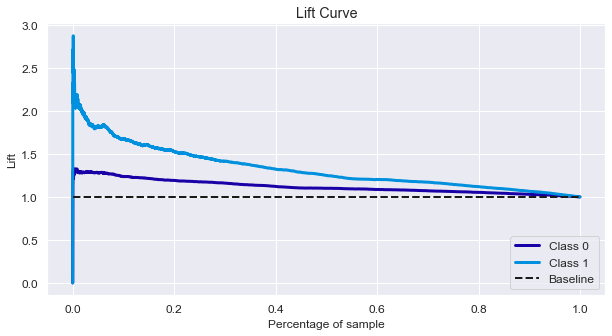

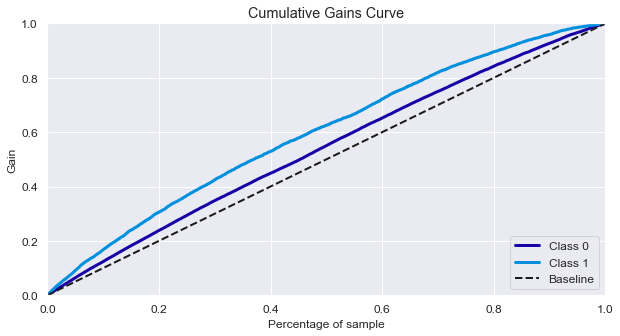

In [150]:
!pip install scikit-plot
import scikitplot as skplt
predicted_probabilities = rf_tuned3.predict_proba(X_test)
skplt.metrics.plot_lift_curve(y_test, predicted_probabilities)
skplt.metrics.plot_cumulative_gain(y_test, predicted_probabilities)

<mark>__Result:__
    
1. What is the % actual churn captured by targeting top 20% (top 2 deciles) of the customers sorted by their churn probability?
2. What is the total monthly revenue of actual churn customers identified in the top 20% of the customers?

#### Insights
- Based on the Gains Table, % of actual churn by targeting top 20% (top 2 deciles of 8 and 9 rows), cumulative_churners_pct which points to % of actual churn captured is 30.57%. 
- The corresponding lift which is number of actual churners divided by pro-rated number of churners in the top 20%, yields 1.543x. 
- Based on the top 20% of customers, a monthly revenue of 1.543x from that of a random selection is expected.

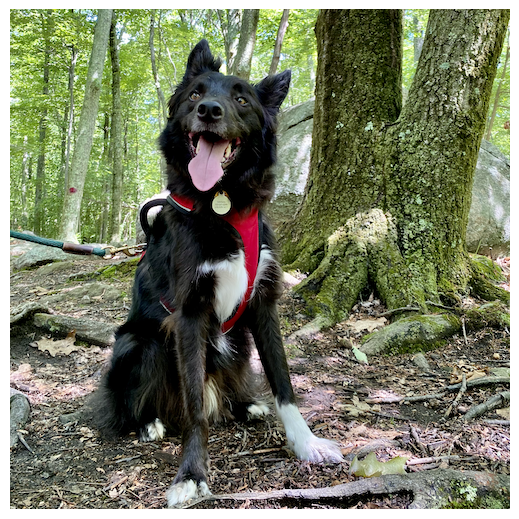

In [151]:
sns.dogplot()